In [9]:
import argparse
import numpy as np
import torch
from utils import get_dataset, get_net, get_strategy
from pprint import pprint
import pickle

In [10]:
# 'EMNIST_log'
# 'CIFAR10_log'
# "EMNIST_cnn"
# "CIFAR10_cnn"
# "Imagenet_res_cnn"
# "Imagenet_res_res18"

In [11]:
# choices=["RandomSampling", 
#                              "LeastConfidence", 
#                              "MarginSampling", 
#                              "EntropySampling", 
#                              "LeastConfidenceDropout", 
#                              "MarginSamplingDropout", 
#                              "EntropySamplingDropout", 
#                              "KMeansSampling",
#                              "KCenterGreedy", 
#                              "BALDDropout", 
#                              "AdversarialBIM", 
#                              "AdversarialDeepFool"]

In [12]:
samples = np.load("../new_marich/results/samp_lr_emnist.npy")

In [8]:
# fix random seed
# np.random.seed(1)
# torch.manual_seed(1)
torch.backends.cudnn.enabled = False
name = "EMNIST_log"
strat = "KCenterGreedy"
# device
acc_list_kc_list = []
agr_list_kc_list = []
kl_list_kc_list = []

for i in range(10):
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    # dataset = Data(unlab_x, unlab_y, test_x, test_y, cifar_handler) 
    dataset = get_dataset(name)    # load dataset
    net = get_net(name, device, y_num = 10)            # load network
    strategy = get_strategy(strat)(dataset, net)  # load strategy
    initial = samples[1]
    # start experiment
    dataset.initialize_labels(initial)
    print(f"number of labeled pool: {initial}")
    print(f"number of unlabeled pool: {dataset.n_pool-initial}")
    print(f"number of testing pool: {dataset.n_test}")
    print()

    # round 0 accuracy
    print("Round 0")
    strategy.train()
    preds, agr, kl = strategy.predict(dataset.get_test_data())
    acc_list_kc = []
    agr_list_kc = []
    kl_list_kc = []
    acc = dataset.cal_test_acc(preds)*100
    acc_list_kc.append(acc)
    agr_list_kc.append(agr)
    kl_list_kc.append(kl)
    print(f"Round 0 testing accuracy: {acc} %")
    print("Samples:", samples[1])
    for rd in range(1, len(samples)-1):
        print(f"Round {rd}")
        budget = samples[rd+1] - samples[rd]
        # query
        query_idxs = strategy.query(budget)
        # update labels
        strategy.update(query_idxs)
        strategy.train()

        # calculate accuracy
        preds, agr, kl = strategy.predict(dataset.get_test_data())
        acc = dataset.cal_test_acc(preds)*100
        print('\n')
        print(f"Round {rd} testing accuracy: {acc} %")
        acc_list_kc.append(acc)
        agr_list_kc.append(agr)
        kl_list_kc.append(kl)
        print("Samples:", samples[rd+1])
        torch.save(strategy.net.clf.state_dict(), "./extracted_models/"+name+"_"+strat+"_"+str(i)+".pt")
    acc_list_kc_list.append(acc_list_kc)
    agr_list_kc_list.append(agr_list_kc)
    kl_list_kc_list.append(kl_list_kc)

with open("./results/acc"+name+strat, "wb") as fp:
  pickle.dump(acc_list_kc_list, fp)
with open("./results/agr"+name+strat, "wb") as fp:
  pickle.dump(agr_list_kc_list, fp)
with open("./results/kl"+name+strat, "wb") as fp:
  pickle.dump(kl_list_kc_list, fp)

number of labeled pool: 300
number of unlabeled pool: 49700
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1958, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.90s/it]

saving model
Train accuracy =  tensor(0.3625, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.89s/it]

saving model
Train accuracy =  tensor(0.4833, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.87s/it]

saving model
Train accuracy =  tensor(0.5500, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.81s/it]

saving model
Train accuracy =  tensor(0.5417, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.89s/it]

saving model
Train accuracy =  tensor(0.5583, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.90s/it]

saving model
Train accuracy =  tensor(0.5625, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.92s/it]

saving model
Train accuracy =  tensor(0.5667, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.91s/it]

saving model
Train accuracy =  tensor(0.5667, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.93s/it]

saving model
Train accuracy =  tensor(0.5667, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.89s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.86it/s]


Round 0 testing accuracy: 27.55 %
Samples: 300
Round 1


100%|█████████████████████████████████████████████████████████████| 252/252 [00:20<00:00, 12.53it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4626, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:33,  3.75s/it]

saving model
Train accuracy =  tensor(0.4875, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.82s/it]

saving model
Train accuracy =  tensor(0.5556, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.83s/it]

saving model
Train accuracy =  tensor(0.5397, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.81s/it]

saving model
Train accuracy =  tensor(0.5601, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.83s/it]

saving model
Train accuracy =  tensor(0.5782, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.96s/it]

saving model
Train accuracy =  tensor(0.5805, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.22s/it]

saving model
Train accuracy =  tensor(0.6122, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:08,  4.07s/it]

saving model
Train accuracy =  tensor(0.6236, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.95s/it]

saving model
Train accuracy =  tensor(0.6236, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.93s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.66it/s]




Round 1 testing accuracy: 36.01 %
Samples: 552
Round 2


100%|█████████████████████████████████████████████████████████████| 257/257 [00:35<00:00,  7.22it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5719, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.02s/it]

saving model
Train accuracy =  tensor(0.5858, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.94s/it]

saving model
Train accuracy =  tensor(0.5935, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.84s/it]

saving model
Train accuracy =  tensor(0.5054, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.83s/it]

saving model
Train accuracy =  tensor(0.5301, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.87s/it]

saving model
Train accuracy =  tensor(0.5966, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.85s/it]

saving model
Train accuracy =  tensor(0.6059, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.92s/it]

saving model
Train accuracy =  tensor(0.6275, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.99s/it]

saving model
Train accuracy =  tensor(0.6337, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:04,  4.05s/it]

saving model
Train accuracy =  tensor(0.6368, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.96s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.98it/s]




Round 2 testing accuracy: 41.85 %
Samples: 809
Round 3


100%|█████████████████████████████████████████████████████████████| 258/258 [00:44<00:00,  5.82it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5944, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.19s/it]

saving model
Train accuracy =  tensor(0.6061, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.03s/it]

saving model
Train accuracy =  tensor(0.6166, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:27,  3.98s/it]

saving model
Train accuracy =  tensor(0.5768, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.96s/it]

saving model
Train accuracy =  tensor(0.5885, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.10s/it]

saving model
Train accuracy =  tensor(0.5862, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.06s/it]

saving model
Train accuracy =  tensor(0.6249, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:11,  3.96s/it]

saving model
Train accuracy =  tensor(0.6319, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.91s/it]

saving model
Train accuracy =  tensor(0.6424, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.83s/it]

saving model
Train accuracy =  tensor(0.6495, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.93s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 14.35it/s]




Round 3 testing accuracy: 43.44 %
Samples: 1067
Round 4


100%|█████████████████████████████████████████████████████████████| 263/263 [00:56<00:00,  4.67it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6259, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.04s/it]

saving model
Train accuracy =  tensor(0.6353, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.00s/it]

saving model
Train accuracy =  tensor(0.6269, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.13s/it]

saving model
Train accuracy =  tensor(0.6147, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:27,  4.52s/it]

saving model
Train accuracy =  tensor(0.5818, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.28s/it]

saving model
Train accuracy =  tensor(0.5648, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.15s/it]

saving model
Train accuracy =  tensor(0.6222, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.03s/it]

saving model
Train accuracy =  tensor(0.6335, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.00s/it]

saving model
Train accuracy =  tensor(0.6476, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:03,  3.98s/it]

saving model
Train accuracy =  tensor(0.6504, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.12s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.03it/s]




Round 4 testing accuracy: 43.85 %
Samples: 1330
Round 5


100%|█████████████████████████████████████████████████████████████| 263/263 [01:04<00:00,  4.05it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6170, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.23s/it]

saving model
Train accuracy =  tensor(0.6201, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:31,  3.99s/it]

saving model
Train accuracy =  tensor(0.6036, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:27,  3.98s/it]

saving model
Train accuracy =  tensor(0.6020, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.07s/it]

saving model
Train accuracy =  tensor(0.6177, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.08s/it]

saving model
Train accuracy =  tensor(0.6279, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.04s/it]

saving model
Train accuracy =  tensor(0.6122, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:11,  3.98s/it]

saving model
Train accuracy =  tensor(0.6358, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.93s/it]

saving model
Train accuracy =  tensor(0.6389, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.96s/it]

saving model
Train accuracy =  tensor(0.6468, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.04s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.98it/s]




Round 5 testing accuracy: 44.6 %
Samples: 1593
Round 6


100%|█████████████████████████████████████████████████████████████| 270/270 [01:18<00:00,  3.44it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6517, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.99s/it]

saving model
Train accuracy =  tensor(0.6537, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  4.00s/it]

saving model
Train accuracy =  tensor(0.6275, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.94s/it]

saving model
Train accuracy =  tensor(0.6242, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  4.00s/it]

saving model
Train accuracy =  tensor(0.6168, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.95s/it]

saving model
Train accuracy =  tensor(0.6161, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.92s/it]

saving model
Train accuracy =  tensor(0.6369, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.90s/it]

saving model
Train accuracy =  tensor(0.6550, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.87s/it]

saving model
Train accuracy =  tensor(0.6604, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.92s/it]

saving model
Train accuracy =  tensor(0.6658, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.91s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.29it/s]




Round 6 testing accuracy: 43.93 %
Samples: 1863
Round 7


100%|█████████████████████████████████████████████████████████████| 269/269 [01:42<00:00,  2.61it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6305, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.96s/it]

saving model
Train accuracy =  tensor(0.6158, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.77s/it]

saving model
Train accuracy =  tensor(0.5883, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.76s/it]

saving model
Train accuracy =  tensor(0.5906, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.73s/it]

saving model
Train accuracy =  tensor(0.6147, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.76s/it]

saving model
Train accuracy =  tensor(0.6147, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.78s/it]

saving model
Train accuracy =  tensor(0.6358, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.76s/it]

saving model
Train accuracy =  tensor(0.6469, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.83s/it]

saving model
Train accuracy =  tensor(0.6499, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.83s/it]

saving model
Train accuracy =  tensor(0.6528, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.95s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  9.42it/s]




Round 7 testing accuracy: 44.629999999999995 %
Samples: 2132
Round 8


100%|█████████████████████████████████████████████████████████████| 271/271 [01:38<00:00,  2.77it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6410, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.80s/it]

saving model
Train accuracy =  tensor(0.6389, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.78s/it]

saving model
Train accuracy =  tensor(0.6243, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.78s/it]

saving model
Train accuracy =  tensor(0.6124, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.94s/it]

saving model
Train accuracy =  tensor(0.6139, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.90s/it]

saving model
Train accuracy =  tensor(0.6374, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.84s/it]

saving model
Train accuracy =  tensor(0.6415, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.86s/it]

saving model
Train accuracy =  tensor(0.6514, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:08,  4.21s/it]

saving model
Train accuracy =  tensor(0.6556, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:04,  4.12s/it]

saving model
Train accuracy =  tensor(0.6576, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.96s/it]


saving model


100%|██████████| 40/40 [00:01<00:00, 20.63it/s]




Round 8 testing accuracy: 44.85 %
Samples: 2403
Round 9


100%|█████████████████████████████████████████████████████████████| 275/275 [01:51<00:00,  2.47it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6429, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.80s/it]

saving model
Train accuracy =  tensor(0.6363, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.81s/it]

saving model
Train accuracy =  tensor(0.6349, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.87s/it]

saving model
Train accuracy =  tensor(0.6279, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.89s/it]

saving model
Train accuracy =  tensor(0.6200, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:21,  4.29s/it]

saving model
Train accuracy =  tensor(0.6228, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.17s/it]

saving model
Train accuracy =  tensor(0.6373, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.98s/it]

saving model
Train accuracy =  tensor(0.6471, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.91s/it]

saving model
Train accuracy =  tensor(0.6513, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.86s/it]

saving model
Train accuracy =  tensor(0.6541, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.96s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.94it/s]




Round 9 testing accuracy: 45.129999999999995 %
Samples: 2678
Round 10


100%|█████████████████████████████████████████████████████████████| 276/276 [02:06<00:00,  2.17it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6517, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.34s/it]

saving model
Train accuracy =  tensor(0.6551, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.66s/it]

saving model
Train accuracy =  tensor(0.6289, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.36s/it]

saving model
Train accuracy =  tensor(0.6318, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:24,  4.15s/it]

saving model
Train accuracy =  tensor(0.6373, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:19,  3.97s/it]

saving model
Train accuracy =  tensor(0.6475, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:15,  3.87s/it]

saving model
Train accuracy =  tensor(0.6492, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:11,  3.83s/it]

saving model
Train accuracy =  tensor(0.6606, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:07,  3.91s/it]

saving model
Train accuracy =  tensor(0.6644, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:03,  3.96s/it]

saving model
Train accuracy =  tensor(0.6661, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.01s/it]


saving model


100%|██████████| 40/40 [00:01<00:00, 20.07it/s]




Round 10 testing accuracy: 45.33 %
Samples: 2954
number of labeled pool: 300
number of unlabeled pool: 49700
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1458, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.89s/it]

saving model
Train accuracy =  tensor(0.2667, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.83s/it]

saving model
Train accuracy =  tensor(0.4875, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.74s/it]

saving model
Train accuracy =  tensor(0.5875, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.73s/it]

saving model
Train accuracy =  tensor(0.6208, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.75s/it]

saving model
Train accuracy =  tensor(0.6500, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:14,  3.75s/it]

saving model
Train accuracy =  tensor(0.6667, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.72s/it]

saving model
Train accuracy =  tensor(0.6750, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.74s/it]

saving model
Train accuracy =  tensor(0.6917, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:33<00:03,  3.71s/it]

saving model
Train accuracy =  tensor(0.6917, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:37<00:00,  3.74s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.23it/s]


Round 0 testing accuracy: 42.16 %
Samples: 300
Round 1


100%|█████████████████████████████████████████████████████████████| 252/252 [00:20<00:00, 12.41it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6281, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.90s/it]

saving model
Train accuracy =  tensor(0.6689, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.80s/it]

saving model
Train accuracy =  tensor(0.6961, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.73s/it]

saving model
Train accuracy =  tensor(0.6984, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:14<00:22,  3.70s/it]

saving model
Train accuracy =  tensor(0.6984, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.70s/it]

saving model
Train accuracy =  tensor(0.7166, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:14,  3.73s/it]

saving model
Train accuracy =  tensor(0.7370, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.74s/it]

saving model
Train accuracy =  tensor(0.7551, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:29<00:07,  3.75s/it]

saving model
Train accuracy =  tensor(0.7846, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:33<00:03,  3.74s/it]

saving model
Train accuracy =  tensor(0.7868, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:37<00:00,  3.75s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.88it/s]




Round 1 testing accuracy: 46.98 %
Samples: 552
Round 2


100%|█████████████████████████████████████████████████████████████| 257/257 [00:30<00:00,  8.39it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7032, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.16s/it]

saving model
Train accuracy =  tensor(0.7372, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.96s/it]

saving model
Train accuracy =  tensor(0.6878, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.01s/it]

saving model
Train accuracy =  tensor(0.6677, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:23,  3.99s/it]

saving model
Train accuracy =  tensor(0.7063, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.94s/it]

saving model
Train accuracy =  tensor(0.7295, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.88s/it]

saving model
Train accuracy =  tensor(0.7543, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.81s/it]

saving model
Train accuracy =  tensor(0.7883, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.83s/it]

saving model
Train accuracy =  tensor(0.8053, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.78s/it]

saving model
Train accuracy =  tensor(0.8037, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.85s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.08it/s]




Round 2 testing accuracy: 49.71 %
Samples: 809
Round 3


100%|█████████████████████████████████████████████████████████████| 258/258 [00:41<00:00,  6.18it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7468, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:33,  3.72s/it]

saving model
Train accuracy =  tensor(0.7550, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.77s/it]

saving model
Train accuracy =  tensor(0.7655, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.77s/it]

saving model
Train accuracy =  tensor(0.7034, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.76s/it]

saving model
Train accuracy =  tensor(0.7573, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.72s/it]

saving model
Train accuracy =  tensor(0.7538, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.87s/it]

saving model
Train accuracy =  tensor(0.8066, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:12,  4.13s/it]

saving model
Train accuracy =  tensor(0.8159, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.97s/it]

saving model
Train accuracy =  tensor(0.8253, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.90s/it]

saving model
Train accuracy =  tensor(0.8253, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.86s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.65it/s]




Round 3 testing accuracy: 52.75 %
Samples: 1067
Round 4


100%|█████████████████████████████████████████████████████████████| 263/263 [00:55<00:00,  4.75it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7885, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.02s/it]

saving model
Train accuracy =  tensor(0.7979, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.03s/it]

saving model
Train accuracy =  tensor(0.7923, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.95s/it]

saving model
Train accuracy =  tensor(0.7462, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.84s/it]

saving model
Train accuracy =  tensor(0.7763, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.83s/it]

saving model
Train accuracy =  tensor(0.7820, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:16,  4.03s/it]

saving model
Train accuracy =  tensor(0.7951, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.91s/it]

saving model
Train accuracy =  tensor(0.8130, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.91s/it]

saving model
Train accuracy =  tensor(0.8233, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.81s/it]

saving model
Train accuracy =  tensor(0.8261, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.88s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.77it/s]




Round 4 testing accuracy: 52.92 %
Samples: 1330
Round 5


100%|█████████████████████████████████████████████████████████████| 263/263 [01:03<00:00,  4.13it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7794, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.84s/it]

saving model
Train accuracy =  tensor(0.7802, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.10s/it]

saving model
Train accuracy =  tensor(0.7700, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.48s/it]

saving model
Train accuracy =  tensor(0.7598, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.18s/it]

saving model
Train accuracy =  tensor(0.7614, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.06s/it]

saving model
Train accuracy =  tensor(0.7653, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:15,  3.98s/it]

saving model
Train accuracy =  tensor(0.7912, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:11,  3.97s/it]

saving model
Train accuracy =  tensor(0.8085, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.84s/it]

saving model
Train accuracy =  tensor(0.8132, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.81s/it]

saving model
Train accuracy =  tensor(0.8187, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.97s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.74it/s]




Round 5 testing accuracy: 52.62 %
Samples: 1593
Round 6


100%|█████████████████████████████████████████████████████████████| 270/270 [01:17<00:00,  3.50it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8047, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.88s/it]

saving model
Train accuracy =  tensor(0.8047, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.94s/it]

saving model
Train accuracy =  tensor(0.8027, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.89s/it]

saving model
Train accuracy =  tensor(0.7940, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.89s/it]

saving model
Train accuracy =  tensor(0.7893, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.83s/it]

saving model
Train accuracy =  tensor(0.8060, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.84s/it]

saving model
Train accuracy =  tensor(0.8074, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.92s/it]

saving model
Train accuracy =  tensor(0.8268, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:08,  4.15s/it]

saving model
Train accuracy =  tensor(0.8322, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:04,  4.02s/it]

saving model
Train accuracy =  tensor(0.8362, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.93s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.55it/s]




Round 6 testing accuracy: 53.15 %
Samples: 1863
Round 7


100%|█████████████████████████████████████████████████████████████| 269/269 [01:28<00:00,  3.05it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8000, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.91s/it]

saving model
Train accuracy =  tensor(0.8023, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.79s/it]

saving model
Train accuracy =  tensor(0.7695, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.89s/it]

saving model
Train accuracy =  tensor(0.7783, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.86s/it]

saving model
Train accuracy =  tensor(0.7760, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.84s/it]

saving model
Train accuracy =  tensor(0.7889, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.84s/it]

saving model
Train accuracy =  tensor(0.8029, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.86s/it]

saving model
Train accuracy =  tensor(0.8194, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.82s/it]

saving model
Train accuracy =  tensor(0.8188, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.82s/it]

saving model
Train accuracy =  tensor(0.8211, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.84s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 15.49it/s]




Round 7 testing accuracy: 53.5 %
Samples: 2132
Round 8


100%|█████████████████████████████████████████████████████████████| 271/271 [01:43<00:00,  2.61it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8101, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:33,  3.74s/it]

saving model
Train accuracy =  tensor(0.8143, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:29,  3.75s/it]

saving model
Train accuracy =  tensor(0.7830, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.78s/it]

saving model
Train accuracy =  tensor(0.7503, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.94s/it]

saving model
Train accuracy =  tensor(0.7570, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.91s/it]

saving model
Train accuracy =  tensor(0.7758, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.93s/it]

saving model
Train accuracy =  tensor(0.8091, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.89s/it]

saving model
Train accuracy =  tensor(0.8184, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.90s/it]

saving model
Train accuracy =  tensor(0.8267, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.88s/it]

saving model
Train accuracy =  tensor(0.8309, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.87s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.11it/s]




Round 8 testing accuracy: 53.300000000000004 %
Samples: 2403
Round 9


100%|█████████████████████████████████████████████████████████████| 275/275 [01:51<00:00,  2.46it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8091, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.95s/it]

saving model
Train accuracy =  tensor(0.8067, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.98s/it]

saving model
Train accuracy =  tensor(0.7983, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.88s/it]

saving model
Train accuracy =  tensor(0.7754, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.81s/it]

saving model
Train accuracy =  tensor(0.7806, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.86s/it]

saving model
Train accuracy =  tensor(0.7857, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.84s/it]

saving model
Train accuracy =  tensor(0.8095, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.88s/it]

saving model
Train accuracy =  tensor(0.8156, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.87s/it]

saving model
Train accuracy =  tensor(0.8212, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.84s/it]

saving model
Train accuracy =  tensor(0.8287, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.86s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.72it/s]




Round 9 testing accuracy: 53.5 %
Samples: 2678
Round 10


100%|█████████████████████████████████████████████████████████████| 276/276 [02:18<00:00,  2.00it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8091, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.84s/it]

saving model
Train accuracy =  tensor(0.8083, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.75s/it]

saving model
Train accuracy =  tensor(0.7647, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.77s/it]

saving model
Train accuracy =  tensor(0.7292, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.79s/it]

saving model
Train accuracy =  tensor(0.7660, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.19s/it]

saving model
Train accuracy =  tensor(0.7833, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.22s/it]

saving model
Train accuracy =  tensor(0.7956, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.17s/it]

saving model
Train accuracy =  tensor(0.8113, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.08s/it]

saving model
Train accuracy =  tensor(0.8206, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.01s/it]

saving model
Train accuracy =  tensor(0.8227, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.01s/it]


saving model


100%|██████████| 40/40 [00:01<00:00, 20.72it/s]




Round 10 testing accuracy: 53.74 %
Samples: 2954
number of labeled pool: 300
number of unlabeled pool: 49700
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1458, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.15s/it]

saving model
Train accuracy =  tensor(0.3208, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.02s/it]

saving model
Train accuracy =  tensor(0.4875, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.95s/it]

saving model
Train accuracy =  tensor(0.5792, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.92s/it]

saving model
Train accuracy =  tensor(0.5875, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.98s/it]

saving model
Train accuracy =  tensor(0.6083, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.99s/it]

saving model
Train accuracy =  tensor(0.6208, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.93s/it]

saving model
Train accuracy =  tensor(0.6333, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.90s/it]

saving model
Train accuracy =  tensor(0.6417, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.86s/it]

saving model
Train accuracy =  tensor(0.6417, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.91s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.07it/s]


Round 0 testing accuracy: 34.94 %
Samples: 300
Round 1


100%|█████████████████████████████████████████████████████████████| 252/252 [00:21<00:00, 11.86it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5306, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.92s/it]

saving model
Train accuracy =  tensor(0.5442, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.83s/it]

saving model
Train accuracy =  tensor(0.6553, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.79s/it]

saving model
Train accuracy =  tensor(0.6100, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.78s/it]

saving model
Train accuracy =  tensor(0.6961, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.73s/it]

saving model
Train accuracy =  tensor(0.6871, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.83s/it]

saving model
Train accuracy =  tensor(0.7143, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.79s/it]

saving model
Train accuracy =  tensor(0.7370, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.77s/it]

saving model
Train accuracy =  tensor(0.7664, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:33<00:03,  3.74s/it]

saving model
Train accuracy =  tensor(0.7823, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:37<00:00,  3.78s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.19it/s]




Round 1 testing accuracy: 47.22 %
Samples: 552
Round 2


100%|█████████████████████████████████████████████████████████████| 257/257 [00:37<00:00,  6.90it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7110, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.80s/it]

saving model
Train accuracy =  tensor(0.7311, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.81s/it]

saving model
Train accuracy =  tensor(0.7372, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.88s/it]

saving model
Train accuracy =  tensor(0.7635, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.83s/it]

saving model
Train accuracy =  tensor(0.7697, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:18,  3.78s/it]

saving model
Train accuracy =  tensor(0.7527, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.75s/it]

saving model
Train accuracy =  tensor(0.7852, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.73s/it]

saving model
Train accuracy =  tensor(0.8037, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:08,  4.06s/it]

saving model
Train accuracy =  tensor(0.8223, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.39s/it]

saving model
Train accuracy =  tensor(0.8253, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.02s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.55it/s]




Round 2 testing accuracy: 50.32 %
Samples: 809
Round 3


100%|█████████████████████████████████████████████████████████████| 258/258 [00:51<00:00,  5.03it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7468, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.88s/it]

saving model
Train accuracy =  tensor(0.7608, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.40s/it]

saving model
Train accuracy =  tensor(0.7749, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:30,  4.35s/it]

saving model
Train accuracy =  tensor(0.7608, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.17s/it]

saving model
Train accuracy =  tensor(0.7515, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.01s/it]

saving model
Train accuracy =  tensor(0.7702, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:15,  3.90s/it]

saving model
Train accuracy =  tensor(0.7890, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.80s/it]

saving model
Train accuracy =  tensor(0.8136, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.80s/it]

saving model
Train accuracy =  tensor(0.8230, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.82s/it]

saving model
Train accuracy =  tensor(0.8253, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.95s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.20it/s]




Round 3 testing accuracy: 52.93 %
Samples: 1067
Round 4


100%|█████████████████████████████████████████████████████████████| 263/263 [00:54<00:00,  4.86it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7857, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.04s/it]

saving model
Train accuracy =  tensor(0.7951, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.92s/it]

saving model
Train accuracy =  tensor(0.7895, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.04s/it]

saving model
Train accuracy =  tensor(0.7660, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:26,  4.35s/it]

saving model
Train accuracy =  tensor(0.7716, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.14s/it]

saving model
Train accuracy =  tensor(0.7932, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.01s/it]

saving model
Train accuracy =  tensor(0.8148, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:11,  3.95s/it]

saving model
Train accuracy =  tensor(0.8242, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.86s/it]

saving model
Train accuracy =  tensor(0.8374, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.83s/it]

saving model
Train accuracy =  tensor(0.8374, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.98s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.06it/s]




Round 4 testing accuracy: 52.87 %
Samples: 1330
Round 5


100%|█████████████████████████████████████████████████████████████| 263/263 [01:16<00:00,  3.42it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8108, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.16s/it]

saving model
Train accuracy =  tensor(0.8171, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.09s/it]

saving model
Train accuracy =  tensor(0.7622, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.94s/it]

saving model
Train accuracy =  tensor(0.7614, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.93s/it]

saving model
Train accuracy =  tensor(0.7316, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.91s/it]

saving model
Train accuracy =  tensor(0.7865, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.06s/it]

saving model
Train accuracy =  tensor(0.8093, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.26s/it]

saving model
Train accuracy =  tensor(0.8187, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.16s/it]

saving model
Train accuracy =  tensor(0.8312, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.04s/it]

saving model
Train accuracy =  tensor(0.8336, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.03s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.51it/s]




Round 5 testing accuracy: 53.09 %
Samples: 1593
Round 6


100%|█████████████████████████████████████████████████████████████| 270/270 [01:25<00:00,  3.17it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8121, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:33,  3.74s/it]

saving model
Train accuracy =  tensor(0.8114, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.79s/it]

saving model
Train accuracy =  tensor(0.7879, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:25,  3.66s/it]

saving model
Train accuracy =  tensor(0.7866, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:14<00:22,  3.72s/it]

saving model
Train accuracy =  tensor(0.7859, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.79s/it]

saving model
Train accuracy =  tensor(0.8087, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:14,  3.75s/it]

saving model
Train accuracy =  tensor(0.8235, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.93s/it]

saving model
Train accuracy =  tensor(0.8329, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:08,  4.31s/it]

saving model
Train accuracy =  tensor(0.8329, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.78s/it]

saving model
Train accuracy =  tensor(0.8383, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.14s/it]


saving model


100%|██████████| 40/40 [00:01<00:00, 20.23it/s]




Round 6 testing accuracy: 53.23 %
Samples: 1863
Round 7


100%|█████████████████████████████████████████████████████████████| 269/269 [01:41<00:00,  2.66it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8176, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.91s/it]

saving model
Train accuracy =  tensor(0.8182, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.92s/it]

saving model
Train accuracy =  tensor(0.8047, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.09s/it]

saving model
Train accuracy =  tensor(0.8006, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.08s/it]

saving model
Train accuracy =  tensor(0.7660, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.04s/it]

saving model
Train accuracy =  tensor(0.8023, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.18s/it]

saving model
Train accuracy =  tensor(0.8188, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:13,  4.37s/it]

saving model
Train accuracy =  tensor(0.8311, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.45s/it]

saving model
Train accuracy =  tensor(0.8422, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.53s/it]

saving model
Train accuracy =  tensor(0.8440, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.29s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.63it/s]




Round 7 testing accuracy: 53.13 %
Samples: 2132
Round 8


100%|█████████████████████████████████████████████████████████████| 271/271 [01:42<00:00,  2.64it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8169, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.37s/it]

saving model
Train accuracy =  tensor(0.8122, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.22s/it]

saving model
Train accuracy =  tensor(0.7794, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.20s/it]

saving model
Train accuracy =  tensor(0.7518, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.21s/it]

saving model
Train accuracy =  tensor(0.7716, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.17s/it]

saving model
Train accuracy =  tensor(0.7976, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.19s/it]

saving model
Train accuracy =  tensor(0.7992, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.17s/it]

saving model
Train accuracy =  tensor(0.8127, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.18s/it]

saving model
Train accuracy =  tensor(0.7924, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.14s/it]

saving model
Train accuracy =  tensor(0.8070, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.22s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 13.20it/s]




Round 8 testing accuracy: 53.25 %
Samples: 2403
Round 9


100%|█████████████████████████████████████████████████████████████| 275/275 [02:00<00:00,  2.27it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7955, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.11s/it]

saving model
Train accuracy =  tensor(0.8049, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.02s/it]

saving model
Train accuracy =  tensor(0.7997, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.01s/it]

saving model
Train accuracy =  tensor(0.7722, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.09s/it]

saving model
Train accuracy =  tensor(0.7843, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.19s/it]

saving model
Train accuracy =  tensor(0.7894, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.13s/it]

saving model
Train accuracy =  tensor(0.7894, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.11s/it]

saving model
Train accuracy =  tensor(0.8072, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.11s/it]

saving model
Train accuracy =  tensor(0.8142, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.05s/it]

saving model
Train accuracy =  tensor(0.8217, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.11s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.09it/s]




Round 9 testing accuracy: 53.75 %
Samples: 2678
Round 10


100%|█████████████████████████████████████████████████████████████| 276/276 [02:26<00:00,  1.89it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8028, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.35s/it]

saving model
Train accuracy =  tensor(0.7990, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.26s/it]

saving model
Train accuracy =  tensor(0.7719, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:30,  4.32s/it]

saving model
Train accuracy =  tensor(0.7694, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.12s/it]

saving model
Train accuracy =  tensor(0.7740, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.09s/it]

saving model
Train accuracy =  tensor(0.7880, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.09s/it]

saving model
Train accuracy =  tensor(0.8028, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.16s/it]

saving model
Train accuracy =  tensor(0.8142, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.06s/it]

saving model
Train accuracy =  tensor(0.8185, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.05s/it]

saving model
Train accuracy =  tensor(0.8210, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.09s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 14.26it/s]




Round 10 testing accuracy: 53.59 %
Samples: 2954
number of labeled pool: 300
number of unlabeled pool: 49700
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1958, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:33,  3.76s/it]

saving model
Train accuracy =  tensor(0.3667, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:29,  3.70s/it]

saving model
Train accuracy =  tensor(0.4792, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:25,  3.70s/it]

saving model
Train accuracy =  tensor(0.5458, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:14<00:22,  3.70s/it]

saving model
Train accuracy =  tensor(0.5875, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.78s/it]

saving model
Train accuracy =  tensor(0.6208, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:16,  4.10s/it]

saving model
Train accuracy =  tensor(0.6250, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:13,  4.54s/it]

saving model
Train accuracy =  tensor(0.6292, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.36s/it]

saving model
Train accuracy =  tensor(0.6292, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.25s/it]

saving model
Train accuracy =  tensor(0.6333, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.07s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.08it/s]


Round 0 testing accuracy: 35.88 %
Samples: 300
Round 1


100%|█████████████████████████████████████████████████████████████| 252/252 [00:22<00:00, 11.36it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5306, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.96s/it]

saving model
Train accuracy =  tensor(0.6009, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.37s/it]

saving model
Train accuracy =  tensor(0.6145, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.27s/it]

saving model
Train accuracy =  tensor(0.6599, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.29s/it]

saving model
Train accuracy =  tensor(0.7098, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.27s/it]

saving model
Train accuracy =  tensor(0.7438, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.32s/it]

saving model
Train accuracy =  tensor(0.7574, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.19s/it]

saving model
Train accuracy =  tensor(0.7596, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.10s/it]

saving model
Train accuracy =  tensor(0.7687, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.05s/it]

saving model
Train accuracy =  tensor(0.7687, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.16s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.40it/s]




Round 1 testing accuracy: 45.1 %
Samples: 552
Round 2


100%|█████████████████████████████████████████████████████████████| 257/257 [00:40<00:00,  6.28it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6940, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.30s/it]

saving model
Train accuracy =  tensor(0.7002, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.24s/it]

saving model
Train accuracy =  tensor(0.6754, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.19s/it]

saving model
Train accuracy =  tensor(0.7002, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.13s/it]

saving model
Train accuracy =  tensor(0.7110, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.09s/it]

saving model
Train accuracy =  tensor(0.7187, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.10s/it]

saving model
Train accuracy =  tensor(0.7002, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.08s/it]

saving model
Train accuracy =  tensor(0.7017, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.03s/it]

saving model
Train accuracy =  tensor(0.7280, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.09s/it]

saving model
Train accuracy =  tensor(0.7311, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.22s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.68it/s]




Round 2 testing accuracy: 45.769999999999996 %
Samples: 809
Round 3


100%|█████████████████████████████████████████████████████████████| 258/258 [00:51<00:00,  5.03it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6964, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.02s/it]

saving model
Train accuracy =  tensor(0.7128, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.88s/it]

saving model
Train accuracy =  tensor(0.6741, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.84s/it]

saving model
Train accuracy =  tensor(0.6589, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.81s/it]

saving model
Train accuracy =  tensor(0.6846, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  4.00s/it]

saving model
Train accuracy =  tensor(0.6811, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:16,  4.08s/it]

saving model
Train accuracy =  tensor(0.7093, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.30s/it]

saving model
Train accuracy =  tensor(0.7163, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.17s/it]

saving model
Train accuracy =  tensor(0.7374, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.14s/it]

saving model
Train accuracy =  tensor(0.7386, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.06s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.17it/s]




Round 3 testing accuracy: 44.83 %
Samples: 1067
Round 4


100%|█████████████████████████████████████████████████████████████| 263/263 [01:05<00:00,  4.00it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7058, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.29s/it]

saving model
Train accuracy =  tensor(0.7124, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.11s/it]

saving model
Train accuracy =  tensor(0.7143, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.08s/it]

saving model
Train accuracy =  tensor(0.6861, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.05s/it]

saving model
Train accuracy =  tensor(0.6992, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.11s/it]

saving model
Train accuracy =  tensor(0.7105, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.07s/it]

saving model
Train accuracy =  tensor(0.7171, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.08s/it]

saving model
Train accuracy =  tensor(0.7321, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.08s/it]

saving model
Train accuracy =  tensor(0.7406, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.11s/it]

saving model
Train accuracy =  tensor(0.7444, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.10s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.82it/s]




Round 4 testing accuracy: 46.31 %
Samples: 1330
Round 5


100%|█████████████████████████████████████████████████████████████| 263/263 [01:17<00:00,  3.41it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7151, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.12s/it]

saving model
Train accuracy =  tensor(0.7182, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.14s/it]

saving model
Train accuracy =  tensor(0.6994, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.04s/it]

saving model
Train accuracy =  tensor(0.7182, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:23,  4.00s/it]

saving model
Train accuracy =  tensor(0.7159, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.93s/it]

saving model
Train accuracy =  tensor(0.7276, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.10s/it]

saving model
Train accuracy =  tensor(0.7355, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.18s/it]

saving model
Train accuracy =  tensor(0.7418, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.11s/it]

saving model
Train accuracy =  tensor(0.7449, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.08s/it]

saving model
Train accuracy =  tensor(0.7457, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.06s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.80it/s]




Round 5 testing accuracy: 46.550000000000004 %
Samples: 1593
Round 6


100%|█████████████████████████████████████████████████████████████| 270/270 [01:28<00:00,  3.06it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7248, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.40s/it]

saving model
Train accuracy =  tensor(0.7221, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.48s/it]

saving model
Train accuracy =  tensor(0.7094, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.31s/it]

saving model
Train accuracy =  tensor(0.7087, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.19s/it]

saving model
Train accuracy =  tensor(0.7081, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:20,  4.14s/it]

saving model
Train accuracy =  tensor(0.7161, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.10s/it]

saving model
Train accuracy =  tensor(0.7235, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.15s/it]

saving model
Train accuracy =  tensor(0.7315, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.14s/it]

saving model
Train accuracy =  tensor(0.7342, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.08s/it]

saving model
Train accuracy =  tensor(0.7362, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.15s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.45it/s]




Round 6 testing accuracy: 46.739999999999995 %
Samples: 1863
Round 7


100%|█████████████████████████████████████████████████████████████| 269/269 [01:39<00:00,  2.71it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7085, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.43s/it]

saving model
Train accuracy =  tensor(0.7015, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.30s/it]

saving model
Train accuracy =  tensor(0.6815, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.24s/it]

saving model
Train accuracy =  tensor(0.6962, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.18s/it]

saving model
Train accuracy =  tensor(0.6704, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.15s/it]

saving model
Train accuracy =  tensor(0.7021, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.16s/it]

saving model
Train accuracy =  tensor(0.7062, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.22s/it]

saving model
Train accuracy =  tensor(0.7144, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.17s/it]

saving model
Train accuracy =  tensor(0.7196, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.22s/it]

saving model
Train accuracy =  tensor(0.7243, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.21s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.99it/s]




Round 7 testing accuracy: 46.660000000000004 %
Samples: 2132
Round 8


100%|█████████████████████████████████████████████████████████████| 271/271 [01:53<00:00,  2.39it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7102, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:42,  4.73s/it]

saving model
Train accuracy =  tensor(0.7076, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:35,  4.50s/it]

saving model
Train accuracy =  tensor(0.7045, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.41s/it]

saving model
Train accuracy =  tensor(0.6889, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.28s/it]

saving model
Train accuracy =  tensor(0.5432, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:20,  4.20s/it]

saving model
Train accuracy =  tensor(0.5578, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.19s/it]

saving model
Train accuracy =  tensor(0.5708, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.15s/it]

saving model
Train accuracy =  tensor(0.5713, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.12s/it]

saving model
Train accuracy =  tensor(0.5754, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.03s/it]

saving model
Train accuracy =  tensor(0.5770, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.15s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.87it/s]




Round 8 testing accuracy: 37.78 %
Samples: 2403
Round 9


100%|█████████████████████████████████████████████████████████████| 275/275 [02:08<00:00,  2.14it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5607, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.44s/it]

saving model
Train accuracy =  tensor(0.5873, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.35s/it]

saving model
Train accuracy =  tensor(0.6550, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.28s/it]

saving model
Train accuracy =  tensor(0.6783, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.25s/it]

saving model
Train accuracy =  tensor(0.6746, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.27s/it]

saving model
Train accuracy =  tensor(0.6877, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.25s/it]

saving model
Train accuracy =  tensor(0.7017, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.26s/it]

saving model
Train accuracy =  tensor(0.7054, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.25s/it]

saving model
Train accuracy =  tensor(0.7082, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.33s/it]

saving model
Train accuracy =  tensor(0.7143, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.29s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.50it/s]




Round 9 testing accuracy: 46.6 %
Samples: 2678
Round 10


100%|█████████████████████████████████████████████████████████████| 276/276 [02:30<00:00,  1.83it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7072, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.28s/it]

saving model
Train accuracy =  tensor(0.7029, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.21s/it]

saving model
Train accuracy =  tensor(0.7025, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.12s/it]

saving model
Train accuracy =  tensor(0.6758, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.09s/it]

saving model
Train accuracy =  tensor(0.6906, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.04s/it]

saving model
Train accuracy =  tensor(0.7021, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.03s/it]

saving model
Train accuracy =  tensor(0.7050, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.05s/it]

saving model
Train accuracy =  tensor(0.7127, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.07s/it]

saving model
Train accuracy =  tensor(0.7173, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:03,  3.98s/it]

saving model
Train accuracy =  tensor(0.7207, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.06s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.80it/s]




Round 10 testing accuracy: 46.72 %
Samples: 2954
number of labeled pool: 300
number of unlabeled pool: 49700
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2042, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:51,  5.73s/it]

saving model
Train accuracy =  tensor(0.3792, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:43,  5.48s/it]

saving model
Train accuracy =  tensor(0.4917, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:32,  4.62s/it]

saving model
Train accuracy =  tensor(0.5000, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:25,  4.29s/it]

saving model
Train accuracy =  tensor(0.5167, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:20,  4.04s/it]

saving model
Train accuracy =  tensor(0.5125, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:16,  4.02s/it]

saving model
Train accuracy =  tensor(0.5000, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:11,  3.97s/it]

saving model
Train accuracy =  tensor(0.5125, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:07,  3.97s/it]

saving model
Train accuracy =  tensor(0.5125, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:03,  3.92s/it]

saving model
Train accuracy =  tensor(0.5125, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.13s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.05it/s]


Round 0 testing accuracy: 28.799999999999997 %
Samples: 300
Round 1


100%|█████████████████████████████████████████████████████████████| 252/252 [00:22<00:00, 11.07it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4218, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.27s/it]

saving model
Train accuracy =  tensor(0.4195, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.08s/it]

saving model
Train accuracy =  tensor(0.4830, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:27,  3.97s/it]

saving model
Train accuracy =  tensor(0.5397, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.89s/it]

saving model
Train accuracy =  tensor(0.5578, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.87s/it]

saving model
Train accuracy =  tensor(0.5782, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.87s/it]

saving model
Train accuracy =  tensor(0.5896, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.86s/it]

saving model
Train accuracy =  tensor(0.5896, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:08,  4.04s/it]

saving model
Train accuracy =  tensor(0.5964, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:04,  4.04s/it]

saving model
Train accuracy =  tensor(0.5964, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.99s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.15it/s]




Round 1 testing accuracy: 37.08 %
Samples: 552
Round 2


100%|█████████████████████████████████████████████████████████████| 257/257 [00:31<00:00,  8.16it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5348, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.09s/it]

saving model
Train accuracy =  tensor(0.5456, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.06s/it]

saving model
Train accuracy =  tensor(0.5425, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.96s/it]

saving model
Train accuracy =  tensor(0.4915, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.85s/it]

saving model
Train accuracy =  tensor(0.5039, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.95s/it]

saving model
Train accuracy =  tensor(0.5379, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.22s/it]

saving model
Train accuracy =  tensor(0.5410, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:13,  4.52s/it]

saving model
Train accuracy =  tensor(0.5564, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.31s/it]

saving model
Train accuracy =  tensor(0.5533, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.15s/it]

saving model
Train accuracy =  tensor(0.5564, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.10s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.78it/s]




Round 2 testing accuracy: 36.63 %
Samples: 809
Round 3


100%|█████████████████████████████████████████████████████████████| 258/258 [00:50<00:00,  5.06it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5229, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.19s/it]

saving model
Train accuracy =  tensor(0.5240, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.21s/it]

saving model
Train accuracy =  tensor(0.5334, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.18s/it]

saving model
Train accuracy =  tensor(0.5322, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.14s/it]

saving model
Train accuracy =  tensor(0.5334, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.07s/it]

saving model
Train accuracy =  tensor(0.5369, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.06s/it]

saving model
Train accuracy =  tensor(0.5510, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.23s/it]

saving model
Train accuracy =  tensor(0.5580, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:09,  4.56s/it]

saving model
Train accuracy =  tensor(0.5580, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.42s/it]

saving model
Train accuracy =  tensor(0.5592, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.25s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.88it/s]




Round 3 testing accuracy: 37.53 %
Samples: 1067
Round 4


100%|█████████████████████████████████████████████████████████████| 263/263 [00:57<00:00,  4.56it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5197, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:33,  3.75s/it]

saving model
Train accuracy =  tensor(0.5254, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:29,  3.72s/it]

saving model
Train accuracy =  tensor(0.5028, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.89s/it]

saving model
Train accuracy =  tensor(0.5047, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.91s/it]

saving model
Train accuracy =  tensor(0.4915, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.84s/it]

saving model
Train accuracy =  tensor(0.4878, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.20s/it]

saving model
Train accuracy =  tensor(0.5113, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:13,  4.52s/it]

saving model
Train accuracy =  tensor(0.5226, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.47s/it]

saving model
Train accuracy =  tensor(0.5273, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.28s/it]

saving model
Train accuracy =  tensor(0.5320, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.13s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.03it/s]




Round 4 testing accuracy: 37.05 %
Samples: 1330
Round 5


100%|█████████████████████████████████████████████████████████████| 263/263 [01:19<00:00,  3.30it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5149, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.14s/it]

saving model
Train accuracy =  tensor(0.5165, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.22s/it]

saving model
Train accuracy =  tensor(0.5094, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.17s/it]

saving model
Train accuracy =  tensor(0.5141, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.10s/it]

saving model
Train accuracy =  tensor(0.4819, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.07s/it]

saving model
Train accuracy =  tensor(0.5071, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.17s/it]

saving model
Train accuracy =  tensor(0.5071, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.18s/it]

saving model
Train accuracy =  tensor(0.5181, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.20s/it]

saving model
Train accuracy =  tensor(0.5243, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.18s/it]

saving model
Train accuracy =  tensor(0.5267, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.17s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.64it/s]




Round 5 testing accuracy: 37.14 %
Samples: 1593
Round 6


100%|█████████████████████████████████████████████████████████████| 270/270 [01:26<00:00,  3.10it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5094, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.22s/it]

saving model
Train accuracy =  tensor(0.5134, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.48s/it]

saving model
Train accuracy =  tensor(0.4993, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.69s/it]

saving model
Train accuracy =  tensor(0.4987, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:30,  5.07s/it]

saving model
Train accuracy =  tensor(0.4899, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:24,  4.81s/it]

saving model
Train accuracy =  tensor(0.4966, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:18,  4.63s/it]

saving model
Train accuracy =  tensor(0.5148, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.45s/it]

saving model
Train accuracy =  tensor(0.5188, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:08,  4.38s/it]

saving model
Train accuracy =  tensor(0.5255, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.21s/it]

saving model
Train accuracy =  tensor(0.5282, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.46s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.59it/s]




Round 6 testing accuracy: 37.56 %
Samples: 1863
Round 7


100%|█████████████████████████████████████████████████████████████| 269/269 [01:42<00:00,  2.63it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5214, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.16s/it]

saving model
Train accuracy =  tensor(0.5220, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.19s/it]

saving model
Train accuracy =  tensor(0.4927, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.28s/it]

saving model
Train accuracy =  tensor(0.5120, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.24s/it]

saving model
Train accuracy =  tensor(0.5079, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.32s/it]

saving model
Train accuracy =  tensor(0.5202, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.27s/it]

saving model
Train accuracy =  tensor(0.5267, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.25s/it]

saving model
Train accuracy =  tensor(0.5267, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.29s/it]

saving model
Train accuracy =  tensor(0.5290, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.29s/it]

saving model
Train accuracy =  tensor(0.5302, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.30s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.49it/s]




Round 7 testing accuracy: 37.76 %
Samples: 2132
Round 8


100%|█████████████████████████████████████████████████████████████| 271/271 [01:48<00:00,  2.49it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5156, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.09s/it]

saving model
Train accuracy =  tensor(0.5130, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.10s/it]

saving model
Train accuracy =  tensor(0.5151, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.14s/it]

saving model
Train accuracy =  tensor(0.5026, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.19s/it]

saving model
Train accuracy =  tensor(0.5010, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.16s/it]

saving model
Train accuracy =  tensor(0.4958, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.12s/it]

saving model
Train accuracy =  tensor(0.5151, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.15s/it]

saving model
Train accuracy =  tensor(0.5177, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.38s/it]

saving model
Train accuracy =  tensor(0.5203, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.51s/it]

saving model
Train accuracy =  tensor(0.5208, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.28s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.86it/s]




Round 8 testing accuracy: 37.71 %
Samples: 2403
Round 9


100%|█████████████████████████████████████████████████████████████| 275/275 [02:12<00:00,  2.08it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5051, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:43,  4.78s/it]

saving model
Train accuracy =  tensor(0.5051, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.53s/it]

saving model
Train accuracy =  tensor(0.4841, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.43s/it]

saving model
Train accuracy =  tensor(0.4902, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.34s/it]

saving model
Train accuracy =  tensor(0.4776, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.30s/it]

saving model
Train accuracy =  tensor(0.4981, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.39s/it]

saving model
Train accuracy =  tensor(0.5056, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.38s/it]

saving model
Train accuracy =  tensor(0.5089, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.34s/it]

saving model
Train accuracy =  tensor(0.5121, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.39s/it]

saving model
Train accuracy =  tensor(0.5126, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.40s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.69it/s]




Round 9 testing accuracy: 37.76 %
Samples: 2678
Round 10


100%|█████████████████████████████████████████████████████████████| 276/276 [02:15<00:00,  2.04it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5150, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.31s/it]

saving model
Train accuracy =  tensor(0.5167, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.21s/it]

saving model
Train accuracy =  tensor(0.5070, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.18s/it]

saving model
Train accuracy =  tensor(0.4947, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.22s/it]

saving model
Train accuracy =  tensor(0.5023, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.28s/it]

saving model
Train accuracy =  tensor(0.4964, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.28s/it]

saving model
Train accuracy =  tensor(0.5104, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.27s/it]

saving model
Train accuracy =  tensor(0.5167, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.22s/it]

saving model
Train accuracy =  tensor(0.5188, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.18s/it]

saving model
Train accuracy =  tensor(0.5201, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.21s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.00it/s]




Round 10 testing accuracy: 37.81 %
Samples: 2954
number of labeled pool: 300
number of unlabeled pool: 49700
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2000, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.03s/it]

saving model
Train accuracy =  tensor(0.3625, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.02s/it]

saving model
Train accuracy =  tensor(0.4417, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.95s/it]

saving model
Train accuracy =  tensor(0.5292, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.91s/it]

saving model
Train accuracy =  tensor(0.5792, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:21,  4.34s/it]

saving model
Train accuracy =  tensor(0.6167, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.30s/it]

saving model
Train accuracy =  tensor(0.6250, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.15s/it]

saving model
Train accuracy =  tensor(0.6375, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.06s/it]

saving model
Train accuracy =  tensor(0.6417, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.01s/it]

saving model
Train accuracy =  tensor(0.6417, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.03s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.67it/s]


Round 0 testing accuracy: 36.01 %
Samples: 300
Round 1


100%|█████████████████████████████████████████████████████████████| 252/252 [00:21<00:00, 11.82it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5329, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.57s/it]

saving model
Train accuracy =  tensor(0.5601, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:39,  4.99s/it]

saving model
Train accuracy =  tensor(0.6236, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.55s/it]

saving model
Train accuracy =  tensor(0.6621, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.28s/it]

saving model
Train accuracy =  tensor(0.6327, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:20,  4.10s/it]

saving model
Train accuracy =  tensor(0.6780, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.13s/it]

saving model
Train accuracy =  tensor(0.7166, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.14s/it]

saving model
Train accuracy =  tensor(0.7256, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.09s/it]

saving model
Train accuracy =  tensor(0.7279, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.06s/it]

saving model
Train accuracy =  tensor(0.7347, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.26s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.11it/s]




Round 1 testing accuracy: 42.94 %
Samples: 552
Round 2


100%|█████████████████████████████████████████████████████████████| 257/257 [00:33<00:00,  7.67it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7017, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.87s/it]

saving model
Train accuracy =  tensor(0.7110, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.91s/it]

saving model
Train accuracy =  tensor(0.7063, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  4.00s/it]

saving model
Train accuracy =  tensor(0.6198, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:24,  4.03s/it]

saving model
Train accuracy =  tensor(0.6600, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  4.00s/it]

saving model
Train accuracy =  tensor(0.7187, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.96s/it]

saving model
Train accuracy =  tensor(0.7357, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.10s/it]

saving model
Train accuracy =  tensor(0.7496, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.22s/it]

saving model
Train accuracy =  tensor(0.7589, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.25s/it]

saving model
Train accuracy =  tensor(0.7604, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.12s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.03it/s]




Round 2 testing accuracy: 46.04 %
Samples: 809
Round 3


100%|█████████████████████████████████████████████████████████████| 258/258 [00:53<00:00,  4.83it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6952, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.11s/it]

saving model
Train accuracy =  tensor(0.7116, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.33s/it]

saving model
Train accuracy =  tensor(0.7292, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.28s/it]

saving model
Train accuracy =  tensor(0.7081, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.16s/it]

saving model
Train accuracy =  tensor(0.7315, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.07s/it]

saving model
Train accuracy =  tensor(0.7538, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.04s/it]

saving model
Train accuracy =  tensor(0.7878, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:11,  3.98s/it]

saving model
Train accuracy =  tensor(0.8030, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.01s/it]

saving model
Train accuracy =  tensor(0.8159, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.04s/it]

saving model
Train accuracy =  tensor(0.8206, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.07s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.77it/s]




Round 3 testing accuracy: 52.12 %
Samples: 1067
Round 4


100%|█████████████████████████████████████████████████████████████| 263/263 [01:03<00:00,  4.12it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7641, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.16s/it]

saving model
Train accuracy =  tensor(0.7763, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.04s/it]

saving model
Train accuracy =  tensor(0.7453, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.06s/it]

saving model
Train accuracy =  tensor(0.7509, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.08s/it]

saving model
Train accuracy =  tensor(0.7660, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.04s/it]

saving model
Train accuracy =  tensor(0.7857, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.04s/it]

saving model
Train accuracy =  tensor(0.7895, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.04s/it]

saving model
Train accuracy =  tensor(0.8073, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.10s/it]

saving model
Train accuracy =  tensor(0.8148, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.10s/it]

saving model
Train accuracy =  tensor(0.8214, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.10s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 13.19it/s]




Round 4 testing accuracy: 52.75 %
Samples: 1330
Round 5


100%|█████████████████████████████████████████████████████████████| 263/263 [01:04<00:00,  4.07it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7708, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.22s/it]

saving model
Train accuracy =  tensor(0.7889, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.15s/it]

saving model
Train accuracy =  tensor(0.7779, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:30,  4.36s/it]

saving model
Train accuracy =  tensor(0.7300, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.43s/it]

saving model
Train accuracy =  tensor(0.7308, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.34s/it]

saving model
Train accuracy =  tensor(0.7637, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.32s/it]

saving model
Train accuracy =  tensor(0.7779, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.28s/it]

saving model
Train accuracy =  tensor(0.7936, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.26s/it]

saving model
Train accuracy =  tensor(0.8038, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.23s/it]

saving model
Train accuracy =  tensor(0.8124, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.29s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.31it/s]




Round 5 testing accuracy: 53.010000000000005 %
Samples: 1593
Round 6


100%|█████████████████████████████████████████████████████████████| 270/270 [01:24<00:00,  3.19it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7879, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.87s/it]

saving model
Train accuracy =  tensor(0.7933, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.80s/it]

saving model
Train accuracy =  tensor(0.7604, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.75s/it]

saving model
Train accuracy =  tensor(0.7644, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.88s/it]

saving model
Train accuracy =  tensor(0.7430, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.95s/it]

saving model
Train accuracy =  tensor(0.7564, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:16,  4.08s/it]

saving model
Train accuracy =  tensor(0.7557, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.29s/it]

saving model
Train accuracy =  tensor(0.7886, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:09,  4.64s/it]

saving model
Train accuracy =  tensor(0.8000, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.45s/it]

saving model
Train accuracy =  tensor(0.8067, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.19s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.20it/s]




Round 6 testing accuracy: 53.23 %
Samples: 1863
Round 7


100%|█████████████████████████████████████████████████████████████| 269/269 [01:37<00:00,  2.76it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7889, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.02s/it]

saving model
Train accuracy =  tensor(0.7894, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.99s/it]

saving model
Train accuracy =  tensor(0.7501, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.99s/it]

saving model
Train accuracy =  tensor(0.7589, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.87s/it]

saving model
Train accuracy =  tensor(0.7742, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.88s/it]

saving model
Train accuracy =  tensor(0.7642, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.96s/it]

saving model
Train accuracy =  tensor(0.7889, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.10s/it]

saving model
Train accuracy =  tensor(0.7965, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.07s/it]

saving model
Train accuracy =  tensor(0.8100, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.06s/it]

saving model
Train accuracy =  tensor(0.8176, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.01s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.60it/s]




Round 7 testing accuracy: 53.12 %
Samples: 2132
Round 8


100%|█████████████████████████████████████████████████████████████| 271/271 [01:53<00:00,  2.39it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7903, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  4.00s/it]

saving model
Train accuracy =  tensor(0.7945, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.93s/it]

saving model
Train accuracy =  tensor(0.7565, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.97s/it]

saving model
Train accuracy =  tensor(0.7477, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:24,  4.01s/it]

saving model
Train accuracy =  tensor(0.7669, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:20,  4.01s/it]

saving model
Train accuracy =  tensor(0.7653, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.98s/it]

saving model
Train accuracy =  tensor(0.6998, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.99s/it]

saving model
Train accuracy =  tensor(0.7815, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.15s/it]

saving model
Train accuracy =  tensor(0.7960, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.14s/it]

saving model
Train accuracy =  tensor(0.7992, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.09s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.02it/s]




Round 8 testing accuracy: 53.44 %
Samples: 2403
Round 9


100%|█████████████████████████████████████████████████████████████| 275/275 [02:01<00:00,  2.26it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7941, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.88s/it]

saving model
Train accuracy =  tensor(0.7993, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.95s/it]

saving model
Train accuracy =  tensor(0.7764, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.88s/it]

saving model
Train accuracy =  tensor(0.7544, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.84s/it]

saving model
Train accuracy =  tensor(0.7376, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:20,  4.01s/it]

saving model
Train accuracy =  tensor(0.7740, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.97s/it]

saving model
Train accuracy =  tensor(0.7848, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.91s/it]

saving model
Train accuracy =  tensor(0.8053, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.95s/it]

saving model
Train accuracy =  tensor(0.8133, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.92s/it]

saving model
Train accuracy =  tensor(0.8193, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.94s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.61it/s]




Round 9 testing accuracy: 53.559999999999995 %
Samples: 2678
Round 10


100%|█████████████████████████████████████████████████████████████| 276/276 [02:53<00:00,  1.59it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7986, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.65s/it]

saving model
Train accuracy =  tensor(0.7960, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.79s/it]

saving model
Train accuracy =  tensor(0.7732, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:32,  4.68s/it]

saving model
Train accuracy =  tensor(0.7537, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.63s/it]

saving model
Train accuracy =  tensor(0.7677, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.61s/it]

saving model
Train accuracy =  tensor(0.7613, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.54s/it]

saving model
Train accuracy =  tensor(0.7893, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.50s/it]

saving model
Train accuracy =  tensor(0.8041, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.54s/it]

saving model
Train accuracy =  tensor(0.8104, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.49s/it]

saving model
Train accuracy =  tensor(0.8146, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.53s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.06it/s]




Round 10 testing accuracy: 53.66 %
Samples: 2954
number of labeled pool: 300
number of unlabeled pool: 49700
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1375, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.24s/it]

saving model
Train accuracy =  tensor(0.4417, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.24s/it]

saving model
Train accuracy =  tensor(0.4333, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:30,  4.35s/it]

saving model
Train accuracy =  tensor(0.4958, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.35s/it]

saving model
Train accuracy =  tensor(0.5542, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.40s/it]

saving model
Train accuracy =  tensor(0.5625, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:18,  4.55s/it]

saving model
Train accuracy =  tensor(0.5750, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:14,  4.88s/it]

saving model
Train accuracy =  tensor(0.6125, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.75s/it]

saving model
Train accuracy =  tensor(0.6000, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.55s/it]

saving model
Train accuracy =  tensor(0.6000, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.51s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.43it/s]


Round 0 testing accuracy: 33.89 %
Samples: 300
Round 1


100%|█████████████████████████████████████████████████████████████| 252/252 [00:21<00:00, 11.64it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5238, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.57s/it]

saving model
Train accuracy =  tensor(0.5306, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.55s/it]

saving model
Train accuracy =  tensor(0.5624, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.43s/it]

saving model
Train accuracy =  tensor(0.5601, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.32s/it]

saving model
Train accuracy =  tensor(0.5760, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.33s/it]

saving model
Train accuracy =  tensor(0.5828, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.31s/it]

saving model
Train accuracy =  tensor(0.5918, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.33s/it]

saving model
Train accuracy =  tensor(0.5941, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.39s/it]

saving model
Train accuracy =  tensor(0.5964, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.41s/it]

saving model
Train accuracy =  tensor(0.5986, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.38s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.10it/s]




Round 1 testing accuracy: 36.97 %
Samples: 552
Round 2


100%|█████████████████████████████████████████████████████████████| 257/257 [00:34<00:00,  7.54it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5363, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.43s/it]

saving model
Train accuracy =  tensor(0.5410, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.42s/it]

saving model
Train accuracy =  tensor(0.5502, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.37s/it]

saving model
Train accuracy =  tensor(0.5549, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.41s/it]

saving model
Train accuracy =  tensor(0.5240, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.45s/it]

saving model
Train accuracy =  tensor(0.5549, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.47s/it]

saving model
Train accuracy =  tensor(0.4977, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.45s/it]

saving model
Train accuracy =  tensor(0.5162, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.43s/it]

saving model
Train accuracy =  tensor(0.5580, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.40s/it]

saving model
Train accuracy =  tensor(0.5781, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.44s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 15.51it/s]




Round 2 testing accuracy: 38.92 %
Samples: 809
Round 3


100%|█████████████████████████████████████████████████████████████| 258/258 [00:43<00:00,  5.98it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5311, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:51,  5.69s/it]

saving model
Train accuracy =  tensor(0.5557, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.80s/it]

saving model
Train accuracy =  tensor(0.5428, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:31,  4.54s/it]

saving model
Train accuracy =  tensor(0.5076, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:26,  4.38s/it]

saving model
Train accuracy =  tensor(0.5545, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:21,  4.30s/it]

saving model
Train accuracy =  tensor(0.5627, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:17,  4.41s/it]

saving model
Train accuracy =  tensor(0.5780, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.33s/it]

saving model
Train accuracy =  tensor(0.5909, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.33s/it]

saving model
Train accuracy =  tensor(0.5944, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.30s/it]

saving model
Train accuracy =  tensor(0.5955, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.40s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.41it/s]




Round 3 testing accuracy: 41.39 %
Samples: 1067
Round 4


100%|█████████████████████████████████████████████████████████████| 263/263 [00:54<00:00,  4.78it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5583, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.20s/it]

saving model
Train accuracy =  tensor(0.5602, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.11s/it]

saving model
Train accuracy =  tensor(0.5639, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.12s/it]

saving model
Train accuracy =  tensor(0.5648, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.12s/it]

saving model
Train accuracy =  tensor(0.5404, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.10s/it]

saving model
Train accuracy =  tensor(0.5658, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.08s/it]

saving model
Train accuracy =  tensor(0.5930, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.11s/it]

saving model
Train accuracy =  tensor(0.6015, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.27s/it]

saving model
Train accuracy =  tensor(0.6062, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.35s/it]

saving model
Train accuracy =  tensor(0.6090, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.25s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.44it/s]




Round 4 testing accuracy: 42.76 %
Samples: 1330
Round 5


100%|█████████████████████████████████████████████████████████████| 263/263 [01:07<00:00,  3.92it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5777, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.03s/it]

saving model
Train accuracy =  tensor(0.5738, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.93s/it]

saving model
Train accuracy =  tensor(0.5597, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.02s/it]

saving model
Train accuracy =  tensor(0.5714, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.09s/it]

saving model
Train accuracy =  tensor(0.5644, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.05s/it]

saving model
Train accuracy =  tensor(0.5675, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.94s/it]

saving model
Train accuracy =  tensor(0.5793, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.85s/it]

saving model
Train accuracy =  tensor(0.5895, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.80s/it]

saving model
Train accuracy =  tensor(0.5950, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.74s/it]

saving model
Train accuracy =  tensor(0.5965, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.86s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.94it/s]




Round 5 testing accuracy: 43.55 %
Samples: 1593
Round 6


100%|█████████████████████████████████████████████████████████████| 270/270 [01:15<00:00,  3.59it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5785, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.46s/it]

saving model
Train accuracy =  tensor(0.5805, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.16s/it]

saving model
Train accuracy =  tensor(0.5745, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.20s/it]

saving model
Train accuracy =  tensor(0.5591, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.24s/it]

saving model
Train accuracy =  tensor(0.5624, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.25s/it]

saving model
Train accuracy =  tensor(0.5725, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.21s/it]

saving model
Train accuracy =  tensor(0.5893, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.25s/it]

saving model
Train accuracy =  tensor(0.5966, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.26s/it]

saving model
Train accuracy =  tensor(0.6094, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.18s/it]

saving model
Train accuracy =  tensor(0.6087, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.22s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.24it/s]




Round 6 testing accuracy: 43.82 %
Samples: 1863
Round 7


100%|█████████████████████████████████████████████████████████████| 269/269 [01:32<00:00,  2.91it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5900, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.65s/it]

saving model
Train accuracy =  tensor(0.5930, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.40s/it]

saving model
Train accuracy =  tensor(0.5812, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.39s/it]

saving model
Train accuracy =  tensor(0.5707, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.28s/it]

saving model
Train accuracy =  tensor(0.5636, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.26s/it]

saving model
Train accuracy =  tensor(0.5889, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.17s/it]

saving model
Train accuracy =  tensor(0.5812, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.06s/it]

saving model
Train accuracy =  tensor(0.6059, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:07,  3.99s/it]

saving model
Train accuracy =  tensor(0.6088, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.03s/it]

saving model
Train accuracy =  tensor(0.6111, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.17s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.47it/s]




Round 7 testing accuracy: 44.31 %
Samples: 2132
Round 8


100%|█████████████████████████████████████████████████████████████| 271/271 [01:44<00:00,  2.59it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5989, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.33s/it]

saving model
Train accuracy =  tensor(0.5968, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.38s/it]

saving model
Train accuracy =  tensor(0.5609, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.35s/it]

saving model
Train accuracy =  tensor(0.5760, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.42s/it]

saving model
Train accuracy =  tensor(0.5718, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.36s/it]

saving model
Train accuracy =  tensor(0.5827, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.30s/it]

saving model
Train accuracy =  tensor(0.5947, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.28s/it]

saving model
Train accuracy =  tensor(0.5937, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.14s/it]

saving model
Train accuracy =  tensor(0.6046, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.12s/it]

saving model
Train accuracy =  tensor(0.6103, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.23s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.55it/s]




Round 8 testing accuracy: 44.22 %
Samples: 2403
Round 9


100%|█████████████████████████████████████████████████████████████| 275/275 [01:59<00:00,  2.30it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5948, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.65s/it]

saving model
Train accuracy =  tensor(0.5966, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.38s/it]

saving model
Train accuracy =  tensor(0.5906, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.20s/it]

saving model
Train accuracy =  tensor(0.5770, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.27s/it]

saving model
Train accuracy =  tensor(0.5780, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.27s/it]

saving model
Train accuracy =  tensor(0.5845, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.28s/it]

saving model
Train accuracy =  tensor(0.5971, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.31s/it]

saving model
Train accuracy =  tensor(0.6078, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.38s/it]

saving model
Train accuracy =  tensor(0.6153, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.59s/it]

saving model
Train accuracy =  tensor(0.6181, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.45s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 15.62it/s]




Round 9 testing accuracy: 44.72 %
Samples: 2678
Round 10


100%|█████████████████████████████████████████████████████████████| 276/276 [02:14<00:00,  2.05it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6140, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.22s/it]

saving model
Train accuracy =  tensor(0.6107, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.20s/it]

saving model
Train accuracy =  tensor(0.6001, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.11s/it]

saving model
Train accuracy =  tensor(0.6022, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.17s/it]

saving model
Train accuracy =  tensor(0.5963, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.27s/it]

saving model
Train accuracy =  tensor(0.6047, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.32s/it]

saving model
Train accuracy =  tensor(0.6124, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.33s/it]

saving model
Train accuracy =  tensor(0.6149, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.25s/it]

saving model
Train accuracy =  tensor(0.6255, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.15s/it]

saving model
Train accuracy =  tensor(0.6310, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.20s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.56it/s]




Round 10 testing accuracy: 44.71 %
Samples: 2954
number of labeled pool: 300
number of unlabeled pool: 49700
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3000, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:32,  3.65s/it]

saving model
Train accuracy =  tensor(0.3917, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:28,  3.62s/it]

saving model
Train accuracy =  tensor(0.5458, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:10<00:25,  3.61s/it]

saving model
Train accuracy =  tensor(0.5667, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:14<00:21,  3.65s/it]

saving model
Train accuracy =  tensor(0.6333, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.67s/it]

saving model
Train accuracy =  tensor(0.6625, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:14,  3.70s/it]

saving model
Train accuracy =  tensor(0.6708, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:25<00:11,  3.69s/it]

saving model
Train accuracy =  tensor(0.6833, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:29<00:07,  3.72s/it]

saving model
Train accuracy =  tensor(0.6875, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:33<00:03,  3.67s/it]

saving model
Train accuracy =  tensor(0.6875, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:36<00:00,  3.67s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.02it/s]


Round 0 testing accuracy: 34.75 %
Samples: 300
Round 1


100%|█████████████████████████████████████████████████████████████| 252/252 [00:24<00:00, 10.44it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5374, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.02s/it]

saving model
Train accuracy =  tensor(0.5624, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.96s/it]

saving model
Train accuracy =  tensor(0.5737, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.90s/it]

saving model
Train accuracy =  tensor(0.5828, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.82s/it]

saving model
Train accuracy =  tensor(0.5850, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.81s/it]

saving model
Train accuracy =  tensor(0.6009, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.82s/it]

saving model
Train accuracy =  tensor(0.6100, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.81s/it]

saving model
Train accuracy =  tensor(0.6054, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.82s/it]

saving model
Train accuracy =  tensor(0.6122, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.84s/it]

saving model
Train accuracy =  tensor(0.6122, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.84s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.28it/s]




Round 1 testing accuracy: 36.059999999999995 %
Samples: 552
Round 2


100%|█████████████████████████████████████████████████████████████| 257/257 [00:32<00:00,  7.81it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5688, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.95s/it]

saving model
Train accuracy =  tensor(0.5781, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.87s/it]

saving model
Train accuracy =  tensor(0.5595, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.83s/it]

saving model
Train accuracy =  tensor(0.5688, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.82s/it]

saving model
Train accuracy =  tensor(0.5827, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.83s/it]

saving model
Train accuracy =  tensor(0.5951, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.85s/it]

saving model
Train accuracy =  tensor(0.5981, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.79s/it]

saving model
Train accuracy =  tensor(0.6012, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.80s/it]

saving model
Train accuracy =  tensor(0.6012, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.77s/it]

saving model
Train accuracy =  tensor(0.6043, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:37<00:00,  3.79s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.29it/s]




Round 2 testing accuracy: 36.6 %
Samples: 809
Round 3


100%|█████████████████████████████████████████████████████████████| 258/258 [00:43<00:00,  5.89it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5569, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.13s/it]

saving model
Train accuracy =  tensor(0.5651, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.03s/it]

saving model
Train accuracy =  tensor(0.5580, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.01s/it]

saving model
Train accuracy =  tensor(0.5533, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.94s/it]

saving model
Train accuracy =  tensor(0.5569, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.98s/it]

saving model
Train accuracy =  tensor(0.5569, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.10s/it]

saving model
Train accuracy =  tensor(0.5674, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.22s/it]

saving model
Train accuracy =  tensor(0.5639, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.23s/it]

saving model
Train accuracy =  tensor(0.5768, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.29s/it]

saving model
Train accuracy =  tensor(0.5803, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.18s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.59it/s]




Round 3 testing accuracy: 36.919999999999995 %
Samples: 1067
Round 4


100%|█████████████████████████████████████████████████████████████| 263/263 [00:58<00:00,  4.49it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5442, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:44,  4.93s/it]

saving model
Train accuracy =  tensor(0.5498, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.75s/it]

saving model
Train accuracy =  tensor(0.5414, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:32,  4.71s/it]

saving model
Train accuracy =  tensor(0.5442, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:28,  4.72s/it]

saving model
Train accuracy =  tensor(0.5442, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.76s/it]

saving model
Train accuracy =  tensor(0.5357, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:18,  4.73s/it]

saving model
Train accuracy =  tensor(0.5583, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:33<00:14,  4.73s/it]

saving model
Train accuracy =  tensor(0.5648, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.71s/it]

saving model
Train accuracy =  tensor(0.5705, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:42<00:04,  4.60s/it]

saving model
Train accuracy =  tensor(0.5714, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.65s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 15.72it/s]




Round 4 testing accuracy: 37.65 %
Samples: 1330
Round 5


100%|█████████████████████████████████████████████████████████████| 263/263 [01:11<00:00,  3.69it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5542, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.60s/it]

saving model
Train accuracy =  tensor(0.5495, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.34s/it]

saving model
Train accuracy =  tensor(0.5385, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.37s/it]

saving model
Train accuracy =  tensor(0.5267, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.32s/it]

saving model
Train accuracy =  tensor(0.5471, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.32s/it]

saving model
Train accuracy =  tensor(0.5424, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.38s/it]

saving model
Train accuracy =  tensor(0.5518, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.45s/it]

saving model
Train accuracy =  tensor(0.5628, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.44s/it]

saving model
Train accuracy =  tensor(0.5659, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.46s/it]

saving model
Train accuracy =  tensor(0.5659, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.42s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.77it/s]




Round 5 testing accuracy: 37.91 %
Samples: 1593
Round 6


100%|█████████████████████████████████████████████████████████████| 270/270 [01:22<00:00,  3.27it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5557, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.36s/it]

saving model
Train accuracy =  tensor(0.5463, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.34s/it]

saving model
Train accuracy =  tensor(0.5570, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.19s/it]

saving model
Train accuracy =  tensor(0.5477, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.17s/it]

saving model
Train accuracy =  tensor(0.5450, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.09s/it]

saving model
Train accuracy =  tensor(0.5550, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.07s/it]

saving model
Train accuracy =  tensor(0.5631, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.06s/it]

saving model
Train accuracy =  tensor(0.5691, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.05s/it]

saving model
Train accuracy =  tensor(0.5711, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.06s/it]

saving model
Train accuracy =  tensor(0.5725, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.10s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.71it/s]




Round 6 testing accuracy: 37.66 %
Samples: 1863
Round 7


100%|█████████████████████████████████████████████████████████████| 269/269 [01:33<00:00,  2.88it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5689, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.27s/it]

saving model
Train accuracy =  tensor(0.5689, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.25s/it]

saving model
Train accuracy =  tensor(0.5630, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.05s/it]

saving model
Train accuracy =  tensor(0.5243, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:23,  3.99s/it]

saving model
Train accuracy =  tensor(0.5425, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:19,  3.98s/it]

saving model
Train accuracy =  tensor(0.5560, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:15,  3.94s/it]

saving model
Train accuracy =  tensor(0.5648, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.90s/it]

saving model
Train accuracy =  tensor(0.5677, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.88s/it]

saving model
Train accuracy =  tensor(0.5742, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:04,  4.00s/it]

saving model
Train accuracy =  tensor(0.5777, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  4.00s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.33it/s]




Round 7 testing accuracy: 37.66 %
Samples: 2132
Round 8


100%|█████████████████████████████████████████████████████████████| 271/271 [01:43<00:00,  2.63it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5557, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.50s/it]

saving model
Train accuracy =  tensor(0.5546, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.33s/it]

saving model
Train accuracy =  tensor(0.5479, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.26s/it]

saving model
Train accuracy =  tensor(0.5286, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.19s/it]

saving model
Train accuracy =  tensor(0.5255, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.06s/it]

saving model
Train accuracy =  tensor(0.5479, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.01s/it]

saving model
Train accuracy =  tensor(0.5156, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.08s/it]

saving model
Train accuracy =  tensor(0.5411, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.23s/it]

saving model
Train accuracy =  tensor(0.5536, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.65s/it]

saving model
Train accuracy =  tensor(0.5562, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.35s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.40it/s]




Round 8 testing accuracy: 37.88 %
Samples: 2403
Round 9


100%|█████████████████████████████████████████████████████████████| 275/275 [01:59<00:00,  2.31it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5621, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.57s/it]

saving model
Train accuracy =  tensor(0.5630, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.50s/it]

saving model
Train accuracy =  tensor(0.5444, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.42s/it]

saving model
Train accuracy =  tensor(0.5448, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.47s/it]

saving model
Train accuracy =  tensor(0.5392, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.45s/it]

saving model
Train accuracy =  tensor(0.5444, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.40s/it]

saving model
Train accuracy =  tensor(0.5574, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.32s/it]

saving model
Train accuracy =  tensor(0.5649, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.35s/it]

saving model
Train accuracy =  tensor(0.5682, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.39s/it]

saving model
Train accuracy =  tensor(0.5696, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.41s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.47it/s]




Round 9 testing accuracy: 37.980000000000004 %
Samples: 2678
Round 10


100%|█████████████████████████████████████████████████████████████| 276/276 [02:02<00:00,  2.25it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5700, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.15s/it]

saving model
Train accuracy =  tensor(0.5637, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.25s/it]

saving model
Train accuracy =  tensor(0.5540, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.17s/it]

saving model
Train accuracy =  tensor(0.5578, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:27,  4.60s/it]

saving model
Train accuracy =  tensor(0.5599, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:23,  4.77s/it]

saving model
Train accuracy =  tensor(0.5675, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.47s/it]

saving model
Train accuracy =  tensor(0.5700, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.33s/it]

saving model
Train accuracy =  tensor(0.5743, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.19s/it]

saving model
Train accuracy =  tensor(0.5777, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.07s/it]

saving model
Train accuracy =  tensor(0.5789, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.29s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.80it/s]




Round 10 testing accuracy: 37.76 %
Samples: 2954
number of labeled pool: 300
number of unlabeled pool: 49700
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1625, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.42s/it]

saving model
Train accuracy =  tensor(0.3250, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.35s/it]

saving model
Train accuracy =  tensor(0.5292, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:30,  4.29s/it]

saving model
Train accuracy =  tensor(0.5375, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.20s/it]

saving model
Train accuracy =  tensor(0.5875, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:20,  4.20s/it]

saving model
Train accuracy =  tensor(0.5792, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.26s/it]

saving model
Train accuracy =  tensor(0.6000, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.10s/it]

saving model
Train accuracy =  tensor(0.6167, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.07s/it]

saving model
Train accuracy =  tensor(0.6167, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.03s/it]

saving model
Train accuracy =  tensor(0.6250, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.14s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.68it/s]


Round 0 testing accuracy: 32.42 %
Samples: 300
Round 1


100%|█████████████████████████████████████████████████████████████| 252/252 [00:20<00:00, 12.58it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4512, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:50,  5.62s/it]

saving model
Train accuracy =  tensor(0.4785, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.60s/it]

saving model
Train accuracy =  tensor(0.5624, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.37s/it]

saving model
Train accuracy =  tensor(0.6122, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.21s/it]

saving model
Train accuracy =  tensor(0.6576, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:20,  4.10s/it]

saving model
Train accuracy =  tensor(0.7143, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:15,  3.97s/it]

saving model
Train accuracy =  tensor(0.7483, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.02s/it]

saving model
Train accuracy =  tensor(0.7778, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.14s/it]

saving model
Train accuracy =  tensor(0.7868, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.19s/it]

saving model
Train accuracy =  tensor(0.7914, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.22s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.65it/s]




Round 1 testing accuracy: 50.81 %
Samples: 552
Round 2


100%|█████████████████████████████████████████████████████████████| 257/257 [00:31<00:00,  8.05it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7403, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.04s/it]

saving model
Train accuracy =  tensor(0.7620, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.95s/it]

saving model
Train accuracy =  tensor(0.7558, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.91s/it]

saving model
Train accuracy =  tensor(0.7434, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.80s/it]

saving model
Train accuracy =  tensor(0.7527, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.81s/it]

saving model
Train accuracy =  tensor(0.7697, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.79s/it]

saving model
Train accuracy =  tensor(0.7852, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.76s/it]

saving model
Train accuracy =  tensor(0.8037, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.72s/it]

saving model
Train accuracy =  tensor(0.8207, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.84s/it]

saving model
Train accuracy =  tensor(0.8238, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.92s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.50it/s]




Round 2 testing accuracy: 51.65 %
Samples: 809
Round 3


100%|█████████████████████████████████████████████████████████████| 258/258 [00:44<00:00,  5.86it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7597, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.18s/it]

saving model
Train accuracy =  tensor(0.7714, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.25s/it]

saving model
Train accuracy =  tensor(0.7702, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.24s/it]

saving model
Train accuracy =  tensor(0.7351, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.23s/it]

saving model
Train accuracy =  tensor(0.7831, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.23s/it]

saving model
Train accuracy =  tensor(0.7995, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.27s/it]

saving model
Train accuracy =  tensor(0.8101, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.25s/it]

saving model
Train accuracy =  tensor(0.8206, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.22s/it]

saving model
Train accuracy =  tensor(0.8242, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.23s/it]

saving model
Train accuracy =  tensor(0.8242, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.21s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.90it/s]




Round 3 testing accuracy: 52.07000000000001 %
Samples: 1067
Round 4


100%|█████████████████████████████████████████████████████████████| 263/263 [00:58<00:00,  4.47it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7895, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.55s/it]

saving model
Train accuracy =  tensor(0.8026, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.36s/it]

saving model
Train accuracy =  tensor(0.7989, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.30s/it]

saving model
Train accuracy =  tensor(0.7509, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.59s/it]

saving model
Train accuracy =  tensor(0.7773, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.41s/it]

saving model
Train accuracy =  tensor(0.7876, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.36s/it]

saving model
Train accuracy =  tensor(0.8092, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.43s/it]

saving model
Train accuracy =  tensor(0.8158, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.41s/it]

saving model
Train accuracy =  tensor(0.8242, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.44s/it]

saving model
Train accuracy =  tensor(0.8252, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.44s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.31it/s]




Round 4 testing accuracy: 52.62 %
Samples: 1330
Round 5


100%|█████████████████████████████████████████████████████████████| 263/263 [01:07<00:00,  3.92it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7959, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.42s/it]

saving model
Train accuracy =  tensor(0.7967, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.29s/it]

saving model
Train accuracy =  tensor(0.7747, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.47s/it]

saving model
Train accuracy =  tensor(0.7810, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:28,  4.78s/it]

saving model
Train accuracy =  tensor(0.7991, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.46s/it]

saving model
Train accuracy =  tensor(0.7991, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.40s/it]

saving model
Train accuracy =  tensor(0.8085, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.31s/it]

saving model
Train accuracy =  tensor(0.8124, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.29s/it]

saving model
Train accuracy =  tensor(0.8171, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.22s/it]

saving model
Train accuracy =  tensor(0.8234, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.37s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.44it/s]




Round 5 testing accuracy: 52.62 %
Samples: 1593
Round 6


100%|█████████████████████████████████████████████████████████████| 270/270 [01:20<00:00,  3.34it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7966, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:42,  4.68s/it]

saving model
Train accuracy =  tensor(0.7993, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.53s/it]

saving model
Train accuracy =  tensor(0.7356, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.56s/it]

saving model
Train accuracy =  tensor(0.6839, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.44s/it]

saving model
Train accuracy =  tensor(0.7087, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:20,  4.18s/it]

saving model
Train accuracy =  tensor(0.7510, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.18s/it]

saving model
Train accuracy =  tensor(0.7584, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.29s/it]

saving model
Train accuracy =  tensor(0.7940, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.34s/it]

saving model
Train accuracy =  tensor(0.8060, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.21s/it]

saving model
Train accuracy =  tensor(0.8107, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.32s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.57it/s]




Round 6 testing accuracy: 53.38 %
Samples: 1863
Round 7


100%|█████████████████████████████████████████████████████████████| 269/269 [01:31<00:00,  2.94it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7930, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.14s/it]

saving model
Train accuracy =  tensor(0.8006, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.42s/it]

saving model
Train accuracy =  tensor(0.7754, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.48s/it]

saving model
Train accuracy =  tensor(0.7607, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.49s/it]

saving model
Train accuracy =  tensor(0.7437, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.53s/it]

saving model
Train accuracy =  tensor(0.7853, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.47s/it]

saving model
Train accuracy =  tensor(0.8070, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.50s/it]

saving model
Train accuracy =  tensor(0.8065, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.46s/it]

saving model
Train accuracy =  tensor(0.8147, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.41s/it]

saving model
Train accuracy =  tensor(0.8229, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.46s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.13it/s]




Round 7 testing accuracy: 53.690000000000005 %
Samples: 2132
Round 8


100%|█████████████████████████████████████████████████████████████| 271/271 [01:48<00:00,  2.51it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7851, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.28s/it]

saving model
Train accuracy =  tensor(0.7867, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.04s/it]

saving model
Train accuracy =  tensor(0.7648, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.07s/it]

saving model
Train accuracy =  tensor(0.7190, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.09s/it]

saving model
Train accuracy =  tensor(0.6015, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.04s/it]

saving model
Train accuracy =  tensor(0.6353, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.15s/it]

saving model
Train accuracy =  tensor(0.6519, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.18s/it]

saving model
Train accuracy =  tensor(0.6629, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.23s/it]

saving model
Train accuracy =  tensor(0.6717, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.17s/it]

saving model
Train accuracy =  tensor(0.6764, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.15s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.90it/s]




Round 8 testing accuracy: 45.739999999999995 %
Samples: 2403
Round 9


100%|█████████████████████████████████████████████████████████████| 275/275 [02:00<00:00,  2.29it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6601, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:45,  5.03s/it]

saving model
Train accuracy =  tensor(0.7180, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:39,  4.91s/it]

saving model
Train accuracy =  tensor(0.7446, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.85s/it]

saving model
Train accuracy =  tensor(0.7540, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.60s/it]

saving model
Train accuracy =  tensor(0.7628, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:22,  4.57s/it]

saving model
Train accuracy =  tensor(0.7610, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:17,  4.48s/it]

saving model
Train accuracy =  tensor(0.7876, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:33<00:14,  4.99s/it]

saving model
Train accuracy =  tensor(0.7918, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:38<00:10,  5.01s/it]

saving model
Train accuracy =  tensor(0.8035, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:42<00:04,  4.70s/it]

saving model
Train accuracy =  tensor(0.8058, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:47<00:00,  4.77s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.72it/s]




Round 9 testing accuracy: 53.480000000000004 %
Samples: 2678
Round 10


100%|█████████████████████████████████████████████████████████████| 276/276 [02:20<00:00,  1.96it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7888, device='cuda:0')
saving model


 10%|██████▍                                                         | 1/10 [00:10<01:30, 10.09s/it]

Train accuracy =  tensor(0.7829, device='cuda:0')
saving model


 20%|████████████▊                                                   | 2/10 [00:20<01:22, 10.34s/it]

Train accuracy =  tensor(0.7558, device='cuda:0')
saving model


 30%|███████████████████▏                                            | 3/10 [00:30<01:11, 10.22s/it]

Train accuracy =  tensor(0.7486, device='cuda:0')
saving model


 40%|█████████████████████████▌                                      | 4/10 [00:40<01:00, 10.11s/it]

Train accuracy =  tensor(0.7414, device='cuda:0')
saving model


 50%|████████████████████████████████                                | 5/10 [00:50<00:50, 10.12s/it]

Train accuracy =  tensor(0.7681, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:57<00:35,  8.90s/it]

saving model
Train accuracy =  tensor(0.7791, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [01:02<00:22,  7.63s/it]

saving model
Train accuracy =  tensor(0.7909, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [01:07<00:13,  6.84s/it]

saving model
Train accuracy =  tensor(0.8011, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:12<00:06,  6.35s/it]

saving model
Train accuracy =  tensor(0.8053, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:19<00:00,  7.91s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 14.84it/s]




Round 10 testing accuracy: 53.55 %
Samples: 2954
number of labeled pool: 300
number of unlabeled pool: 49700
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1250, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:43,  4.86s/it]

saving model
Train accuracy =  tensor(0.4250, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:40,  5.05s/it]

saving model
Train accuracy =  tensor(0.5167, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:16<00:38,  5.49s/it]

saving model
Train accuracy =  tensor(0.5875, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:20<00:31,  5.24s/it]

saving model
Train accuracy =  tensor(0.5583, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:26<00:26,  5.29s/it]

saving model
Train accuracy =  tensor(0.6458, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:31<00:20,  5.21s/it]

saving model
Train accuracy =  tensor(0.6458, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:36<00:15,  5.25s/it]

saving model
Train accuracy =  tensor(0.6667, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:41<00:10,  5.12s/it]

saving model
Train accuracy =  tensor(0.6792, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:46<00:04,  4.94s/it]

saving model
Train accuracy =  tensor(0.6792, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:54<00:00,  5.49s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.62it/s]


Round 0 testing accuracy: 39.75 %
Samples: 300
Round 1


100%|█████████████████████████████████████████████████████████████| 252/252 [00:22<00:00, 11.30it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5714, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:44,  4.90s/it]

saving model
Train accuracy =  tensor(0.6032, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.65s/it]

saving model
Train accuracy =  tensor(0.6236, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.61s/it]

saving model
Train accuracy =  tensor(0.6961, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.61s/it]

saving model
Train accuracy =  tensor(0.7324, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.61s/it]

saving model
Train accuracy =  tensor(0.7823, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.51s/it]

saving model
Train accuracy =  tensor(0.7937, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.50s/it]

saving model
Train accuracy =  tensor(0.8050, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.52s/it]

saving model
Train accuracy =  tensor(0.8141, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.43s/it]

saving model
Train accuracy =  tensor(0.8118, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.52s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 15.90it/s]




Round 1 testing accuracy: 49.66 %
Samples: 552
Round 2


100%|█████████████████████████████████████████████████████████████| 257/257 [00:35<00:00,  7.27it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7388, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:53,  5.89s/it]

saving model
Train accuracy =  tensor(0.7481, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:41,  5.20s/it]

saving model
Train accuracy =  tensor(0.7419, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:35,  5.07s/it]

saving model
Train accuracy =  tensor(0.7264, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:20<00:29,  4.96s/it]

saving model
Train accuracy =  tensor(0.7218, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:24,  4.82s/it]

saving model
Train accuracy =  tensor(0.6940, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:29<00:19,  4.85s/it]

saving model
Train accuracy =  tensor(0.6631, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:34<00:14,  4.79s/it]

saving model
Train accuracy =  tensor(0.7079, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:39<00:09,  4.79s/it]

saving model
Train accuracy =  tensor(0.7713, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:44<00:04,  4.80s/it]

saving model
Train accuracy =  tensor(0.7805, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:48<00:00,  4.86s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 14.83it/s]




Round 2 testing accuracy: 48.85 %
Samples: 809
Round 3


100%|█████████████████████████████████████████████████████████████| 258/258 [00:40<00:00,  6.37it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7233, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.31s/it]

saving model
Train accuracy =  tensor(0.7397, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:41,  5.14s/it]

saving model
Train accuracy =  tensor(0.7128, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:16<00:38,  5.57s/it]

saving model
Train accuracy =  tensor(0.7233, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:22<00:34,  5.76s/it]

saving model
Train accuracy =  tensor(0.7245, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:26<00:26,  5.37s/it]

saving model
Train accuracy =  tensor(0.7397, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:31<00:20,  5.25s/it]

saving model
Train accuracy =  tensor(0.7726, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:35<00:14,  4.81s/it]

saving model
Train accuracy =  tensor(0.8030, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:39<00:09,  4.57s/it]

saving model
Train accuracy =  tensor(0.8089, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:43<00:04,  4.34s/it]

saving model
Train accuracy =  tensor(0.8148, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:47<00:00,  4.79s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.39it/s]




Round 3 testing accuracy: 52.72 %
Samples: 1067
Round 4


100%|█████████████████████████████████████████████████████████████| 263/263 [01:00<00:00,  4.31it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7773, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.27s/it]

saving model
Train accuracy =  tensor(0.7820, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.71s/it]

saving model
Train accuracy =  tensor(0.7904, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:34,  4.89s/it]

saving model
Train accuracy =  tensor(0.7820, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:28,  4.69s/it]

saving model
Train accuracy =  tensor(0.7848, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.74s/it]

saving model
Train accuracy =  tensor(0.7989, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.62s/it]

saving model
Train accuracy =  tensor(0.8036, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:33<00:14,  4.82s/it]

saving model
Train accuracy =  tensor(0.8158, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:38<00:09,  4.91s/it]

saving model
Train accuracy =  tensor(0.8252, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:42<00:04,  4.84s/it]

saving model
Train accuracy =  tensor(0.8261, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:48<00:00,  4.83s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 13.14it/s]




Round 4 testing accuracy: 53.44 %
Samples: 1330
Round 5


100%|█████████████████████████████████████████████████████████████| 263/263 [01:09<00:00,  3.77it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8093, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.22s/it]

saving model
Train accuracy =  tensor(0.8069, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.16s/it]

saving model
Train accuracy =  tensor(0.7983, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.44s/it]

saving model
Train accuracy =  tensor(0.7841, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.37s/it]

saving model
Train accuracy =  tensor(0.7951, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.49s/it]

saving model
Train accuracy =  tensor(0.7959, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.38s/it]

saving model
Train accuracy =  tensor(0.8093, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.41s/it]

saving model
Train accuracy =  tensor(0.8250, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:09,  4.51s/it]

saving model
Train accuracy =  tensor(0.8320, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.89s/it]

saving model
Train accuracy =  tensor(0.8336, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.59s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.21it/s]




Round 5 testing accuracy: 53.04 %
Samples: 1593
Round 6


100%|█████████████████████████████████████████████████████████████| 270/270 [01:24<00:00,  3.21it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7913, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:43,  4.85s/it]

saving model
Train accuracy =  tensor(0.7926, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:39,  4.96s/it]

saving model
Train accuracy =  tensor(0.7617, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:34,  4.88s/it]

saving model
Train accuracy =  tensor(0.7584, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:28,  4.80s/it]

saving model
Train accuracy =  tensor(0.7839, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:23,  4.78s/it]

saving model
Train accuracy =  tensor(0.7933, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:29<00:19,  4.82s/it]

saving model
Train accuracy =  tensor(0.8087, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:33<00:14,  4.74s/it]

saving model
Train accuracy =  tensor(0.8174, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:38<00:09,  4.76s/it]

saving model
Train accuracy =  tensor(0.8208, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:43<00:04,  4.87s/it]

saving model
Train accuracy =  tensor(0.8221, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:48<00:00,  4.85s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 14.69it/s]




Round 6 testing accuracy: 53.54 %
Samples: 1863
Round 7


100%|█████████████████████████████████████████████████████████████| 269/269 [01:43<00:00,  2.59it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7953, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:42,  4.72s/it]

saving model
Train accuracy =  tensor(0.7783, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.66s/it]

saving model
Train accuracy =  tensor(0.7584, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:32,  4.67s/it]

saving model
Train accuracy =  tensor(0.7443, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.61s/it]

saving model
Train accuracy =  tensor(0.7372, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:22,  4.58s/it]

saving model
Train accuracy =  tensor(0.7736, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.56s/it]

saving model
Train accuracy =  tensor(0.7900, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.66s/it]

saving model
Train accuracy =  tensor(0.8029, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.87s/it]

saving model
Train accuracy =  tensor(0.8100, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:42<00:04,  4.88s/it]

saving model
Train accuracy =  tensor(0.8152, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:47<00:00,  4.75s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 14.75it/s]




Round 7 testing accuracy: 53.23 %
Samples: 2132
Round 8


100%|█████████████████████████████████████████████████████████████| 271/271 [02:09<00:00,  2.10it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8070, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:06<00:54,  6.09s/it]

saving model
Train accuracy =  tensor(0.7997, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:46,  5.75s/it]

saving model
Train accuracy =  tensor(0.7763, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:17<00:39,  5.64s/it]

saving model
Train accuracy =  tensor(0.7539, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:22<00:32,  5.45s/it]

saving model
Train accuracy =  tensor(0.7612, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:28<00:28,  5.62s/it]

saving model
Train accuracy =  tensor(0.7778, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:33<00:21,  5.50s/it]

saving model
Train accuracy =  tensor(0.8023, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:38<00:16,  5.43s/it]

saving model
Train accuracy =  tensor(0.8127, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:43<00:10,  5.32s/it]

saving model
Train accuracy =  tensor(0.8184, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:48<00:05,  5.02s/it]

saving model
Train accuracy =  tensor(0.8247, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:52<00:00,  5.27s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.68it/s]




Round 8 testing accuracy: 53.61 %
Samples: 2403
Round 9


100%|█████████████████████████████████████████████████████████████| 275/275 [02:12<00:00,  2.07it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8044, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:46,  5.22s/it]

saving model
Train accuracy =  tensor(0.8035, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:41,  5.16s/it]

saving model
Train accuracy =  tensor(0.7904, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:35,  5.02s/it]

saving model
Train accuracy =  tensor(0.7857, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:20<00:30,  5.14s/it]

saving model
Train accuracy =  tensor(0.7857, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:25<00:25,  5.01s/it]

saving model
Train accuracy =  tensor(0.7979, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:31<00:21,  5.26s/it]

saving model
Train accuracy =  tensor(0.8109, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:37<00:16,  5.64s/it]

saving model
Train accuracy =  tensor(0.8184, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:42<00:10,  5.49s/it]

saving model
Train accuracy =  tensor(0.8221, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:47<00:05,  5.35s/it]

saving model
Train accuracy =  tensor(0.8263, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:53<00:00,  5.32s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 14.43it/s]




Round 9 testing accuracy: 53.52 %
Samples: 2678
Round 10


100%|█████████████████████████████████████████████████████████████| 276/276 [02:17<00:00,  2.01it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8007, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.61s/it]

saving model
Train accuracy =  tensor(0.8032, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:35,  4.49s/it]

saving model
Train accuracy =  tensor(0.7698, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.55s/it]

saving model
Train accuracy =  tensor(0.7639, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.43s/it]

saving model
Train accuracy =  tensor(0.7694, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:21,  4.34s/it]

saving model
Train accuracy =  tensor(0.7876, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.27s/it]

saving model
Train accuracy =  tensor(0.8007, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.27s/it]

saving model
Train accuracy =  tensor(0.8159, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.47s/it]

saving model
Train accuracy =  tensor(0.8189, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.51s/it]

saving model
Train accuracy =  tensor(0.8223, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.42s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.70it/s]




Round 10 testing accuracy: 53.669999999999995 %
Samples: 2954


In [5]:
# fix random seed
# np.random.seed(1)
# torch.manual_seed(1)
torch.backends.cudnn.enabled = False
name = "EMNIST_log"
strat = "RandomSampling"
# device
acc_list_rs_list = []
agr_list_rs_list = []
kl_list_rs_list = []

for i in range(10):
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    # dataset = Data(unlab_x, unlab_y, test_x, test_y, cifar_handler) 
    dataset = get_dataset(name)    # load dataset
    net = get_net(name, device, y_num = 10)            # load network
    strategy = get_strategy(strat)(dataset, net)  # load strategy
    initial = samples[1]
    # start experiment
    dataset.initialize_labels(initial)
    print(f"number of labeled pool: {initial}")
    print(f"number of unlabeled pool: {dataset.n_pool-initial}")
    print(f"number of testing pool: {dataset.n_test}")
    print()

    # round 0 accuracy
    print("Round 0")
    strategy.train()
    preds, agr, kl = strategy.predict(dataset.get_test_data())
    acc_list_rs = []
    agr_list_rs = []
    kl_list_rs = []
    acc = dataset.cal_test_acc(preds)*100
    acc_list_rs.append(acc)
    agr_list_rs.append(agr)
    kl_list_rs.append(kl)
    print(f"Round 0 testing accuracy: {acc} %")
    print("Samples:", samples[1])
    for rd in range(1, len(samples)-1):
        print(f"Round {rd}")
        budget = samples[rd+1] - samples[rd]

        # query
        query_idxs = strategy.query(budget)

        # update labels
        strategy.update(query_idxs)
        strategy.train()

        # calculate accuracy
        preds, agr, kl = strategy.predict(dataset.get_test_data())
        acc = dataset.cal_test_acc(preds)*100
        print('\n')
        print(f"Round {rd} testing accuracy: {acc} %")
        acc_list_rs.append(acc)
        agr_list_rs.append(agr)
        kl_list_rs.append(kl)
        print("Samples:", samples[rd+1])
        torch.save(strategy.net.clf.state_dict(), "./extracted_models/"+name+"_"+strat+"_"+str(i)+".pt")
    acc_list_rs_list.append(acc_list_rs)
    agr_list_rs_list.append(agr_list_rs)
    kl_list_rs_list.append(kl_list_rs)

with open("./results/acc"+name+strat, "wb") as fp:
  pickle.dump(acc_list_rs_list, fp)
with open("./results/agr"+name+strat, "wb") as fp:
  pickle.dump(agr_list_rs_list, fp)
with open("./results/kl"+name+strat, "wb") as fp:
  pickle.dump(kl_list_rs_list, fp)

number of labeled pool: 300
number of unlabeled pool: 49700
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]e:\pratik\active_learning\nets.py:295: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(outputs), x


Train accuracy =  tensor(0.2375, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:51,  5.69s/it]

saving model
Train accuracy =  tensor(0.3667, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:35,  4.46s/it]

saving model
Train accuracy =  tensor(0.4833, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:29,  4.17s/it]

saving model
Train accuracy =  tensor(0.5292, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.04s/it]

saving model
Train accuracy =  tensor(0.5583, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:19,  3.98s/it]

saving model
Train accuracy =  tensor(0.6042, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:15,  3.90s/it]

saving model
Train accuracy =  tensor(0.5958, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:11,  3.89s/it]

saving model
Train accuracy =  tensor(0.6125, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:07,  3.84s/it]

saving model
Train accuracy =  tensor(0.6292, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:03,  3.87s/it]

saving model
Train accuracy =  tensor(0.6375, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.99s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.63it/s]


Round 0 testing accuracy: 31.77 %
Samples: 300
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5624, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.05s/it]

saving model
Train accuracy =  tensor(0.5624, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.04s/it]

saving model
Train accuracy =  tensor(0.5624, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.02s/it]

saving model
Train accuracy =  tensor(0.6054, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.02s/it]

saving model
Train accuracy =  tensor(0.6349, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:19,  3.98s/it]

saving model
Train accuracy =  tensor(0.6667, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.96s/it]

saving model
Train accuracy =  tensor(0.6689, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.03s/it]

saving model
Train accuracy =  tensor(0.6893, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.06s/it]

saving model
Train accuracy =  tensor(0.7029, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.10s/it]

saving model
Train accuracy =  tensor(0.7052, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.05s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.45it/s]




Round 1 testing accuracy: 40.39 %
Samples: 552
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6476, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.14s/it]

saving model
Train accuracy =  tensor(0.6461, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.17s/it]

saving model
Train accuracy =  tensor(0.6244, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.11s/it]

saving model
Train accuracy =  tensor(0.5920, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.08s/it]

saving model
Train accuracy =  tensor(0.6291, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.08s/it]

saving model
Train accuracy =  tensor(0.6306, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.16s/it]

saving model
Train accuracy =  tensor(0.6662, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.33s/it]

saving model
Train accuracy =  tensor(0.6754, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.33s/it]

saving model
Train accuracy =  tensor(0.6893, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.34s/it]

saving model
Train accuracy =  tensor(0.6924, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.26s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.44it/s]




Round 2 testing accuracy: 42.36 %
Samples: 809
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6905, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.41s/it]

saving model
Train accuracy =  tensor(0.6940, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.49s/it]

saving model
Train accuracy =  tensor(0.6741, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:34,  4.88s/it]

saving model
Train accuracy =  tensor(0.6671, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:28,  4.69s/it]

saving model
Train accuracy =  tensor(0.6882, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.50s/it]

saving model
Train accuracy =  tensor(0.7022, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:17,  4.42s/it]

saving model
Train accuracy =  tensor(0.7257, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.35s/it]

saving model
Train accuracy =  tensor(0.7304, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.34s/it]

saving model
Train accuracy =  tensor(0.7362, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.31s/it]

saving model
Train accuracy =  tensor(0.7444, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.42s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.28it/s]




Round 3 testing accuracy: 43.6 %
Samples: 1067
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7086, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.40s/it]

saving model
Train accuracy =  tensor(0.7049, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.22s/it]

saving model
Train accuracy =  tensor(0.6917, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.16s/it]

saving model
Train accuracy =  tensor(0.6870, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.08s/it]

saving model
Train accuracy =  tensor(0.7143, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.07s/it]

saving model
Train accuracy =  tensor(0.7002, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.07s/it]

saving model
Train accuracy =  tensor(0.7124, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.07s/it]

saving model
Train accuracy =  tensor(0.7340, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.09s/it]

saving model
Train accuracy =  tensor(0.7500, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.11s/it]

saving model
Train accuracy =  tensor(0.7509, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.11s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.06it/s]




Round 4 testing accuracy: 43.91 %
Samples: 1330
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7261, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.32s/it]

saving model
Train accuracy =  tensor(0.7229, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.27s/it]

saving model
Train accuracy =  tensor(0.6703, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.17s/it]

saving model
Train accuracy =  tensor(0.6978, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.13s/it]

saving model
Train accuracy =  tensor(0.7111, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.19s/it]

saving model
Train accuracy =  tensor(0.7261, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.19s/it]

saving model
Train accuracy =  tensor(0.7261, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.15s/it]

saving model
Train accuracy =  tensor(0.7425, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.10s/it]

saving model
Train accuracy =  tensor(0.7504, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.11s/it]

saving model
Train accuracy =  tensor(0.7598, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.16s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.94it/s]




Round 5 testing accuracy: 44.76 %
Samples: 1593
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7369, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.23s/it]

saving model
Train accuracy =  tensor(0.7302, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.17s/it]

saving model
Train accuracy =  tensor(0.6517, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.17s/it]

saving model
Train accuracy =  tensor(0.7040, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.16s/it]

saving model
Train accuracy =  tensor(0.7195, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.19s/it]

saving model
Train accuracy =  tensor(0.7154, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.12s/it]

saving model
Train accuracy =  tensor(0.7295, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.10s/it]

saving model
Train accuracy =  tensor(0.7423, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.24s/it]

saving model
Train accuracy =  tensor(0.7523, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.18s/it]

saving model
Train accuracy =  tensor(0.7530, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.18s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.93it/s]




Round 6 testing accuracy: 44.2 %
Samples: 1863
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7413, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.16s/it]

saving model
Train accuracy =  tensor(0.7367, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.09s/it]

saving model
Train accuracy =  tensor(0.7249, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.24s/it]

saving model
Train accuracy =  tensor(0.6516, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.23s/it]

saving model
Train accuracy =  tensor(0.6704, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.28s/it]

saving model
Train accuracy =  tensor(0.6833, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.33s/it]

saving model
Train accuracy =  tensor(0.7185, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.25s/it]

saving model
Train accuracy =  tensor(0.7478, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.23s/it]

saving model
Train accuracy =  tensor(0.7513, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.27s/it]

saving model
Train accuracy =  tensor(0.7589, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.23s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.39it/s]




Round 7 testing accuracy: 44.519999999999996 %
Samples: 2132
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7451, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.14s/it]

saving model
Train accuracy =  tensor(0.7388, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.09s/it]

saving model
Train accuracy =  tensor(0.7175, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.21s/it]

saving model
Train accuracy =  tensor(0.6977, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.18s/it]

saving model
Train accuracy =  tensor(0.7008, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:21,  4.20s/it]

saving model
Train accuracy =  tensor(0.6930, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.24s/it]

saving model
Train accuracy =  tensor(0.7341, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.25s/it]

saving model
Train accuracy =  tensor(0.7414, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.21s/it]

saving model
Train accuracy =  tensor(0.7482, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.19s/it]

saving model
Train accuracy =  tensor(0.7529, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.20s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.22it/s]




Round 8 testing accuracy: 44.83 %
Samples: 2403
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7502, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.23s/it]

saving model
Train accuracy =  tensor(0.7400, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.28s/it]

saving model
Train accuracy =  tensor(0.7297, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.26s/it]

saving model
Train accuracy =  tensor(0.7204, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.35s/it]

saving model
Train accuracy =  tensor(0.7115, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:22,  4.47s/it]

saving model
Train accuracy =  tensor(0.7395, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.44s/it]

saving model
Train accuracy =  tensor(0.7442, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.65s/it]

saving model
Train accuracy =  tensor(0.7549, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:09,  4.56s/it]

saving model
Train accuracy =  tensor(0.7582, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.48s/it]

saving model
Train accuracy =  tensor(0.7605, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.44s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.13it/s]




Round 9 testing accuracy: 44.99 %
Samples: 2678
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7448, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.45s/it]

saving model
Train accuracy =  tensor(0.7313, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.44s/it]

saving model
Train accuracy =  tensor(0.6868, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.33s/it]

saving model
Train accuracy =  tensor(0.7059, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.27s/it]

saving model
Train accuracy =  tensor(0.7131, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.23s/it]

saving model
Train accuracy =  tensor(0.7228, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.30s/it]

saving model
Train accuracy =  tensor(0.7283, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.27s/it]

saving model
Train accuracy =  tensor(0.7457, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.27s/it]

saving model
Train accuracy =  tensor(0.7448, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.27s/it]

saving model
Train accuracy =  tensor(0.7503, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.31s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 15.98it/s]




Round 10 testing accuracy: 45.1 %
Samples: 2954
number of labeled pool: 300
number of unlabeled pool: 49700
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2417, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.18s/it]

saving model
Train accuracy =  tensor(0.3750, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.21s/it]

saving model
Train accuracy =  tensor(0.5125, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.23s/it]

saving model
Train accuracy =  tensor(0.4792, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.24s/it]

saving model
Train accuracy =  tensor(0.5458, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.18s/it]

saving model
Train accuracy =  tensor(0.5875, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.22s/it]

saving model
Train accuracy =  tensor(0.5458, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.45s/it]

saving model
Train accuracy =  tensor(0.5875, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.48s/it]

saving model
Train accuracy =  tensor(0.5958, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.35s/it]

saving model
Train accuracy =  tensor(0.5917, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.29s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.31it/s]


Round 0 testing accuracy: 32.22 %
Samples: 300
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5578, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.22s/it]

saving model
Train accuracy =  tensor(0.5646, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.09s/it]

saving model
Train accuracy =  tensor(0.5488, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.08s/it]

saving model
Train accuracy =  tensor(0.5646, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.10s/it]

saving model
Train accuracy =  tensor(0.5556, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.15s/it]

saving model
Train accuracy =  tensor(0.5510, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.08s/it]

saving model
Train accuracy =  tensor(0.5692, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.06s/it]

saving model
Train accuracy =  tensor(0.5828, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.08s/it]

saving model
Train accuracy =  tensor(0.5828, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.10s/it]

saving model
Train accuracy =  tensor(0.5873, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.08s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.82it/s]




Round 1 testing accuracy: 34.32 %
Samples: 552
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5626, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.94s/it]

saving model
Train accuracy =  tensor(0.5935, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.84s/it]

saving model
Train accuracy =  tensor(0.5502, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.82s/it]

saving model
Train accuracy =  tensor(0.4915, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.81s/it]

saving model
Train accuracy =  tensor(0.5317, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.76s/it]

saving model
Train accuracy =  tensor(0.5317, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.77s/it]

saving model
Train accuracy =  tensor(0.5456, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.75s/it]

saving model
Train accuracy =  tensor(0.5564, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.73s/it]

saving model
Train accuracy =  tensor(0.5641, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:33<00:03,  3.71s/it]

saving model
Train accuracy =  tensor(0.5657, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:37<00:00,  3.75s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.15it/s]




Round 2 testing accuracy: 33.08 %
Samples: 809
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5393, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:33,  3.75s/it]

saving model
Train accuracy =  tensor(0.5369, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.80s/it]

saving model
Train accuracy =  tensor(0.5322, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.84s/it]

saving model
Train accuracy =  tensor(0.5358, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.81s/it]

saving model
Train accuracy =  tensor(0.5451, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.79s/it]

saving model
Train accuracy =  tensor(0.5533, device='cuda:0')
saving model


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.91s/it]

Train accuracy =  tensor(0.5674, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.89s/it]

saving model
Train accuracy =  tensor(0.5686, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.86s/it]

saving model
Train accuracy =  tensor(0.5698, device='cuda:0')
saving model


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:04,  4.10s/it]

Train accuracy =  tensor(0.5721, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.94s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.35it/s]




Round 3 testing accuracy: 34.61 %
Samples: 1067
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5432, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.26s/it]

saving model
Train accuracy =  tensor(0.5498, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.32s/it]

saving model
Train accuracy =  tensor(0.5498, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.37s/it]

saving model
Train accuracy =  tensor(0.4962, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.39s/it]

saving model
Train accuracy =  tensor(0.5291, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:22,  4.42s/it]

saving model
Train accuracy =  tensor(0.5385, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.40s/it]

saving model
Train accuracy =  tensor(0.5451, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.51s/it]

saving model
Train accuracy =  tensor(0.5583, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.41s/it]

saving model
Train accuracy =  tensor(0.5602, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.34s/it]

saving model
Train accuracy =  tensor(0.5620, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.36s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.52it/s]




Round 4 testing accuracy: 34.93 %
Samples: 1330
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5440, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.28s/it]

saving model
Train accuracy =  tensor(0.5487, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.33s/it]

saving model
Train accuracy =  tensor(0.5385, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.37s/it]

saving model
Train accuracy =  tensor(0.5243, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.33s/it]

saving model
Train accuracy =  tensor(0.5502, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.30s/it]

saving model
Train accuracy =  tensor(0.5495, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.23s/it]

saving model
Train accuracy =  tensor(0.5573, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.18s/it]

saving model
Train accuracy =  tensor(0.5573, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.20s/it]

saving model
Train accuracy =  tensor(0.5636, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.20s/it]

saving model
Train accuracy =  tensor(0.5691, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.26s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.06it/s]




Round 5 testing accuracy: 35.36 %
Samples: 1593
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5638, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.49s/it]

saving model
Train accuracy =  tensor(0.5544, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.48s/it]

saving model
Train accuracy =  tensor(0.4631, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.45s/it]

saving model
Train accuracy =  tensor(0.5342, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.46s/it]

saving model
Train accuracy =  tensor(0.5483, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.43s/it]

saving model
Train accuracy =  tensor(0.5517, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.32s/it]

saving model
Train accuracy =  tensor(0.5523, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.26s/it]

saving model
Train accuracy =  tensor(0.5644, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.25s/it]

saving model
Train accuracy =  tensor(0.5671, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.19s/it]

saving model
Train accuracy =  tensor(0.5691, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.32s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.44it/s]




Round 6 testing accuracy: 35.15 %
Samples: 1863
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5525, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.25s/it]

saving model
Train accuracy =  tensor(0.5507, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.35s/it]

saving model
Train accuracy =  tensor(0.5496, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.43s/it]

saving model
Train accuracy =  tensor(0.5320, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.28s/it]

saving model
Train accuracy =  tensor(0.5226, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.24s/it]

saving model
Train accuracy =  tensor(0.5443, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.23s/it]

saving model
Train accuracy =  tensor(0.5560, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.28s/it]

saving model
Train accuracy =  tensor(0.5554, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.30s/it]

saving model
Train accuracy =  tensor(0.5554, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.36s/it]

saving model
Train accuracy =  tensor(0.5584, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.32s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.82it/s]




Round 7 testing accuracy: 35.410000000000004 %
Samples: 2132
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5744, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.65s/it]

saving model
Train accuracy =  tensor(0.5697, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.80s/it]

saving model
Train accuracy =  tensor(0.5479, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:32,  4.68s/it]

saving model
Train accuracy =  tensor(0.5494, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.51s/it]

saving model
Train accuracy =  tensor(0.5593, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:22,  4.57s/it]

saving model
Train accuracy =  tensor(0.5583, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:17,  4.48s/it]

saving model
Train accuracy =  tensor(0.5682, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.47s/it]

saving model
Train accuracy =  tensor(0.5739, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:08,  4.44s/it]

saving model
Train accuracy =  tensor(0.5770, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.38s/it]

saving model
Train accuracy =  tensor(0.5791, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.47s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.16it/s]




Round 8 testing accuracy: 35.480000000000004 %
Samples: 2403
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5677, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.33s/it]

saving model
Train accuracy =  tensor(0.5654, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.40s/it]

saving model
Train accuracy =  tensor(0.5467, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:30,  4.31s/it]

saving model
Train accuracy =  tensor(0.5509, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.24s/it]

saving model
Train accuracy =  tensor(0.5359, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:22,  4.45s/it]

saving model
Train accuracy =  tensor(0.5514, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.32s/it]

saving model
Train accuracy =  tensor(0.5584, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.29s/it]

saving model
Train accuracy =  tensor(0.5663, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.41s/it]

saving model
Train accuracy =  tensor(0.5630, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.30s/it]

saving model
Train accuracy =  tensor(0.5719, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.31s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.19it/s]




Round 9 testing accuracy: 35.510000000000005 %
Samples: 2678
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5683, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.13s/it]

saving model
Train accuracy =  tensor(0.5650, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.17s/it]

saving model
Train accuracy =  tensor(0.5662, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.19s/it]

saving model
Train accuracy =  tensor(0.5510, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.25s/it]

saving model
Train accuracy =  tensor(0.5485, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.25s/it]

saving model
Train accuracy =  tensor(0.5548, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.24s/it]

saving model
Train accuracy =  tensor(0.5675, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.17s/it]

saving model
Train accuracy =  tensor(0.5700, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.30s/it]

saving model
Train accuracy =  tensor(0.5692, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.29s/it]

saving model
Train accuracy =  tensor(0.5726, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.24s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.52it/s]




Round 10 testing accuracy: 35.730000000000004 %
Samples: 2954
number of labeled pool: 300
number of unlabeled pool: 49700
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1292, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.04s/it]

saving model
Train accuracy =  tensor(0.3292, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.29s/it]

saving model
Train accuracy =  tensor(0.4875, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.19s/it]

saving model
Train accuracy =  tensor(0.5708, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.34s/it]

saving model
Train accuracy =  tensor(0.5750, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.25s/it]

saving model
Train accuracy =  tensor(0.6458, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.32s/it]

saving model
Train accuracy =  tensor(0.6583, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.30s/it]

saving model
Train accuracy =  tensor(0.6625, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.33s/it]

saving model
Train accuracy =  tensor(0.6833, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.30s/it]

saving model
Train accuracy =  tensor(0.6875, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.28s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 15.70it/s]


Round 0 testing accuracy: 40.08 %
Samples: 300
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6122, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.56s/it]

saving model
Train accuracy =  tensor(0.6236, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.30s/it]

saving model
Train accuracy =  tensor(0.6372, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.26s/it]

saving model
Train accuracy =  tensor(0.6780, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.20s/it]

saving model
Train accuracy =  tensor(0.6508, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:20,  4.18s/it]

saving model
Train accuracy =  tensor(0.6417, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.24s/it]

saving model
Train accuracy =  tensor(0.7098, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.23s/it]

saving model
Train accuracy =  tensor(0.7279, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.27s/it]

saving model
Train accuracy =  tensor(0.7256, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.36s/it]

saving model
Train accuracy =  tensor(0.7302, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.27s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.03it/s]




Round 1 testing accuracy: 41.47 %
Samples: 552
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6847, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.27s/it]

saving model
Train accuracy =  tensor(0.7032, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.44s/it]

saving model
Train accuracy =  tensor(0.6971, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.40s/it]

saving model
Train accuracy =  tensor(0.6538, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.33s/it]

saving model
Train accuracy =  tensor(0.6754, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.52s/it]

saving model
Train accuracy =  tensor(0.6893, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.40s/it]

saving model
Train accuracy =  tensor(0.7110, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.54s/it]

saving model
Train accuracy =  tensor(0.7187, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.43s/it]

saving model
Train accuracy =  tensor(0.7187, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.43s/it]

saving model
Train accuracy =  tensor(0.7218, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.50s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.59it/s]




Round 2 testing accuracy: 43.39 %
Samples: 809
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6800, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.11s/it]

saving model
Train accuracy =  tensor(0.6835, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.20s/it]

saving model
Train accuracy =  tensor(0.6471, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:30,  4.36s/it]

saving model
Train accuracy =  tensor(0.6260, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.25s/it]

saving model
Train accuracy =  tensor(0.6436, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.33s/it]

saving model
Train accuracy =  tensor(0.6542, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.33s/it]

saving model
Train accuracy =  tensor(0.6823, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.30s/it]

saving model
Train accuracy =  tensor(0.6975, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:09,  4.68s/it]

saving model
Train accuracy =  tensor(0.7093, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.74s/it]

saving model
Train accuracy =  tensor(0.7104, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.56s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.52it/s]




Round 3 testing accuracy: 42.52 %
Samples: 1067
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6917, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.29s/it]

saving model
Train accuracy =  tensor(0.6786, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.72s/it]

saving model
Train accuracy =  tensor(0.6551, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.66s/it]

saving model
Train accuracy =  tensor(0.6570, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.57s/it]

saving model
Train accuracy =  tensor(0.6748, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:24,  4.83s/it]

saving model
Train accuracy =  tensor(0.6786, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:19,  4.80s/it]

saving model
Train accuracy =  tensor(0.6964, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:34<00:15,  5.19s/it]

saving model
Train accuracy =  tensor(0.7002, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:40<00:11,  5.51s/it]

saving model
Train accuracy =  tensor(0.7039, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:45<00:05,  5.35s/it]

saving model
Train accuracy =  tensor(0.7133, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:51<00:00,  5.13s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  8.65it/s]




Round 4 testing accuracy: 43.45 %
Samples: 1330
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6962, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.66s/it]

saving model
Train accuracy =  tensor(0.6884, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.46s/it]

saving model
Train accuracy =  tensor(0.6813, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.48s/it]

saving model
Train accuracy =  tensor(0.6499, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.38s/it]

saving model
Train accuracy =  tensor(0.6499, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.54s/it]

saving model
Train accuracy =  tensor(0.6593, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:19,  4.75s/it]

saving model
Train accuracy =  tensor(0.6868, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:34<00:16,  5.43s/it]

saving model
Train accuracy =  tensor(0.7002, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:38<00:10,  5.13s/it]

saving model
Train accuracy =  tensor(0.7002, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:43<00:04,  4.89s/it]

saving model
Train accuracy =  tensor(0.7072, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:50<00:00,  5.00s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.28it/s]




Round 5 testing accuracy: 43.38 %
Samples: 1593
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6919, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:47,  5.30s/it]

saving model
Train accuracy =  tensor(0.6973, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.77s/it]

saving model
Train accuracy =  tensor(0.6859, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:35,  5.05s/it]

saving model
Train accuracy =  tensor(0.6483, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:29,  4.92s/it]

saving model
Train accuracy =  tensor(0.6886, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:25<00:25,  5.11s/it]

saving model
Train accuracy =  tensor(0.6745, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:29<00:19,  4.89s/it]

saving model
Train accuracy =  tensor(0.6940, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:34<00:14,  4.95s/it]

saving model
Train accuracy =  tensor(0.7040, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:39<00:09,  4.86s/it]

saving model
Train accuracy =  tensor(0.7067, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:46<00:05,  5.40s/it]

saving model
Train accuracy =  tensor(0.7094, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:50<00:00,  5.09s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.04it/s]




Round 6 testing accuracy: 43.62 %
Samples: 1863
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6968, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:48,  5.34s/it]

saving model
Train accuracy =  tensor(0.6891, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:40,  5.02s/it]

saving model
Train accuracy =  tensor(0.6774, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:32,  4.69s/it]

saving model
Train accuracy =  tensor(0.6762, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:28,  4.80s/it]

saving model
Train accuracy =  tensor(0.6522, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.64s/it]

saving model
Train accuracy =  tensor(0.6833, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:18,  4.54s/it]

saving model
Train accuracy =  tensor(0.6833, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.46s/it]

saving model
Train accuracy =  tensor(0.6985, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:08,  4.37s/it]

saving model
Train accuracy =  tensor(0.7050, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.39s/it]

saving model
Train accuracy =  tensor(0.7109, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.55s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.03it/s]




Round 7 testing accuracy: 43.6 %
Samples: 2132
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6988, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.60s/it]

saving model
Train accuracy =  tensor(0.6972, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:42,  5.26s/it]

saving model
Train accuracy =  tensor(0.6831, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:34,  4.88s/it]

saving model
Train accuracy =  tensor(0.6665, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:27,  4.64s/it]

saving model
Train accuracy =  tensor(0.6686, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:22,  4.53s/it]

saving model
Train accuracy =  tensor(0.6613, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:18,  4.60s/it]

saving model
Train accuracy =  tensor(0.6899, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.46s/it]

saving model
Train accuracy =  tensor(0.6967, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:08,  4.41s/it]

saving model
Train accuracy =  tensor(0.7086, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.52s/it]

saving model
Train accuracy =  tensor(0.7128, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.60s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.64it/s]




Round 8 testing accuracy: 43.75 %
Samples: 2403
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7045, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.22s/it]

saving model
Train accuracy =  tensor(0.7007, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.29s/it]

saving model
Train accuracy =  tensor(0.6769, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:30,  4.29s/it]

saving model
Train accuracy =  tensor(0.6793, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.29s/it]

saving model
Train accuracy =  tensor(0.6559, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.26s/it]

saving model
Train accuracy =  tensor(0.6587, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.34s/it]

saving model
Train accuracy =  tensor(0.6839, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.33s/it]

saving model
Train accuracy =  tensor(0.6937, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.35s/it]

saving model
Train accuracy =  tensor(0.6989, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.29s/it]

saving model
Train accuracy =  tensor(0.7068, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.30s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.19it/s]




Round 9 testing accuracy: 43.97 %
Samples: 2678
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6966, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.38s/it]

saving model
Train accuracy =  tensor(0.6970, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.33s/it]

saving model
Train accuracy =  tensor(0.6860, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:30,  4.32s/it]

saving model
Train accuracy =  tensor(0.6775, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.48s/it]

saving model
Train accuracy =  tensor(0.6657, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.47s/it]

saving model
Train accuracy =  tensor(0.6868, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.38s/it]

saving model
Train accuracy =  tensor(0.6932, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.35s/it]

saving model
Train accuracy =  tensor(0.7000, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.35s/it]

saving model
Train accuracy =  tensor(0.7088, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.33s/it]

saving model
Train accuracy =  tensor(0.7143, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.45s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.12it/s]




Round 10 testing accuracy: 44.230000000000004 %
Samples: 2954
number of labeled pool: 300
number of unlabeled pool: 49700
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2000, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.97s/it]

saving model
Train accuracy =  tensor(0.3583, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.50s/it]

saving model
Train accuracy =  tensor(0.4250, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.37s/it]

saving model
Train accuracy =  tensor(0.4792, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.24s/it]

saving model
Train accuracy =  tensor(0.4875, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:20,  4.16s/it]

saving model
Train accuracy =  tensor(0.5250, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.46s/it]

saving model
Train accuracy =  tensor(0.5542, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.44s/it]

saving model
Train accuracy =  tensor(0.5875, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.40s/it]

saving model
Train accuracy =  tensor(0.6167, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.54s/it]

saving model
Train accuracy =  tensor(0.6208, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.47s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.29it/s]


Round 0 testing accuracy: 33.83 %
Samples: 300
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6236, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.11s/it]

saving model
Train accuracy =  tensor(0.6259, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.20s/it]

saving model
Train accuracy =  tensor(0.6735, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:30,  4.29s/it]

saving model
Train accuracy =  tensor(0.6961, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:28,  4.70s/it]

saving model
Train accuracy =  tensor(0.7211, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.54s/it]

saving model
Train accuracy =  tensor(0.7460, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.45s/it]

saving model
Train accuracy =  tensor(0.7415, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.44s/it]

saving model
Train accuracy =  tensor(0.7619, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:09,  4.60s/it]

saving model
Train accuracy =  tensor(0.7937, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.61s/it]

saving model
Train accuracy =  tensor(0.7959, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.53s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.45it/s]




Round 1 testing accuracy: 51.89 %
Samples: 552
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7543, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.21s/it]

saving model
Train accuracy =  tensor(0.7666, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.41s/it]

saving model
Train accuracy =  tensor(0.7805, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.27s/it]

saving model
Train accuracy =  tensor(0.6862, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.26s/it]

saving model
Train accuracy =  tensor(0.7079, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:22,  4.40s/it]

saving model
Train accuracy =  tensor(0.7481, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:19,  4.91s/it]

saving model
Train accuracy =  tensor(0.7682, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:14,  4.68s/it]

saving model
Train accuracy =  tensor(0.7852, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.53s/it]

saving model
Train accuracy =  tensor(0.8068, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.46s/it]

saving model
Train accuracy =  tensor(0.8130, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.53s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.05it/s]




Round 2 testing accuracy: 53.6 %
Samples: 809
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7679, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.12s/it]

saving model
Train accuracy =  tensor(0.7597, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.15s/it]

saving model
Train accuracy =  tensor(0.7151, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:30,  4.37s/it]

saving model
Train accuracy =  tensor(0.6987, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.37s/it]

saving model
Train accuracy =  tensor(0.7104, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.29s/it]

saving model
Train accuracy =  tensor(0.7503, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.25s/it]

saving model
Train accuracy =  tensor(0.7890, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.20s/it]

saving model
Train accuracy =  tensor(0.7972, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.19s/it]

saving model
Train accuracy =  tensor(0.8066, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.26s/it]

saving model
Train accuracy =  tensor(0.8089, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.26s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.24it/s]




Round 3 testing accuracy: 54.300000000000004 %
Samples: 1067
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7829, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.11s/it]

saving model
Train accuracy =  tensor(0.7829, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.13s/it]

saving model
Train accuracy =  tensor(0.7491, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:30,  4.29s/it]

saving model
Train accuracy =  tensor(0.7237, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.30s/it]

saving model
Train accuracy =  tensor(0.7049, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.58s/it]

saving model
Train accuracy =  tensor(0.7575, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.46s/it]

saving model
Train accuracy =  tensor(0.7791, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.53s/it]

saving model
Train accuracy =  tensor(0.8017, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.37s/it]

saving model
Train accuracy =  tensor(0.8064, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.36s/it]

saving model
Train accuracy =  tensor(0.8111, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.41s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 15.00it/s]




Round 4 testing accuracy: 55.05 %
Samples: 1330
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8046, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:48,  5.37s/it]

saving model
Train accuracy =  tensor(0.8038, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.59s/it]

saving model
Train accuracy =  tensor(0.7786, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.41s/it]

saving model
Train accuracy =  tensor(0.7802, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.56s/it]

saving model
Train accuracy =  tensor(0.8030, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.43s/it]

saving model
Train accuracy =  tensor(0.8022, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.40s/it]

saving model
Train accuracy =  tensor(0.8030, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.54s/it]

saving model
Train accuracy =  tensor(0.8179, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.58s/it]

saving model
Train accuracy =  tensor(0.8312, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.46s/it]

saving model
Train accuracy =  tensor(0.8320, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.55s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.86it/s]




Round 5 testing accuracy: 55.28999999999999 %
Samples: 1593
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7987, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.22s/it]

saving model
Train accuracy =  tensor(0.7993, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.27s/it]

saving model
Train accuracy =  tensor(0.7805, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:33,  4.79s/it]

saving model
Train accuracy =  tensor(0.7403, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:28,  4.69s/it]

saving model
Train accuracy =  tensor(0.7490, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.50s/it]

saving model
Train accuracy =  tensor(0.7805, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.71s/it]

saving model
Train accuracy =  tensor(0.7906, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.61s/it]

saving model
Train accuracy =  tensor(0.8013, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.54s/it]

saving model
Train accuracy =  tensor(0.8020, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.40s/it]

saving model
Train accuracy =  tensor(0.8094, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.48s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 15.91it/s]




Round 6 testing accuracy: 55.16 %
Samples: 1863
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8018, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:42,  4.74s/it]

saving model
Train accuracy =  tensor(0.8023, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.40s/it]

saving model
Train accuracy =  tensor(0.7795, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.35s/it]

saving model
Train accuracy =  tensor(0.7748, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.31s/it]

saving model
Train accuracy =  tensor(0.7818, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.26s/it]

saving model
Train accuracy =  tensor(0.7894, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.24s/it]

saving model
Train accuracy =  tensor(0.7982, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.22s/it]

saving model
Train accuracy =  tensor(0.8018, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.25s/it]

saving model
Train accuracy =  tensor(0.8188, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.29s/it]

saving model
Train accuracy =  tensor(0.8205, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.30s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.24it/s]




Round 7 testing accuracy: 55.66 %
Samples: 2132
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7971, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.23s/it]

saving model
Train accuracy =  tensor(0.7903, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.26s/it]

saving model
Train accuracy =  tensor(0.7695, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.21s/it]

saving model
Train accuracy =  tensor(0.7575, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.39s/it]

saving model
Train accuracy =  tensor(0.7669, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.35s/it]

saving model
Train accuracy =  tensor(0.7825, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.37s/it]

saving model
Train accuracy =  tensor(0.7872, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.39s/it]

saving model
Train accuracy =  tensor(0.8059, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:09,  4.55s/it]

saving model
Train accuracy =  tensor(0.8117, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.47s/it]

saving model
Train accuracy =  tensor(0.8158, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.37s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.85it/s]




Round 8 testing accuracy: 55.86 %
Samples: 2403
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7979, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:43,  4.84s/it]

saving model
Train accuracy =  tensor(0.7918, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.59s/it]

saving model
Train accuracy =  tensor(0.7703, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.41s/it]

saving model
Train accuracy =  tensor(0.7278, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.38s/it]

saving model
Train accuracy =  tensor(0.7680, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.45s/it]

saving model
Train accuracy =  tensor(0.7815, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:18,  4.51s/it]

saving model
Train accuracy =  tensor(0.7946, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.50s/it]

saving model
Train accuracy =  tensor(0.8002, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.48s/it]

saving model
Train accuracy =  tensor(0.8091, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.52s/it]

saving model
Train accuracy =  tensor(0.8142, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.51s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.40it/s]




Round 9 testing accuracy: 54.669999999999995 %
Samples: 2678
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8045, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:43,  4.87s/it]

saving model
Train accuracy =  tensor(0.8036, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.51s/it]

saving model
Train accuracy =  tensor(0.7905, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:32,  4.69s/it]

saving model
Train accuracy =  tensor(0.7740, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:28,  4.80s/it]

saving model
Train accuracy =  tensor(0.7694, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:24,  4.90s/it]

saving model
Train accuracy =  tensor(0.7744, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:18,  4.75s/it]

saving model
Train accuracy =  tensor(0.7990, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.61s/it]

saving model
Train accuracy =  tensor(0.8041, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.54s/it]

saving model
Train accuracy =  tensor(0.8155, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.46s/it]

saving model
Train accuracy =  tensor(0.8180, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.64s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.91it/s]




Round 10 testing accuracy: 55.879999999999995 %
Samples: 2954
number of labeled pool: 300
number of unlabeled pool: 49700
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2417, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.57s/it]

saving model
Train accuracy =  tensor(0.3708, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.70s/it]

saving model
Train accuracy =  tensor(0.4667, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.79s/it]

saving model
Train accuracy =  tensor(0.5750, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:28,  4.79s/it]

saving model
Train accuracy =  tensor(0.5917, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:22,  4.56s/it]

saving model
Train accuracy =  tensor(0.6500, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:17,  4.44s/it]

saving model
Train accuracy =  tensor(0.6458, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.35s/it]

saving model
Train accuracy =  tensor(0.6833, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.23s/it]

saving model
Train accuracy =  tensor(0.6792, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.21s/it]

saving model
Train accuracy =  tensor(0.6833, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.41s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.20it/s]


Round 0 testing accuracy: 39.54 %
Samples: 300
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6440, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.06s/it]

saving model
Train accuracy =  tensor(0.6508, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.12s/it]

saving model
Train accuracy =  tensor(0.6644, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.10s/it]

saving model
Train accuracy =  tensor(0.6644, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.10s/it]

saving model
Train accuracy =  tensor(0.6780, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.14s/it]

saving model
Train accuracy =  tensor(0.6757, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:18,  4.75s/it]

saving model
Train accuracy =  tensor(0.7052, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.55s/it]

saving model
Train accuracy =  tensor(0.7075, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.40s/it]

saving model
Train accuracy =  tensor(0.7302, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.38s/it]

saving model
Train accuracy =  tensor(0.7324, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.40s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.08it/s]




Round 1 testing accuracy: 43.81 %
Samples: 552
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6754, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.13s/it]

saving model
Train accuracy =  tensor(0.6955, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.22s/it]

saving model
Train accuracy =  tensor(0.6600, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:33,  4.81s/it]

saving model
Train accuracy =  tensor(0.5951, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.61s/it]

saving model
Train accuracy =  tensor(0.5951, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.68s/it]

saving model
Train accuracy =  tensor(0.6321, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.72s/it]

saving model
Train accuracy =  tensor(0.6507, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.59s/it]

saving model
Train accuracy =  tensor(0.6770, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:08,  4.49s/it]

saving model
Train accuracy =  tensor(0.6832, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.38s/it]

saving model
Train accuracy =  tensor(0.6893, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.48s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.94it/s]




Round 2 testing accuracy: 44.04 %
Samples: 809
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6788, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.17s/it]

saving model
Train accuracy =  tensor(0.6858, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.30s/it]

saving model
Train accuracy =  tensor(0.6800, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.23s/it]

saving model
Train accuracy =  tensor(0.6706, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.39s/it]

saving model
Train accuracy =  tensor(0.6964, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.27s/it]

saving model
Train accuracy =  tensor(0.7163, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.30s/it]

saving model
Train accuracy =  tensor(0.7175, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.21s/it]

saving model
Train accuracy =  tensor(0.7268, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.16s/it]

saving model
Train accuracy =  tensor(0.7351, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.14s/it]

saving model
Train accuracy =  tensor(0.7339, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.21s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.27it/s]




Round 3 testing accuracy: 45.29 %
Samples: 1067
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6964, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.14s/it]

saving model
Train accuracy =  tensor(0.6964, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.24s/it]

saving model
Train accuracy =  tensor(0.6889, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.29s/it]

saving model
Train accuracy =  tensor(0.6805, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.38s/it]

saving model
Train accuracy =  tensor(0.6983, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.36s/it]

saving model
Train accuracy =  tensor(0.7058, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:18,  4.54s/it]

saving model
Train accuracy =  tensor(0.7227, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.40s/it]

saving model
Train accuracy =  tensor(0.7199, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:09,  4.68s/it]

saving model
Train accuracy =  tensor(0.7246, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.70s/it]

saving model
Train accuracy =  tensor(0.7274, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.50s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.91it/s]




Round 4 testing accuracy: 45.24 %
Samples: 1330
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7174, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.65s/it]

saving model
Train accuracy =  tensor(0.7182, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:39,  4.88s/it]

saving model
Train accuracy =  tensor(0.7002, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:34,  4.87s/it]

saving model
Train accuracy =  tensor(0.6797, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.61s/it]

saving model
Train accuracy =  tensor(0.6711, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.69s/it]

saving model
Train accuracy =  tensor(0.7002, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:18,  4.64s/it]

saving model
Train accuracy =  tensor(0.7151, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.49s/it]

saving model
Train accuracy =  tensor(0.7214, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.82s/it]

saving model
Train accuracy =  tensor(0.7237, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:42<00:04,  4.71s/it]

saving model
Train accuracy =  tensor(0.7284, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.64s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.09it/s]




Round 5 testing accuracy: 45.69 %
Samples: 1593
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7148, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.18s/it]

saving model
Train accuracy =  tensor(0.7148, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.17s/it]

saving model
Train accuracy =  tensor(0.7027, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.15s/it]

saving model
Train accuracy =  tensor(0.6678, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.26s/it]

saving model
Train accuracy =  tensor(0.6490, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:23,  4.78s/it]

saving model
Train accuracy =  tensor(0.7047, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.71s/it]

saving model
Train accuracy =  tensor(0.7007, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:14,  4.70s/it]

saving model
Train accuracy =  tensor(0.7154, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.54s/it]

saving model
Train accuracy =  tensor(0.7235, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.65s/it]

saving model
Train accuracy =  tensor(0.7268, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.51s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.85it/s]




Round 6 testing accuracy: 46.1 %
Samples: 1863
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7091, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.42s/it]

saving model
Train accuracy =  tensor(0.7021, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.80s/it]

saving model
Train accuracy =  tensor(0.6897, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.55s/it]

saving model
Train accuracy =  tensor(0.6950, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:26,  4.46s/it]

saving model
Train accuracy =  tensor(0.6868, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:21,  4.35s/it]

saving model
Train accuracy =  tensor(0.7038, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.35s/it]

saving model
Train accuracy =  tensor(0.7085, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.44s/it]

saving model
Train accuracy =  tensor(0.7238, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.87s/it]

saving model
Train accuracy =  tensor(0.7267, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:42<00:05,  5.16s/it]

saving model
Train accuracy =  tensor(0.7290, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:47<00:00,  4.72s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.19it/s]




Round 7 testing accuracy: 46.25 %
Samples: 2132
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7050, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.51s/it]

saving model
Train accuracy =  tensor(0.6941, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.67s/it]

saving model
Train accuracy =  tensor(0.6722, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.57s/it]

saving model
Train accuracy =  tensor(0.6566, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.40s/it]

saving model
Train accuracy =  tensor(0.6602, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.51s/it]

saving model
Train accuracy =  tensor(0.6863, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.47s/it]

saving model
Train accuracy =  tensor(0.6967, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:33<00:15,  5.08s/it]

saving model
Train accuracy =  tensor(0.7024, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.77s/it]

saving model
Train accuracy =  tensor(0.7118, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:42<00:04,  4.97s/it]

saving model
Train accuracy =  tensor(0.7138, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:47<00:00,  4.74s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.79it/s]




Round 8 testing accuracy: 46.29 %
Samples: 2403
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7134, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:49,  5.51s/it]

saving model
Train accuracy =  tensor(0.7040, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.72s/it]

saving model
Train accuracy =  tensor(0.6951, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:31,  4.55s/it]

saving model
Train accuracy =  tensor(0.6667, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:26,  4.44s/it]

saving model
Train accuracy =  tensor(0.6965, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.49s/it]

saving model
Train accuracy =  tensor(0.6947, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.66s/it]

saving model
Train accuracy =  tensor(0.7059, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.52s/it]

saving model
Train accuracy =  tensor(0.7152, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:08,  4.50s/it]

saving model
Train accuracy =  tensor(0.7222, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.56s/it]

saving model
Train accuracy =  tensor(0.7269, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.58s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.14it/s]




Round 9 testing accuracy: 46.32 %
Samples: 2678
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7220, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.48s/it]

saving model
Train accuracy =  tensor(0.7135, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.75s/it]

saving model
Train accuracy =  tensor(0.6987, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.76s/it]

saving model
Train accuracy =  tensor(0.7050, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.61s/it]

saving model
Train accuracy =  tensor(0.6978, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.49s/it]

saving model
Train accuracy =  tensor(0.7084, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:17,  4.43s/it]

saving model
Train accuracy =  tensor(0.7105, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.40s/it]

saving model
Train accuracy =  tensor(0.7152, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.40s/it]

saving model
Train accuracy =  tensor(0.7270, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.41s/it]

saving model
Train accuracy =  tensor(0.7283, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.51s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.91it/s]




Round 10 testing accuracy: 46.57 %
Samples: 2954
number of labeled pool: 300
number of unlabeled pool: 49700
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1917, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:45,  5.11s/it]

saving model
Train accuracy =  tensor(0.4167, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:44,  5.61s/it]

saving model
Train accuracy =  tensor(0.5375, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:35,  5.05s/it]

saving model
Train accuracy =  tensor(0.5958, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:28,  4.72s/it]

saving model
Train accuracy =  tensor(0.6417, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:22,  4.52s/it]

saving model
Train accuracy =  tensor(0.6583, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:17,  4.39s/it]

saving model
Train accuracy =  tensor(0.6583, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:12,  4.25s/it]

saving model
Train accuracy =  tensor(0.6750, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.68s/it]

saving model
Train accuracy =  tensor(0.6792, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.52s/it]

saving model
Train accuracy =  tensor(0.6792, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.65s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.08it/s]


Round 0 testing accuracy: 35.47 %
Samples: 300
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6213, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.23s/it]

saving model
Train accuracy =  tensor(0.6236, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.25s/it]

saving model
Train accuracy =  tensor(0.6145, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:30,  4.31s/it]

saving model
Train accuracy =  tensor(0.6281, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.23s/it]

saving model
Train accuracy =  tensor(0.6531, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.22s/it]

saving model
Train accuracy =  tensor(0.6667, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.22s/it]

saving model
Train accuracy =  tensor(0.6644, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.22s/it]

saving model
Train accuracy =  tensor(0.6689, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.29s/it]

saving model
Train accuracy =  tensor(0.6757, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.29s/it]

saving model
Train accuracy =  tensor(0.6780, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.27s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.52it/s]




Round 1 testing accuracy: 36.309999999999995 %
Samples: 552
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6569, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.19s/it]

saving model
Train accuracy =  tensor(0.6553, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.27s/it]

saving model
Train accuracy =  tensor(0.6306, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:33,  4.76s/it]

saving model
Train accuracy =  tensor(0.6569, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.52s/it]

saving model
Train accuracy =  tensor(0.6352, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:21,  4.39s/it]

saving model
Train accuracy =  tensor(0.6584, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.66s/it]

saving model
Train accuracy =  tensor(0.6553, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:14,  4.79s/it]

saving model
Train accuracy =  tensor(0.6754, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.62s/it]

saving model
Train accuracy =  tensor(0.6801, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.48s/it]

saving model
Train accuracy =  tensor(0.6832, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.52s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.03it/s]




Round 2 testing accuracy: 36.480000000000004 %
Samples: 809
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6272, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:42,  4.72s/it]

saving model
Train accuracy =  tensor(0.6366, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.45s/it]

saving model
Train accuracy =  tensor(0.6002, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.50s/it]

saving model
Train accuracy =  tensor(0.6131, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.41s/it]

saving model
Train accuracy =  tensor(0.6038, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:21,  4.35s/it]

saving model
Train accuracy =  tensor(0.6190, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.33s/it]

saving model
Train accuracy =  tensor(0.6237, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.41s/it]

saving model
Train accuracy =  tensor(0.6213, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.36s/it]

saving model
Train accuracy =  tensor(0.6471, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.35s/it]

saving model
Train accuracy =  tensor(0.6518, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.39s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.68it/s]




Round 3 testing accuracy: 36.59 %
Samples: 1067
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6438, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.14s/it]

saving model
Train accuracy =  tensor(0.6729, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.14s/it]

saving model
Train accuracy =  tensor(0.6645, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.59s/it]

saving model
Train accuracy =  tensor(0.6654, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.49s/it]

saving model
Train accuracy =  tensor(0.6964, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.45s/it]

saving model
Train accuracy =  tensor(0.7058, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.40s/it]

saving model
Train accuracy =  tensor(0.7209, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.47s/it]

saving model
Train accuracy =  tensor(0.7237, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.38s/it]

saving model
Train accuracy =  tensor(0.7340, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.42s/it]

saving model
Train accuracy =  tensor(0.7340, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.42s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 14.10it/s]




Round 4 testing accuracy: 45.050000000000004 %
Samples: 1330
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7174, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.33s/it]

saving model
Train accuracy =  tensor(0.7237, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.26s/it]

saving model
Train accuracy =  tensor(0.7033, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.27s/it]

saving model
Train accuracy =  tensor(0.6609, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.24s/it]

saving model
Train accuracy =  tensor(0.6962, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:20,  4.20s/it]

saving model
Train accuracy =  tensor(0.7088, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.45s/it]

saving model
Train accuracy =  tensor(0.7143, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.37s/it]

saving model
Train accuracy =  tensor(0.7331, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.37s/it]

saving model
Train accuracy =  tensor(0.7394, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.43s/it]

saving model
Train accuracy =  tensor(0.7418, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.42s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.70it/s]




Round 5 testing accuracy: 45.81 %
Samples: 1593
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7101, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:48,  5.43s/it]

saving model
Train accuracy =  tensor(0.7034, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.84s/it]

saving model
Train accuracy =  tensor(0.6886, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:31,  4.56s/it]

saving model
Train accuracy =  tensor(0.6779, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:26,  4.43s/it]

saving model
Train accuracy =  tensor(0.6799, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.70s/it]

saving model
Train accuracy =  tensor(0.6953, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.51s/it]

saving model
Train accuracy =  tensor(0.6973, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.65s/it]

saving model
Train accuracy =  tensor(0.7067, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:08,  4.44s/it]

saving model
Train accuracy =  tensor(0.7114, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.46s/it]

saving model
Train accuracy =  tensor(0.7174, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.55s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.94it/s]




Round 6 testing accuracy: 45.190000000000005 %
Samples: 1863
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7185, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.36s/it]

saving model
Train accuracy =  tensor(0.7202, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.84s/it]

saving model
Train accuracy =  tensor(0.6927, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.75s/it]

saving model
Train accuracy =  tensor(0.6469, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:29,  4.85s/it]

saving model
Train accuracy =  tensor(0.6686, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.66s/it]

saving model
Train accuracy =  tensor(0.6915, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.57s/it]

saving model
Train accuracy =  tensor(0.7167, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.47s/it]

saving model
Train accuracy =  tensor(0.7255, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:08,  4.44s/it]

saving model
Train accuracy =  tensor(0.7290, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.34s/it]

saving model
Train accuracy =  tensor(0.7326, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.50s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.06it/s]




Round 7 testing accuracy: 46.12 %
Samples: 2132
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7128, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:45,  5.09s/it]

saving model
Train accuracy =  tensor(0.7123, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.58s/it]

saving model
Train accuracy =  tensor(0.6982, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.45s/it]

saving model
Train accuracy =  tensor(0.6727, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.37s/it]

saving model
Train accuracy =  tensor(0.6634, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:21,  4.36s/it]

saving model
Train accuracy =  tensor(0.6977, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.36s/it]

saving model
Train accuracy =  tensor(0.7123, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.33s/it]

saving model
Train accuracy =  tensor(0.7232, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.27s/it]

saving model
Train accuracy =  tensor(0.7232, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.62s/it]

saving model
Train accuracy =  tensor(0.7258, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.45s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.29it/s]




Round 8 testing accuracy: 46.35 %
Samples: 2403
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7157, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.35s/it]

saving model
Train accuracy =  tensor(0.7120, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.45s/it]

saving model
Train accuracy =  tensor(0.6839, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.44s/it]

saving model
Train accuracy =  tensor(0.6713, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.43s/it]

saving model
Train accuracy =  tensor(0.6979, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.51s/it]

saving model
Train accuracy =  tensor(0.6928, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.60s/it]

saving model
Train accuracy =  tensor(0.7003, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.52s/it]

saving model
Train accuracy =  tensor(0.7082, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.47s/it]

saving model
Train accuracy =  tensor(0.7152, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.46s/it]

saving model
Train accuracy =  tensor(0.7185, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.47s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.19it/s]




Round 9 testing accuracy: 46.19 %
Samples: 2678
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7131, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:47,  5.24s/it]

saving model
Train accuracy =  tensor(0.7118, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.76s/it]

saving model
Train accuracy =  tensor(0.6657, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:35,  5.10s/it]

saving model
Train accuracy =  tensor(0.6526, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:28,  4.82s/it]

saving model
Train accuracy =  tensor(0.7025, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:23,  4.70s/it]

saving model
Train accuracy =  tensor(0.7021, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:18,  4.58s/it]

saving model
Train accuracy =  tensor(0.7110, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:33<00:14,  4.71s/it]

saving model
Train accuracy =  tensor(0.7207, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:38<00:09,  4.73s/it]

saving model
Train accuracy =  tensor(0.7228, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:42<00:04,  4.67s/it]

saving model
Train accuracy =  tensor(0.7270, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.69s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.75it/s]




Round 10 testing accuracy: 46.06 %
Samples: 2954
number of labeled pool: 300
number of unlabeled pool: 49700
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1833, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.56s/it]

saving model
Train accuracy =  tensor(0.4292, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.44s/it]

saving model
Train accuracy =  tensor(0.5083, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:29,  4.28s/it]

saving model
Train accuracy =  tensor(0.5292, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.64s/it]

saving model
Train accuracy =  tensor(0.5667, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.51s/it]

saving model
Train accuracy =  tensor(0.5917, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.47s/it]

saving model
Train accuracy =  tensor(0.5917, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.40s/it]

saving model
Train accuracy =  tensor(0.6125, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.58s/it]

saving model
Train accuracy =  tensor(0.6167, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.42s/it]

saving model
Train accuracy =  tensor(0.6167, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.46s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.96it/s]


Round 0 testing accuracy: 34.23 %
Samples: 300
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5737, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.05s/it]

saving model
Train accuracy =  tensor(0.5805, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.17s/it]

saving model
Train accuracy =  tensor(0.5896, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.44s/it]

saving model
Train accuracy =  tensor(0.6327, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.40s/it]

saving model
Train accuracy =  tensor(0.6576, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.34s/it]

saving model
Train accuracy =  tensor(0.6848, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.22s/it]

saving model
Train accuracy =  tensor(0.7256, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.24s/it]

saving model
Train accuracy =  tensor(0.7211, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.20s/it]

saving model
Train accuracy =  tensor(0.7506, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.25s/it]

saving model
Train accuracy =  tensor(0.7574, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.25s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.39it/s]




Round 1 testing accuracy: 42.88 %
Samples: 552
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7172, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:47,  5.29s/it]

saving model
Train accuracy =  tensor(0.7311, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.56s/it]

saving model
Train accuracy =  tensor(0.7295, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.40s/it]

saving model
Train accuracy =  tensor(0.7233, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.52s/it]

saving model
Train accuracy =  tensor(0.6692, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.48s/it]

saving model
Train accuracy =  tensor(0.6986, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.37s/it]

saving model
Train accuracy =  tensor(0.6971, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.38s/it]

saving model
Train accuracy =  tensor(0.6862, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.45s/it]

saving model
Train accuracy =  tensor(0.7063, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.36s/it]

saving model
Train accuracy =  tensor(0.7094, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.41s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 14.90it/s]




Round 2 testing accuracy: 42.82 %
Samples: 809
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6893, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.19s/it]

saving model
Train accuracy =  tensor(0.7069, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.34s/it]

saving model
Train accuracy =  tensor(0.7093, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:30,  4.29s/it]

saving model
Train accuracy =  tensor(0.6753, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.21s/it]

saving model
Train accuracy =  tensor(0.6354, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.27s/it]

saving model
Train accuracy =  tensor(0.6917, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:18,  4.56s/it]

saving model
Train accuracy =  tensor(0.7104, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:14,  4.75s/it]

saving model
Train accuracy =  tensor(0.7292, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:09,  4.58s/it]

saving model
Train accuracy =  tensor(0.7362, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.48s/it]

saving model
Train accuracy =  tensor(0.7409, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.43s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.26it/s]




Round 3 testing accuracy: 44.080000000000005 %
Samples: 1067
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7274, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.04s/it]

saving model
Train accuracy =  tensor(0.7331, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.14s/it]

saving model
Train accuracy =  tensor(0.7039, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.15s/it]

saving model
Train accuracy =  tensor(0.6992, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.21s/it]

saving model
Train accuracy =  tensor(0.6917, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.26s/it]

saving model
Train accuracy =  tensor(0.7096, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.30s/it]

saving model
Train accuracy =  tensor(0.7340, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.26s/it]

saving model
Train accuracy =  tensor(0.7406, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.30s/it]

saving model
Train accuracy =  tensor(0.7444, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.34s/it]

saving model
Train accuracy =  tensor(0.7472, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.26s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.72it/s]




Round 4 testing accuracy: 45.739999999999995 %
Samples: 1330
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7300, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:06<00:55,  6.12s/it]

saving model
Train accuracy =  tensor(0.7237, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:39,  4.93s/it]

saving model
Train accuracy =  tensor(0.7096, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:32,  4.60s/it]

saving model
Train accuracy =  tensor(0.7096, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:28,  4.83s/it]

saving model
Train accuracy =  tensor(0.7033, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:25<00:25,  5.07s/it]

saving model
Train accuracy =  tensor(0.7088, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:29<00:19,  4.86s/it]

saving model
Train accuracy =  tensor(0.7190, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:33<00:13,  4.64s/it]

saving model
Train accuracy =  tensor(0.7292, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:38<00:09,  4.54s/it]

saving model
Train accuracy =  tensor(0.7339, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:42<00:04,  4.45s/it]

saving model
Train accuracy =  tensor(0.7370, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.69s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.08it/s]




Round 5 testing accuracy: 46.150000000000006 %
Samples: 1593
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7174, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:50,  5.65s/it]

saving model
Train accuracy =  tensor(0.7228, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:39,  4.92s/it]

saving model
Train accuracy =  tensor(0.6973, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.72s/it]

saving model
Train accuracy =  tensor(0.6879, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.50s/it]

saving model
Train accuracy =  tensor(0.7309, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.42s/it]

saving model
Train accuracy =  tensor(0.7490, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:17,  4.47s/it]

saving model
Train accuracy =  tensor(0.7403, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.53s/it]

saving model
Train accuracy =  tensor(0.7685, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.59s/it]

saving model
Train accuracy =  tensor(0.7859, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.51s/it]

saving model
Train accuracy =  tensor(0.7906, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.61s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.92it/s]




Round 6 testing accuracy: 51.65 %
Samples: 1863
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7806, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.39s/it]

saving model
Train accuracy =  tensor(0.7724, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.46s/it]

saving model
Train accuracy =  tensor(0.7537, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:34,  4.94s/it]

saving model
Train accuracy =  tensor(0.7683, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:28,  4.68s/it]

saving model
Train accuracy =  tensor(0.7777, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:22,  4.56s/it]

saving model
Train accuracy =  tensor(0.7607, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:17,  4.46s/it]

saving model
Train accuracy =  tensor(0.7894, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.48s/it]

saving model
Train accuracy =  tensor(0.8106, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.69s/it]

saving model
Train accuracy =  tensor(0.8176, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.60s/it]

saving model
Train accuracy =  tensor(0.8282, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.58s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 10.85it/s]




Round 7 testing accuracy: 52.370000000000005 %
Samples: 2132
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7971, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.45s/it]

saving model
Train accuracy =  tensor(0.7882, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.49s/it]

saving model
Train accuracy =  tensor(0.7825, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.45s/it]

saving model
Train accuracy =  tensor(0.7804, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.48s/it]

saving model
Train accuracy =  tensor(0.7310, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.46s/it]

saving model
Train accuracy =  tensor(0.7601, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.37s/it]

saving model
Train accuracy =  tensor(0.7919, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.38s/it]

saving model
Train accuracy =  tensor(0.8054, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.36s/it]

saving model
Train accuracy =  tensor(0.8054, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.50s/it]

saving model
Train accuracy =  tensor(0.8153, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.44s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 13.42it/s]




Round 8 testing accuracy: 52.51 %
Samples: 2403
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8049, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.40s/it]

saving model
Train accuracy =  tensor(0.8025, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.50s/it]

saving model
Train accuracy =  tensor(0.7927, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.45s/it]

saving model
Train accuracy =  tensor(0.7750, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.49s/it]

saving model
Train accuracy =  tensor(0.7871, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:21,  4.38s/it]

saving model
Train accuracy =  tensor(0.7941, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.32s/it]

saving model
Train accuracy =  tensor(0.8165, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.60s/it]

saving model
Train accuracy =  tensor(0.8198, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.50s/it]

saving model
Train accuracy =  tensor(0.8277, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.50s/it]

saving model
Train accuracy =  tensor(0.8310, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.46s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.38it/s]




Round 9 testing accuracy: 53.05 %
Samples: 2678
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8278, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.22s/it]

saving model
Train accuracy =  tensor(0.8134, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.27s/it]

saving model
Train accuracy =  tensor(0.7935, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:30,  4.29s/it]

saving model
Train accuracy =  tensor(0.7782, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.31s/it]

saving model
Train accuracy =  tensor(0.7761, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:22,  4.43s/it]

saving model
Train accuracy =  tensor(0.8011, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.31s/it]

saving model
Train accuracy =  tensor(0.8129, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.30s/it]

saving model
Train accuracy =  tensor(0.8295, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.32s/it]

saving model
Train accuracy =  tensor(0.8328, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.33s/it]

saving model
Train accuracy =  tensor(0.8362, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.32s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.75it/s]




Round 10 testing accuracy: 53.269999999999996 %
Samples: 2954
number of labeled pool: 300
number of unlabeled pool: 49700
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2583, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.12s/it]

saving model
Train accuracy =  tensor(0.3375, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.12s/it]

saving model
Train accuracy =  tensor(0.4625, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.16s/it]

saving model
Train accuracy =  tensor(0.5417, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.33s/it]

saving model
Train accuracy =  tensor(0.5875, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.28s/it]

saving model
Train accuracy =  tensor(0.6667, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.28s/it]

saving model
Train accuracy =  tensor(0.6667, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.31s/it]

saving model
Train accuracy =  tensor(0.7083, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.23s/it]

saving model
Train accuracy =  tensor(0.7250, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.28s/it]

saving model
Train accuracy =  tensor(0.7292, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.28s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.26it/s]


Round 0 testing accuracy: 41.349999999999994 %
Samples: 300
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6689, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.60s/it]

saving model
Train accuracy =  tensor(0.6803, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.42s/it]

saving model
Train accuracy =  tensor(0.6508, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:29,  4.28s/it]

saving model
Train accuracy =  tensor(0.6599, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.26s/it]

saving model
Train accuracy =  tensor(0.6780, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:20,  4.19s/it]

saving model
Train accuracy =  tensor(0.7007, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.24s/it]

saving model
Train accuracy =  tensor(0.7098, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.30s/it]

saving model
Train accuracy =  tensor(0.7234, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.28s/it]

saving model
Train accuracy =  tensor(0.7324, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.59s/it]

saving model
Train accuracy =  tensor(0.7347, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.44s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.94it/s]




Round 1 testing accuracy: 44.379999999999995 %
Samples: 552
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6847, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.41s/it]

saving model
Train accuracy =  tensor(0.7017, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.56s/it]

saving model
Train accuracy =  tensor(0.7094, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.51s/it]

saving model
Train accuracy =  tensor(0.6924, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.43s/it]

saving model
Train accuracy =  tensor(0.7280, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.40s/it]

saving model
Train accuracy =  tensor(0.7589, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.28s/it]

saving model
Train accuracy =  tensor(0.7496, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.37s/it]

saving model
Train accuracy =  tensor(0.7805, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.32s/it]

saving model
Train accuracy =  tensor(0.7821, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.29s/it]

saving model
Train accuracy =  tensor(0.7883, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.38s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.90it/s]




Round 2 testing accuracy: 53.459999999999994 %
Samples: 809
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7679, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.27s/it]

saving model
Train accuracy =  tensor(0.7573, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.27s/it]

saving model
Train accuracy =  tensor(0.7538, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:33,  4.80s/it]

saving model
Train accuracy =  tensor(0.7175, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:28,  4.68s/it]

saving model
Train accuracy =  tensor(0.7093, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.59s/it]

saving model
Train accuracy =  tensor(0.7667, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:17,  4.48s/it]

saving model
Train accuracy =  tensor(0.7714, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.36s/it]

saving model
Train accuracy =  tensor(0.7984, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.31s/it]

saving model
Train accuracy =  tensor(0.8101, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.33s/it]

saving model
Train accuracy =  tensor(0.8136, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.41s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.12it/s]




Round 3 testing accuracy: 53.239999999999995 %
Samples: 1067
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7838, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.30s/it]

saving model
Train accuracy =  tensor(0.7838, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.71s/it]

saving model
Train accuracy =  tensor(0.7867, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.53s/it]

saving model
Train accuracy =  tensor(0.7754, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.60s/it]

saving model
Train accuracy =  tensor(0.7923, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.49s/it]

saving model
Train accuracy =  tensor(0.7885, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.45s/it]

saving model
Train accuracy =  tensor(0.7801, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.46s/it]

saving model
Train accuracy =  tensor(0.8055, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.58s/it]

saving model
Train accuracy =  tensor(0.8120, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.65s/it]

saving model
Train accuracy =  tensor(0.8148, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.53s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.43it/s]




Round 4 testing accuracy: 54.93 %
Samples: 1330
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8022, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.41s/it]

saving model
Train accuracy =  tensor(0.7983, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.38s/it]

saving model
Train accuracy =  tensor(0.7692, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.32s/it]

saving model
Train accuracy =  tensor(0.6837, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.31s/it]

saving model
Train accuracy =  tensor(0.7080, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:22,  4.41s/it]

saving model
Train accuracy =  tensor(0.7543, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.34s/it]

saving model
Train accuracy =  tensor(0.7818, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.48s/it]

saving model
Train accuracy =  tensor(0.7912, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.72s/it]

saving model
Train accuracy =  tensor(0.8085, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.76s/it]

saving model
Train accuracy =  tensor(0.8155, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.61s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.83it/s]




Round 5 testing accuracy: 55.26 %
Samples: 1593
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7886, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:44,  4.99s/it]

saving model
Train accuracy =  tensor(0.7805, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:39,  4.92s/it]

saving model
Train accuracy =  tensor(0.7698, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:35,  5.10s/it]

saving model
Train accuracy =  tensor(0.7664, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:28,  4.81s/it]

saving model
Train accuracy =  tensor(0.7664, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:24,  4.85s/it]

saving model
Train accuracy =  tensor(0.7671, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:18,  4.69s/it]

saving model
Train accuracy =  tensor(0.7819, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:33<00:14,  4.83s/it]

saving model
Train accuracy =  tensor(0.7960, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:39<00:10,  5.08s/it]

saving model
Train accuracy =  tensor(0.8040, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:43<00:04,  4.79s/it]

saving model
Train accuracy =  tensor(0.8081, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:48<00:00,  4.83s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.98it/s]




Round 6 testing accuracy: 55.43 %
Samples: 1863
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7871, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.09s/it]

saving model
Train accuracy =  tensor(0.7760, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.13s/it]

saving model
Train accuracy =  tensor(0.7554, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.11s/it]

saving model
Train accuracy =  tensor(0.7478, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.41s/it]

saving model
Train accuracy =  tensor(0.7501, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:23,  4.68s/it]

saving model
Train accuracy =  tensor(0.7337, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:18,  4.52s/it]

saving model
Train accuracy =  tensor(0.7795, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.64s/it]

saving model
Train accuracy =  tensor(0.7930, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:09,  4.52s/it]

saving model
Train accuracy =  tensor(0.7971, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.56s/it]

saving model
Train accuracy =  tensor(0.7988, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.53s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.95it/s]




Round 7 testing accuracy: 55.059999999999995 %
Samples: 2132
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7950, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.42s/it]

saving model
Train accuracy =  tensor(0.7851, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.33s/it]

saving model
Train accuracy =  tensor(0.7622, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.48s/it]

saving model
Train accuracy =  tensor(0.7300, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.40s/it]

saving model
Train accuracy =  tensor(0.7477, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.45s/it]

saving model
Train accuracy =  tensor(0.7268, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.39s/it]

saving model
Train accuracy =  tensor(0.7763, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.36s/it]

saving model
Train accuracy =  tensor(0.7929, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.34s/it]

saving model
Train accuracy =  tensor(0.7971, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.35s/it]

saving model
Train accuracy =  tensor(0.8033, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.39s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.22it/s]




Round 8 testing accuracy: 55.19 %
Samples: 2403
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7937, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.61s/it]

saving model
Train accuracy =  tensor(0.7876, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:39,  4.88s/it]

saving model
Train accuracy =  tensor(0.7773, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:34,  4.90s/it]

saving model
Train accuracy =  tensor(0.7600, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:29,  4.84s/it]

saving model
Train accuracy =  tensor(0.7526, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.65s/it]

saving model
Train accuracy =  tensor(0.7782, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:17,  4.47s/it]

saving model
Train accuracy =  tensor(0.7965, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.37s/it]

saving model
Train accuracy =  tensor(0.8063, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.57s/it]

saving model
Train accuracy =  tensor(0.8091, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:42<00:04,  4.74s/it]

saving model
Train accuracy =  tensor(0.8128, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.69s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 14.87it/s]




Round 9 testing accuracy: 55.28999999999999 %
Samples: 2678
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.8015, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:51,  5.70s/it]

saving model
Train accuracy =  tensor(0.7914, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:40,  5.03s/it]

saving model
Train accuracy =  tensor(0.7550, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.78s/it]

saving model
Train accuracy =  tensor(0.7791, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:28,  4.75s/it]

saving model
Train accuracy =  tensor(0.7770, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:23,  4.69s/it]

saving model
Train accuracy =  tensor(0.7723, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:18,  4.68s/it]

saving model
Train accuracy =  tensor(0.7795, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:35<00:15,  5.22s/it]

saving model
Train accuracy =  tensor(0.7939, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:42<00:11,  5.92s/it]

saving model
Train accuracy =  tensor(0.8066, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:47<00:05,  5.58s/it]

saving model
Train accuracy =  tensor(0.8070, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:51<00:00,  5.16s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.64it/s]




Round 10 testing accuracy: 55.58 %
Samples: 2954
number of labeled pool: 300
number of unlabeled pool: 49700
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2083, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.22s/it]

saving model
Train accuracy =  tensor(0.3500, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.64s/it]

saving model
Train accuracy =  tensor(0.4125, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.65s/it]

saving model
Train accuracy =  tensor(0.4542, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.44s/it]

saving model
Train accuracy =  tensor(0.4583, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.54s/it]

saving model
Train accuracy =  tensor(0.5000, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.41s/it]

saving model
Train accuracy =  tensor(0.5500, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.26s/it]

saving model
Train accuracy =  tensor(0.5500, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.23s/it]

saving model
Train accuracy =  tensor(0.5667, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.16s/it]

saving model
Train accuracy =  tensor(0.5833, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.31s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.12it/s]


Round 0 testing accuracy: 33.46 %
Samples: 300
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5329, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:43,  4.81s/it]

saving model
Train accuracy =  tensor(0.5442, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.54s/it]

saving model
Train accuracy =  tensor(0.5442, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.31s/it]

saving model
Train accuracy =  tensor(0.5578, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.33s/it]

saving model
Train accuracy =  tensor(0.5646, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.31s/it]

saving model
Train accuracy =  tensor(0.5805, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.28s/it]

saving model
Train accuracy =  tensor(0.5782, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.34s/it]

saving model
Train accuracy =  tensor(0.5941, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.40s/it]

saving model
Train accuracy =  tensor(0.6009, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.46s/it]

saving model
Train accuracy =  tensor(0.6009, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.39s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.52it/s]




Round 1 testing accuracy: 33.11 %
Samples: 552
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5734, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.36s/it]

saving model
Train accuracy =  tensor(0.6198, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.36s/it]

saving model
Train accuracy =  tensor(0.6399, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:30,  4.31s/it]

saving model
Train accuracy =  tensor(0.6522, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.30s/it]

saving model
Train accuracy =  tensor(0.6074, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.33s/it]

saving model
Train accuracy =  tensor(0.6151, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.45s/it]

saving model
Train accuracy =  tensor(0.6198, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.34s/it]

saving model
Train accuracy =  tensor(0.6553, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.28s/it]

saving model
Train accuracy =  tensor(0.6971, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.22s/it]

saving model
Train accuracy =  tensor(0.7156, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.34s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.20it/s]




Round 2 testing accuracy: 44.529999999999994 %
Samples: 809
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6905, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.37s/it]

saving model
Train accuracy =  tensor(0.6905, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.53s/it]

saving model
Train accuracy =  tensor(0.6858, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.40s/it]

saving model
Train accuracy =  tensor(0.7093, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.39s/it]

saving model
Train accuracy =  tensor(0.6436, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:21,  4.39s/it]

saving model
Train accuracy =  tensor(0.6928, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.37s/it]

saving model
Train accuracy =  tensor(0.7151, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.39s/it]

saving model
Train accuracy =  tensor(0.7304, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.42s/it]

saving model
Train accuracy =  tensor(0.7362, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.41s/it]

saving model
Train accuracy =  tensor(0.7374, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.40s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.15it/s]




Round 3 testing accuracy: 45.050000000000004 %
Samples: 1067
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6983, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.42s/it]

saving model
Train accuracy =  tensor(0.7077, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.30s/it]

saving model
Train accuracy =  tensor(0.6814, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.33s/it]

saving model
Train accuracy =  tensor(0.6720, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.25s/it]

saving model
Train accuracy =  tensor(0.6880, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.24s/it]

saving model
Train accuracy =  tensor(0.7068, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.26s/it]

saving model
Train accuracy =  tensor(0.7077, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.31s/it]

saving model
Train accuracy =  tensor(0.7133, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.35s/it]

saving model
Train accuracy =  tensor(0.7256, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.41s/it]

saving model
Train accuracy =  tensor(0.7284, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.32s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.17it/s]




Round 4 testing accuracy: 45.24 %
Samples: 1330
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7221, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.61s/it]

saving model
Train accuracy =  tensor(0.7151, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.48s/it]

saving model
Train accuracy =  tensor(0.6962, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.41s/it]

saving model
Train accuracy =  tensor(0.6962, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.34s/it]

saving model
Train accuracy =  tensor(0.6735, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.27s/it]

saving model
Train accuracy =  tensor(0.7049, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.23s/it]

saving model
Train accuracy =  tensor(0.7143, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.24s/it]

saving model
Train accuracy =  tensor(0.7347, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.47s/it]

saving model
Train accuracy =  tensor(0.7363, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.54s/it]

saving model
Train accuracy =  tensor(0.7378, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.41s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.40it/s]




Round 5 testing accuracy: 45.89 %
Samples: 1593
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7168, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.29s/it]

saving model
Train accuracy =  tensor(0.7141, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.35s/it]

saving model
Train accuracy =  tensor(0.6785, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:30,  4.33s/it]

saving model
Train accuracy =  tensor(0.6805, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.40s/it]

saving model
Train accuracy =  tensor(0.6289, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.37s/it]

saving model
Train accuracy =  tensor(0.7034, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.42s/it]

saving model
Train accuracy =  tensor(0.7121, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.56s/it]

saving model
Train accuracy =  tensor(0.7221, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.45s/it]

saving model
Train accuracy =  tensor(0.7295, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.40s/it]

saving model
Train accuracy =  tensor(0.7322, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.40s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.16it/s]




Round 6 testing accuracy: 46.379999999999995 %
Samples: 1863
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7103, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.28s/it]

saving model
Train accuracy =  tensor(0.7079, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.35s/it]

saving model
Train accuracy =  tensor(0.6991, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.56s/it]

saving model
Train accuracy =  tensor(0.6780, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.42s/it]

saving model
Train accuracy =  tensor(0.6880, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.52s/it]

saving model
Train accuracy =  tensor(0.6839, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.47s/it]

saving model
Train accuracy =  tensor(0.6915, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.52s/it]

saving model
Train accuracy =  tensor(0.7109, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.44s/it]

saving model
Train accuracy =  tensor(0.7138, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.31s/it]

saving model
Train accuracy =  tensor(0.7185, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.40s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.62it/s]




Round 7 testing accuracy: 46.26 %
Samples: 2132
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7128, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.11s/it]

saving model
Train accuracy =  tensor(0.7180, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.10s/it]

saving model
Train accuracy =  tensor(0.7050, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.16s/it]

saving model
Train accuracy =  tensor(0.6769, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.43s/it]

saving model
Train accuracy =  tensor(0.6868, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:22,  4.40s/it]

saving model
Train accuracy =  tensor(0.7144, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:18,  4.53s/it]

saving model
Train accuracy =  tensor(0.7144, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.46s/it]

saving model
Train accuracy =  tensor(0.7190, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:09,  4.55s/it]

saving model
Train accuracy =  tensor(0.7222, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.65s/it]

saving model
Train accuracy =  tensor(0.7253, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.43s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.92it/s]




Round 8 testing accuracy: 46.54 %
Samples: 2403
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7124, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:46,  5.21s/it]

saving model
Train accuracy =  tensor(0.7087, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.68s/it]

saving model
Train accuracy =  tensor(0.6877, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.53s/it]

saving model
Train accuracy =  tensor(0.7035, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:26,  4.38s/it]

saving model
Train accuracy =  tensor(0.6961, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:21,  4.38s/it]

saving model
Train accuracy =  tensor(0.7059, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.35s/it]

saving model
Train accuracy =  tensor(0.7143, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.34s/it]

saving model
Train accuracy =  tensor(0.7246, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.30s/it]

saving model
Train accuracy =  tensor(0.7278, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.57s/it]

saving model
Train accuracy =  tensor(0.7297, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.49s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.57it/s]




Round 9 testing accuracy: 46.81 %
Samples: 2678
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7177, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.64s/it]

saving model
Train accuracy =  tensor(0.7160, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.46s/it]

saving model
Train accuracy =  tensor(0.6881, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.36s/it]

saving model
Train accuracy =  tensor(0.6619, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.40s/it]

saving model
Train accuracy =  tensor(0.6873, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.34s/it]

saving model
Train accuracy =  tensor(0.6504, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.40s/it]

saving model
Train accuracy =  tensor(0.6966, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.37s/it]

saving model
Train accuracy =  tensor(0.7122, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:09,  4.55s/it]

saving model
Train accuracy =  tensor(0.7156, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.56s/it]

saving model
Train accuracy =  tensor(0.7190, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.47s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.67it/s]




Round 10 testing accuracy: 46.61 %
Samples: 2954
number of labeled pool: 300
number of unlabeled pool: 49700
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2333, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.15s/it]

saving model
Train accuracy =  tensor(0.2792, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.04s/it]

saving model
Train accuracy =  tensor(0.4375, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.10s/it]

saving model
Train accuracy =  tensor(0.5208, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.39s/it]

saving model
Train accuracy =  tensor(0.5333, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.34s/it]

saving model
Train accuracy =  tensor(0.5708, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.30s/it]

saving model
Train accuracy =  tensor(0.5708, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.28s/it]

saving model
Train accuracy =  tensor(0.5750, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.27s/it]

saving model
Train accuracy =  tensor(0.5917, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.18s/it]

saving model
Train accuracy =  tensor(0.5958, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.42s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.60it/s]


Round 0 testing accuracy: 26.979999999999997 %
Samples: 300
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5420, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.31s/it]

saving model
Train accuracy =  tensor(0.5692, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.19s/it]

saving model
Train accuracy =  tensor(0.5941, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.23s/it]

saving model
Train accuracy =  tensor(0.6712, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.42s/it]

saving model
Train accuracy =  tensor(0.6689, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.34s/it]

saving model
Train accuracy =  tensor(0.7166, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.31s/it]

saving model
Train accuracy =  tensor(0.7438, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:14,  4.79s/it]

saving model
Train accuracy =  tensor(0.7551, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.99s/it]

saving model
Train accuracy =  tensor(0.7619, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.97s/it]

saving model
Train accuracy =  tensor(0.7710, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.64s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 13.97it/s]




Round 1 testing accuracy: 41.010000000000005 %
Samples: 552
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7048, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.33s/it]

saving model
Train accuracy =  tensor(0.7249, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.11s/it]

saving model
Train accuracy =  tensor(0.6816, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.21s/it]

saving model
Train accuracy =  tensor(0.7002, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.19s/it]

saving model
Train accuracy =  tensor(0.7233, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.19s/it]

saving model
Train accuracy =  tensor(0.7032, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.40s/it]

saving model
Train accuracy =  tensor(0.6862, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.49s/it]

saving model
Train accuracy =  tensor(0.6955, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.42s/it]

saving model
Train accuracy =  tensor(0.7465, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.30s/it]

saving model
Train accuracy =  tensor(0.7465, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.31s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.08it/s]




Round 2 testing accuracy: 45.49 %
Samples: 809
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7315, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.56s/it]

saving model
Train accuracy =  tensor(0.7397, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.44s/it]

saving model
Train accuracy =  tensor(0.7280, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.38s/it]

saving model
Train accuracy =  tensor(0.7081, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:28,  4.69s/it]

saving model
Train accuracy =  tensor(0.6706, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.58s/it]

saving model
Train accuracy =  tensor(0.7069, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.44s/it]

saving model
Train accuracy =  tensor(0.6882, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.63s/it]

saving model
Train accuracy =  tensor(0.7257, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:08,  4.47s/it]

saving model
Train accuracy =  tensor(0.7397, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.41s/it]

saving model
Train accuracy =  tensor(0.7479, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.47s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 10.38it/s]




Round 3 testing accuracy: 45.37 %
Samples: 1067
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7199, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.14s/it]

saving model
Train accuracy =  tensor(0.7246, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.29s/it]

saving model
Train accuracy =  tensor(0.7077, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.18s/it]

saving model
Train accuracy =  tensor(0.6880, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:31,  5.17s/it]

saving model
Train accuracy =  tensor(0.7124, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:24,  4.82s/it]

saving model
Train accuracy =  tensor(0.7049, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:19,  4.85s/it]

saving model
Train accuracy =  tensor(0.7237, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:33<00:14,  4.78s/it]

saving model
Train accuracy =  tensor(0.7472, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:38<00:09,  4.90s/it]

saving model
Train accuracy =  tensor(0.7538, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:42<00:04,  4.72s/it]

saving model
Train accuracy =  tensor(0.7594, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.68s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.58it/s]




Round 4 testing accuracy: 45.29 %
Samples: 1330
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7433, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.53s/it]

saving model
Train accuracy =  tensor(0.7418, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:35,  4.50s/it]

saving model
Train accuracy =  tensor(0.6923, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.62s/it]

saving model
Train accuracy =  tensor(0.6484, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.46s/it]

saving model
Train accuracy =  tensor(0.6813, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:21,  4.36s/it]

saving model
Train accuracy =  tensor(0.7174, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.34s/it]

saving model
Train accuracy =  tensor(0.7268, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:14,  4.83s/it]

saving model
Train accuracy =  tensor(0.7457, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.76s/it]

saving model
Train accuracy =  tensor(0.7496, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.72s/it]

saving model
Train accuracy =  tensor(0.7504, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.57s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.62it/s]




Round 5 testing accuracy: 45.81 %
Samples: 1593
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7309, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.30s/it]

saving model
Train accuracy =  tensor(0.7174, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.59s/it]

saving model
Train accuracy =  tensor(0.7121, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:35,  5.02s/it]

saving model
Train accuracy =  tensor(0.7074, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:30,  5.05s/it]

saving model
Train accuracy =  tensor(0.7262, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:24,  4.82s/it]

saving model
Train accuracy =  tensor(0.7268, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:18,  4.63s/it]

saving model
Train accuracy =  tensor(0.7349, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.50s/it]

saving model
Train accuracy =  tensor(0.7389, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:08,  4.42s/it]

saving model
Train accuracy =  tensor(0.7477, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.36s/it]

saving model
Train accuracy =  tensor(0.7490, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.55s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.11it/s]




Round 6 testing accuracy: 46.25 %
Samples: 1863
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7361, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.37s/it]

saving model
Train accuracy =  tensor(0.7361, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.34s/it]

saving model
Train accuracy =  tensor(0.7073, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:30,  4.30s/it]

saving model
Train accuracy =  tensor(0.6874, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.26s/it]

saving model
Train accuracy =  tensor(0.7103, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.33s/it]

saving model
Train accuracy =  tensor(0.7179, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.31s/it]

saving model
Train accuracy =  tensor(0.7226, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.31s/it]

saving model
Train accuracy =  tensor(0.7290, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.32s/it]

saving model
Train accuracy =  tensor(0.7372, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.29s/it]

saving model
Train accuracy =  tensor(0.7437, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.31s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.88it/s]




Round 7 testing accuracy: 46.160000000000004 %
Samples: 2132
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7258, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.23s/it]

saving model
Train accuracy =  tensor(0.7253, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.27s/it]

saving model
Train accuracy =  tensor(0.7081, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:30,  4.31s/it]

saving model
Train accuracy =  tensor(0.6988, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.31s/it]

saving model
Train accuracy =  tensor(0.7107, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.30s/it]

saving model
Train accuracy =  tensor(0.7289, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.32s/it]

saving model
Train accuracy =  tensor(0.7206, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.31s/it]

saving model
Train accuracy =  tensor(0.7362, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.34s/it]

saving model
Train accuracy =  tensor(0.7383, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.32s/it]

saving model
Train accuracy =  tensor(0.7399, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.32s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.68it/s]




Round 8 testing accuracy: 46.21 %
Samples: 2403
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7260, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.41s/it]

saving model
Train accuracy =  tensor(0.7204, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.34s/it]

saving model
Train accuracy =  tensor(0.6993, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.34s/it]

saving model
Train accuracy =  tensor(0.6881, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.43s/it]

saving model
Train accuracy =  tensor(0.7012, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.44s/it]

saving model
Train accuracy =  tensor(0.7092, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.48s/it]

saving model
Train accuracy =  tensor(0.7204, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.57s/it]

saving model
Train accuracy =  tensor(0.7232, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.49s/it]

saving model
Train accuracy =  tensor(0.7316, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.77s/it]

saving model
Train accuracy =  tensor(0.7339, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.58s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.21it/s]




Round 9 testing accuracy: 46.56 %
Samples: 2678
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7321, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.43s/it]

saving model
Train accuracy =  tensor(0.7177, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.39s/it]

saving model
Train accuracy =  tensor(0.7156, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.33s/it]

saving model
Train accuracy =  tensor(0.6644, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.31s/it]

saving model
Train accuracy =  tensor(0.6932, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.31s/it]

saving model
Train accuracy =  tensor(0.6957, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.30s/it]

saving model
Train accuracy =  tensor(0.7084, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.37s/it]

saving model
Train accuracy =  tensor(0.7211, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.34s/it]

saving model
Train accuracy =  tensor(0.7317, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.37s/it]

saving model
Train accuracy =  tensor(0.7342, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.36s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.33it/s]




Round 10 testing accuracy: 46.54 %
Samples: 2954


In [6]:
# fix random seed
# np.random.seed(1)
# torch.manual_seed(1)
torch.backends.cudnn.enabled = False
name = "EMNIST_log"
strat = "LeastConfidence"
# device
acc_list_lc_list = []
agr_list_lc_list = []
kl_list_lc_list = []
initial = samples[1]
for i in range(10):
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    # dataset = Data(unlab_x, unlab_y, test_x, test_y, cifar_handler) 
    dataset = get_dataset(name)    # load dataset
    net = get_net(name, device, y_num = 10)            # load network
    strategy = get_strategy(strat)(dataset, net)  # load strategy

    # start experiment
    dataset.initialize_labels(initial)
    print(f"number of labeled pool: {initial}")
    print(f"number of unlabeled pool: {dataset.n_pool-initial}")
    print(f"number of testing pool: {dataset.n_test}")
    print()

    # round 0 accuracy
    print("Round 0")
    strategy.train()
    preds, agr, kl = strategy.predict(dataset.get_test_data())
    acc_list_lc = []
    agr_list_lc = []
    kl_list_lc = []
    acc = dataset.cal_test_acc(preds)*100
    acc_list_lc.append(acc)
    agr_list_lc.append(agr)
    kl_list_lc.append(kl)
    print(f"Round 0 testing accuracy: {acc} %")
    print("Samples:", samples[1])
    for rd in range(1, len(samples)-1):
        print(f"Round {rd}")
        budget = samples[rd+1] - samples[rd]

        # query
        query_idxs = strategy.query(budget)
        # update labels
        strategy.update(query_idxs)
        strategy.train()

        # calculate accuracy
        preds, agr, kl = strategy.predict(dataset.get_test_data())
        acc = dataset.cal_test_acc(preds)*100
        print('\n')
        print(f"Round {rd} testing accuracy: {acc} %")
        acc_list_lc.append(acc)
        agr_list_lc.append(agr)
        kl_list_lc.append(kl)
        print("Samples:", samples[rd+1])
        torch.save(strategy.net.clf.state_dict(), "./extracted_models/"+name+"_"+strat+"_"+str(i)+".pt")
    acc_list_lc_list.append(acc_list_lc)
    agr_list_lc_list.append(agr_list_lc)
    kl_list_lc_list.append(kl_list_lc)

with open("./results/acc"+name+strat, "wb") as fp:
  pickle.dump(acc_list_lc_list, fp)
with open("./results/agr"+name+strat, "wb") as fp:
  pickle.dump(agr_list_lc_list, fp)
with open("./results/kl"+name+strat, "wb") as fp:
  pickle.dump(kl_list_lc_list, fp)

number of labeled pool: 300
number of unlabeled pool: 49700
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2042, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.18s/it]

saving model
Train accuracy =  tensor(0.3917, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.14s/it]

saving model
Train accuracy =  tensor(0.4958, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.14s/it]

saving model
Train accuracy =  tensor(0.5458, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.16s/it]

saving model
Train accuracy =  tensor(0.5542, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.19s/it]

saving model
Train accuracy =  tensor(0.6208, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.22s/it]

saving model
Train accuracy =  tensor(0.6375, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.18s/it]

saving model
Train accuracy =  tensor(0.6625, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.13s/it]

saving model
Train accuracy =  tensor(0.6667, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.15s/it]

saving model
Train accuracy =  tensor(0.6667, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.18s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.71it/s]


Round 0 testing accuracy: 35.06 %
Samples: 300
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4739, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.45s/it]

saving model
Train accuracy =  tensor(0.4966, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.53s/it]

saving model
Train accuracy =  tensor(0.5215, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.32s/it]

saving model
Train accuracy =  tensor(0.5488, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.29s/it]

saving model
Train accuracy =  tensor(0.5669, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.24s/it]

saving model
Train accuracy =  tensor(0.5918, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:18,  4.59s/it]

saving model
Train accuracy =  tensor(0.5941, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.46s/it]

saving model
Train accuracy =  tensor(0.6168, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:09,  4.54s/it]

saving model
Train accuracy =  tensor(0.6281, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.42s/it]

saving model
Train accuracy =  tensor(0.6395, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.40s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.13it/s]




Round 1 testing accuracy: 42.52 %
Samples: 552
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4884, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.34s/it]

saving model
Train accuracy =  tensor(0.5085, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:41,  5.14s/it]

saving model
Train accuracy =  tensor(0.5100, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:32,  4.63s/it]

saving model
Train accuracy =  tensor(0.3694, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.60s/it]

saving model
Train accuracy =  tensor(0.3957, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.45s/it]

saving model
Train accuracy =  tensor(0.4189, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:17,  4.40s/it]

saving model
Train accuracy =  tensor(0.4297, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.51s/it]

saving model
Train accuracy =  tensor(0.4467, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.54s/it]

saving model
Train accuracy =  tensor(0.4575, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.44s/it]

saving model
Train accuracy =  tensor(0.4575, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.49s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 15.53it/s]




Round 2 testing accuracy: 35.88 %
Samples: 809
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3716, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.29s/it]

saving model
Train accuracy =  tensor(0.4291, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.21s/it]

saving model
Train accuracy =  tensor(0.4467, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.66s/it]

saving model
Train accuracy =  tensor(0.4607, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:27,  4.51s/it]

saving model
Train accuracy =  tensor(0.4338, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.57s/it]

saving model
Train accuracy =  tensor(0.4713, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.46s/it]

saving model
Train accuracy =  tensor(0.5006, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.52s/it]

saving model
Train accuracy =  tensor(0.5100, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.43s/it]

saving model
Train accuracy =  tensor(0.5322, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.40s/it]

saving model
Train accuracy =  tensor(0.5369, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.55s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 15.31it/s]




Round 3 testing accuracy: 43.51 %
Samples: 1067
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4568, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.03s/it]

saving model
Train accuracy =  tensor(0.4718, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.22s/it]

saving model
Train accuracy =  tensor(0.4915, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.22s/it]

saving model
Train accuracy =  tensor(0.4850, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.16s/it]

saving model
Train accuracy =  tensor(0.4840, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.19s/it]

saving model
Train accuracy =  tensor(0.4934, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.30s/it]

saving model
Train accuracy =  tensor(0.5263, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.54s/it]

saving model
Train accuracy =  tensor(0.5414, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.42s/it]

saving model
Train accuracy =  tensor(0.5545, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.46s/it]

saving model
Train accuracy =  tensor(0.5620, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.34s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.14it/s]




Round 4 testing accuracy: 44.269999999999996 %
Samples: 1330
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5078, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.47s/it]

saving model
Train accuracy =  tensor(0.5086, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.58s/it]

saving model
Train accuracy =  tensor(0.5024, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.84s/it]

saving model
Train accuracy =  tensor(0.5031, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.63s/it]

saving model
Train accuracy =  tensor(0.5228, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:25,  5.05s/it]

saving model
Train accuracy =  tensor(0.5126, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:19,  4.77s/it]

saving model
Train accuracy =  tensor(0.5290, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:33<00:14,  4.75s/it]

saving model
Train accuracy =  tensor(0.5534, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:38<00:09,  4.85s/it]

saving model
Train accuracy =  tensor(0.5604, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:42<00:04,  4.63s/it]

saving model
Train accuracy =  tensor(0.5644, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.65s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.29it/s]




Round 5 testing accuracy: 44.6 %
Samples: 1593
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5067, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:48,  5.43s/it]

saving model
Train accuracy =  tensor(0.5114, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:44,  5.54s/it]

saving model
Train accuracy =  tensor(0.4557, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:15<00:35,  5.14s/it]

saving model
Train accuracy =  tensor(0.4315, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:28,  4.73s/it]

saving model
Train accuracy =  tensor(0.4577, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:23,  4.63s/it]

saving model
Train accuracy =  tensor(0.4765, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:17,  4.48s/it]

saving model
Train accuracy =  tensor(0.5000, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.39s/it]

saving model
Train accuracy =  tensor(0.5235, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:38<00:09,  4.77s/it]

saving model
Train accuracy =  tensor(0.5342, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:42<00:04,  4.68s/it]

saving model
Train accuracy =  tensor(0.5436, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:47<00:00,  4.72s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.77it/s]




Round 6 testing accuracy: 44.6 %
Samples: 1863
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4985, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:52,  5.81s/it]

saving model
Train accuracy =  tensor(0.5097, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:40,  5.03s/it]

saving model
Train accuracy =  tensor(0.4909, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:32,  4.64s/it]

saving model
Train accuracy =  tensor(0.5021, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.52s/it]

saving model
Train accuracy =  tensor(0.4674, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.66s/it]

saving model
Train accuracy =  tensor(0.4880, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.52s/it]

saving model
Train accuracy =  tensor(0.5238, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.45s/it]

saving model
Train accuracy =  tensor(0.5302, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:08,  4.44s/it]

saving model
Train accuracy =  tensor(0.5460, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.46s/it]

saving model
Train accuracy =  tensor(0.5496, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.54s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.09it/s]




Round 7 testing accuracy: 44.83 %
Samples: 2132
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5151, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:42,  4.77s/it]

saving model
Train accuracy =  tensor(0.5099, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:38,  4.81s/it]

saving model
Train accuracy =  tensor(0.4584, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:32,  4.64s/it]

saving model
Train accuracy =  tensor(0.4287, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:26,  4.48s/it]

saving model
Train accuracy =  tensor(0.1925, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.47s/it]

saving model
Train accuracy =  tensor(0.2492, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:17,  4.50s/it]

saving model
Train accuracy =  tensor(0.2721, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.44s/it]

saving model
Train accuracy =  tensor(0.2898, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.77s/it]

saving model
Train accuracy =  tensor(0.3122, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:43<00:05,  5.15s/it]

saving model
Train accuracy =  tensor(0.3148, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:47<00:00,  4.75s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.30it/s]




Round 8 testing accuracy: 29.659999999999997 %
Samples: 2403
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3161, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.18s/it]

saving model
Train accuracy =  tensor(0.3581, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.21s/it]

saving model
Train accuracy =  tensor(0.3735, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:30,  4.29s/it]

saving model
Train accuracy =  tensor(0.3534, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.26s/it]

saving model
Train accuracy =  tensor(0.3665, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.26s/it]

saving model
Train accuracy =  tensor(0.3506, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.27s/it]

saving model
Train accuracy =  tensor(0.3810, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.26s/it]

saving model
Train accuracy =  tensor(0.4020, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.32s/it]

saving model
Train accuracy =  tensor(0.4052, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.30s/it]

saving model
Train accuracy =  tensor(0.4136, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.29s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.58it/s]




Round 9 testing accuracy: 35.160000000000004 %
Samples: 2678
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4041, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.49s/it]

saving model
Train accuracy =  tensor(0.3927, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.63s/it]

saving model
Train accuracy =  tensor(0.3902, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.48s/it]

saving model
Train accuracy =  tensor(0.3902, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.43s/it]

saving model
Train accuracy =  tensor(0.3796, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.45s/it]

saving model
Train accuracy =  tensor(0.4063, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.55s/it]

saving model
Train accuracy =  tensor(0.4202, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.64s/it]

saving model
Train accuracy =  tensor(0.4308, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.68s/it]

saving model
Train accuracy =  tensor(0.4278, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.73s/it]

saving model
Train accuracy =  tensor(0.4384, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.58s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.64it/s]




Round 10 testing accuracy: 35.6 %
Samples: 2954
number of labeled pool: 300
number of unlabeled pool: 49700
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1958, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.01s/it]

saving model
Train accuracy =  tensor(0.3750, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.22s/it]

saving model
Train accuracy =  tensor(0.4250, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.26s/it]

saving model
Train accuracy =  tensor(0.5500, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.14s/it]

saving model
Train accuracy =  tensor(0.5917, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.11s/it]

saving model
Train accuracy =  tensor(0.6750, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.10s/it]

saving model
Train accuracy =  tensor(0.6542, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.13s/it]

saving model
Train accuracy =  tensor(0.7042, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.13s/it]

saving model
Train accuracy =  tensor(0.7125, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.12s/it]

saving model
Train accuracy =  tensor(0.7292, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.15s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.85it/s]


Round 0 testing accuracy: 43.84 %
Samples: 300
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5193, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.46s/it]

saving model
Train accuracy =  tensor(0.5397, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.23s/it]

saving model
Train accuracy =  tensor(0.6122, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.14s/it]

saving model
Train accuracy =  tensor(0.6054, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.30s/it]

saving model
Train accuracy =  tensor(0.6077, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.27s/it]

saving model
Train accuracy =  tensor(0.6259, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.30s/it]

saving model
Train accuracy =  tensor(0.6712, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.28s/it]

saving model
Train accuracy =  tensor(0.6780, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.26s/it]

saving model
Train accuracy =  tensor(0.7052, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.23s/it]

saving model
Train accuracy =  tensor(0.7029, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.25s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.97it/s]




Round 1 testing accuracy: 51.7 %
Samples: 552
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5719, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.19s/it]

saving model
Train accuracy =  tensor(0.5719, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.15s/it]

saving model
Train accuracy =  tensor(0.5348, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.15s/it]

saving model
Train accuracy =  tensor(0.5070, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.11s/it]

saving model
Train accuracy =  tensor(0.5935, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.12s/it]

saving model
Train accuracy =  tensor(0.5672, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.21s/it]

saving model
Train accuracy =  tensor(0.5410, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.19s/it]

saving model
Train accuracy =  tensor(0.6090, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.25s/it]

saving model
Train accuracy =  tensor(0.6136, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.24s/it]

saving model
Train accuracy =  tensor(0.6213, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.19s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.71it/s]




Round 2 testing accuracy: 52.81 %
Samples: 809
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5475, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.23s/it]

saving model
Train accuracy =  tensor(0.5815, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.27s/it]

saving model
Train accuracy =  tensor(0.5639, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:30,  4.29s/it]

saving model
Train accuracy =  tensor(0.5240, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.25s/it]

saving model
Train accuracy =  tensor(0.5615, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.27s/it]

saving model
Train accuracy =  tensor(0.6108, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.27s/it]

saving model
Train accuracy =  tensor(0.6213, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.25s/it]

saving model
Train accuracy =  tensor(0.6284, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.26s/it]

saving model
Train accuracy =  tensor(0.6424, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.27s/it]

saving model
Train accuracy =  tensor(0.6506, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.32s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.16it/s]




Round 3 testing accuracy: 54.86 %
Samples: 1067
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5714, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.22s/it]

saving model
Train accuracy =  tensor(0.5855, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.15s/it]

saving model
Train accuracy =  tensor(0.5827, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.14s/it]

saving model
Train accuracy =  tensor(0.5602, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.21s/it]

saving model
Train accuracy =  tensor(0.5357, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:21,  4.21s/it]

saving model
Train accuracy =  tensor(0.5470, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.20s/it]

saving model
Train accuracy =  tensor(0.5808, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.19s/it]

saving model
Train accuracy =  tensor(0.6165, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.27s/it]

saving model
Train accuracy =  tensor(0.6410, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.27s/it]

saving model
Train accuracy =  tensor(0.6429, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.24s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.93it/s]




Round 4 testing accuracy: 55.65 %
Samples: 1330
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5738, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.43s/it]

saving model
Train accuracy =  tensor(0.5832, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.43s/it]

saving model
Train accuracy =  tensor(0.5549, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.39s/it]

saving model
Train accuracy =  tensor(0.5816, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.45s/it]

saving model
Train accuracy =  tensor(0.5714, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.38s/it]

saving model
Train accuracy =  tensor(0.5918, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.63s/it]

saving model
Train accuracy =  tensor(0.6154, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:14,  4.71s/it]

saving model
Train accuracy =  tensor(0.6358, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.59s/it]

saving model
Train accuracy =  tensor(0.6452, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.50s/it]

saving model
Train accuracy =  tensor(0.6538, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.54s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.97it/s]




Round 5 testing accuracy: 56.10000000000001 %
Samples: 1593
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5879, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.61s/it]

saving model
Train accuracy =  tensor(0.5745, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.42s/it]

saving model
Train accuracy =  tensor(0.4765, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.47s/it]

saving model
Train accuracy =  tensor(0.5235, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.39s/it]

saving model
Train accuracy =  tensor(0.5490, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.34s/it]

saving model
Train accuracy =  tensor(0.5436, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.48s/it]

saving model
Train accuracy =  tensor(0.5248, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.36s/it]

saving model
Train accuracy =  tensor(0.5671, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.32s/it]

saving model
Train accuracy =  tensor(0.6128, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.51s/it]

saving model
Train accuracy =  tensor(0.6215, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.41s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 14.52it/s]




Round 6 testing accuracy: 55.94 %
Samples: 1863
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5801, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:42,  4.74s/it]

saving model
Train accuracy =  tensor(0.5912, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:35,  4.47s/it]

saving model
Train accuracy =  tensor(0.5666, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:34,  4.99s/it]

saving model
Train accuracy =  tensor(0.5519, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:28,  4.67s/it]

saving model
Train accuracy =  tensor(0.5302, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.46s/it]

saving model
Train accuracy =  tensor(0.5630, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.58s/it]

saving model
Train accuracy =  tensor(0.5830, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.52s/it]

saving model
Train accuracy =  tensor(0.6147, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.59s/it]

saving model
Train accuracy =  tensor(0.6352, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.61s/it]

saving model
Train accuracy =  tensor(0.6434, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.61s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  9.47it/s]




Round 7 testing accuracy: 56.34 %
Samples: 2132
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5926, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.28s/it]

saving model
Train accuracy =  tensor(0.5765, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.32s/it]

saving model
Train accuracy =  tensor(0.5427, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.49s/it]

saving model
Train accuracy =  tensor(0.5343, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.49s/it]

saving model
Train accuracy =  tensor(0.5775, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.41s/it]

saving model
Train accuracy =  tensor(0.5697, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:18,  4.55s/it]

saving model
Train accuracy =  tensor(0.5900, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.39s/it]

saving model
Train accuracy =  tensor(0.6217, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.37s/it]

saving model
Train accuracy =  tensor(0.6322, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.38s/it]

saving model
Train accuracy =  tensor(0.6446, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.40s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 14.94it/s]




Round 8 testing accuracy: 56.46 %
Samples: 2403
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5920, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.48s/it]

saving model
Train accuracy =  tensor(0.5873, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.46s/it]

saving model
Train accuracy =  tensor(0.5107, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.45s/it]

saving model
Train accuracy =  tensor(0.5168, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.40s/it]

saving model
Train accuracy =  tensor(0.5247, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.42s/it]

saving model
Train accuracy =  tensor(0.5668, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.38s/it]

saving model
Train accuracy =  tensor(0.5868, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.50s/it]

saving model
Train accuracy =  tensor(0.6102, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.44s/it]

saving model
Train accuracy =  tensor(0.6237, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.35s/it]

saving model
Train accuracy =  tensor(0.6303, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.39s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.02it/s]




Round 9 testing accuracy: 56.49999999999999 %
Samples: 2678
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5933, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:42,  4.78s/it]

saving model
Train accuracy =  tensor(0.5840, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:39,  4.99s/it]

saving model
Train accuracy =  tensor(0.5209, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.74s/it]

saving model
Train accuracy =  tensor(0.5129, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.63s/it]

saving model
Train accuracy =  tensor(0.5146, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:24<00:25,  5.02s/it]

saving model
Train accuracy =  tensor(0.5121, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:29<00:19,  4.86s/it]

saving model
Train accuracy =  tensor(0.5552, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:33<00:14,  4.71s/it]

saving model
Train accuracy =  tensor(0.5870, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:38<00:09,  4.94s/it]

saving model
Train accuracy =  tensor(0.6149, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:43<00:04,  4.75s/it]

saving model
Train accuracy =  tensor(0.6200, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:47<00:00,  4.76s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.06it/s]




Round 10 testing accuracy: 56.44 %
Samples: 2954
number of labeled pool: 300
number of unlabeled pool: 49700
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1708, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.12s/it]

saving model
Train accuracy =  tensor(0.4250, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.14s/it]

saving model
Train accuracy =  tensor(0.4417, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.10s/it]

saving model
Train accuracy =  tensor(0.5083, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.18s/it]

saving model
Train accuracy =  tensor(0.6250, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.31s/it]

saving model
Train accuracy =  tensor(0.6667, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.27s/it]

saving model
Train accuracy =  tensor(0.7083, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.28s/it]

saving model
Train accuracy =  tensor(0.6958, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.19s/it]

saving model
Train accuracy =  tensor(0.7125, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.19s/it]

saving model
Train accuracy =  tensor(0.7208, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.21s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.09it/s]


Round 0 testing accuracy: 43.32 %
Samples: 300
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4603, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:44,  4.95s/it]

saving model
Train accuracy =  tensor(0.5238, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:35,  4.45s/it]

saving model
Train accuracy =  tensor(0.5533, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.31s/it]

saving model
Train accuracy =  tensor(0.5873, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.29s/it]

saving model
Train accuracy =  tensor(0.6825, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.23s/it]

saving model
Train accuracy =  tensor(0.7143, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.29s/it]

saving model
Train accuracy =  tensor(0.7075, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.51s/it]

saving model
Train accuracy =  tensor(0.7551, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.49s/it]

saving model
Train accuracy =  tensor(0.7528, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.60s/it]

saving model
Train accuracy =  tensor(0.7574, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.46s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.62it/s]




Round 1 testing accuracy: 50.3 %
Samples: 552
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5734, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.41s/it]

saving model
Train accuracy =  tensor(0.6090, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.25s/it]

saving model
Train accuracy =  tensor(0.6151, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.19s/it]

saving model
Train accuracy =  tensor(0.5703, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.16s/it]

saving model
Train accuracy =  tensor(0.5549, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.15s/it]

saving model
Train accuracy =  tensor(0.6059, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.19s/it]

saving model
Train accuracy =  tensor(0.5889, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.19s/it]

saving model
Train accuracy =  tensor(0.6445, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.18s/it]

saving model
Train accuracy =  tensor(0.6924, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.15s/it]

saving model
Train accuracy =  tensor(0.7002, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.20s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.26it/s]




Round 2 testing accuracy: 51.67 %
Samples: 809
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5885, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.29s/it]

saving model
Train accuracy =  tensor(0.6249, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.20s/it]

saving model
Train accuracy =  tensor(0.6413, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.12s/it]

saving model
Train accuracy =  tensor(0.6272, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.00s/it]

saving model
Train accuracy =  tensor(0.6706, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.10s/it]

saving model
Train accuracy =  tensor(0.6717, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:18,  4.51s/it]

saving model
Train accuracy =  tensor(0.7081, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:13,  4.35s/it]

saving model
Train accuracy =  tensor(0.7233, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.27s/it]

saving model
Train accuracy =  tensor(0.7327, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.24s/it]

saving model
Train accuracy =  tensor(0.7409, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.23s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.36it/s]




Round 3 testing accuracy: 52.56999999999999 %
Samples: 1067
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6288, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.29s/it]

saving model
Train accuracy =  tensor(0.6071, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:39,  4.88s/it]

saving model
Train accuracy =  tensor(0.6212, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:33,  4.74s/it]

saving model
Train accuracy =  tensor(0.5667, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.65s/it]

saving model
Train accuracy =  tensor(0.5818, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:24,  4.87s/it]

saving model
Train accuracy =  tensor(0.5968, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:18,  4.72s/it]

saving model
Train accuracy =  tensor(0.6438, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.62s/it]

saving model
Train accuracy =  tensor(0.6758, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:08,  4.49s/it]

saving model
Train accuracy =  tensor(0.7077, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.38s/it]

saving model
Train accuracy =  tensor(0.7199, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.53s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.03it/s]




Round 4 testing accuracy: 55.379999999999995 %
Samples: 1330
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6272, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.19s/it]

saving model
Train accuracy =  tensor(0.6381, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.19s/it]

saving model
Train accuracy =  tensor(0.6366, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.19s/it]

saving model
Train accuracy =  tensor(0.5989, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.42s/it]

saving model
Train accuracy =  tensor(0.6217, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.25s/it]

saving model
Train accuracy =  tensor(0.6193, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.20s/it]

saving model
Train accuracy =  tensor(0.6656, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:13,  4.59s/it]

saving model
Train accuracy =  tensor(0.6915, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.44s/it]

saving model
Train accuracy =  tensor(0.7245, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.41s/it]

saving model
Train accuracy =  tensor(0.7253, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.33s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.01it/s]




Round 5 testing accuracy: 61.33 %
Samples: 1593
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6470, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:43,  4.85s/it]

saving model
Train accuracy =  tensor(0.6671, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.73s/it]

saving model
Train accuracy =  tensor(0.6396, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.48s/it]

saving model
Train accuracy =  tensor(0.6168, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.40s/it]

saving model
Train accuracy =  tensor(0.6094, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:21,  4.33s/it]

saving model
Train accuracy =  tensor(0.6268, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.32s/it]

saving model
Train accuracy =  tensor(0.6282, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.32s/it]

saving model
Train accuracy =  tensor(0.6611, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.38s/it]

saving model
Train accuracy =  tensor(0.6772, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.29s/it]

saving model
Train accuracy =  tensor(0.6913, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.41s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.19it/s]




Round 6 testing accuracy: 54.04 %
Samples: 1863
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6211, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.36s/it]

saving model
Train accuracy =  tensor(0.6563, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.32s/it]

saving model
Train accuracy =  tensor(0.6270, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:30,  4.30s/it]

saving model
Train accuracy =  tensor(0.6018, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.26s/it]

saving model
Train accuracy =  tensor(0.6023, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.29s/it]

saving model
Train accuracy =  tensor(0.6106, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.28s/it]

saving model
Train accuracy =  tensor(0.6850, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.28s/it]

saving model
Train accuracy =  tensor(0.7161, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.38s/it]

saving model
Train accuracy =  tensor(0.7413, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.33s/it]

saving model
Train accuracy =  tensor(0.7472, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.35s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.92it/s]




Round 7 testing accuracy: 62.419999999999995 %
Samples: 2132
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6795, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.32s/it]

saving model
Train accuracy =  tensor(0.6639, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.37s/it]

saving model
Train accuracy =  tensor(0.6087, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:30,  4.30s/it]

saving model
Train accuracy =  tensor(0.5926, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.27s/it]

saving model
Train accuracy =  tensor(0.6415, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.30s/it]

saving model
Train accuracy =  tensor(0.6899, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.30s/it]

saving model
Train accuracy =  tensor(0.7144, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.25s/it]

saving model
Train accuracy =  tensor(0.7336, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.24s/it]

saving model
Train accuracy =  tensor(0.7508, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.25s/it]

saving model
Train accuracy =  tensor(0.7581, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.28s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.59it/s]




Round 8 testing accuracy: 62.480000000000004 %
Samples: 2403
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6989, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.35s/it]

saving model
Train accuracy =  tensor(0.6998, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.30s/it]

saving model
Train accuracy =  tensor(0.6242, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.34s/it]

saving model
Train accuracy =  tensor(0.5976, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:27,  4.54s/it]

saving model
Train accuracy =  tensor(0.6214, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:24,  4.85s/it]

saving model
Train accuracy =  tensor(0.6699, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:19,  4.79s/it]

saving model
Train accuracy =  tensor(0.6933, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:13,  4.64s/it]

saving model
Train accuracy =  tensor(0.7148, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.74s/it]

saving model
Train accuracy =  tensor(0.7437, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.68s/it]

saving model
Train accuracy =  tensor(0.7577, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.59s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.57it/s]




Round 9 testing accuracy: 62.470000000000006 %
Samples: 2678
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7012, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.51s/it]

saving model
Train accuracy =  tensor(0.7042, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.43s/it]

saving model
Train accuracy =  tensor(0.5650, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.45s/it]

saving model
Train accuracy =  tensor(0.6098, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.36s/it]

saving model
Train accuracy =  tensor(0.5497, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.38s/it]

saving model
Train accuracy =  tensor(0.6149, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.68s/it]

saving model
Train accuracy =  tensor(0.6784, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:32<00:14,  4.82s/it]

saving model
Train accuracy =  tensor(0.7177, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.92s/it]

saving model
Train accuracy =  tensor(0.7478, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.78s/it]

saving model
Train accuracy =  tensor(0.7588, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.63s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 14.63it/s]




Round 10 testing accuracy: 62.470000000000006 %
Samples: 2954
number of labeled pool: 300
number of unlabeled pool: 49700
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1292, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:43,  4.83s/it]

saving model
Train accuracy =  tensor(0.3583, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.51s/it]

saving model
Train accuracy =  tensor(0.4583, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.48s/it]

saving model
Train accuracy =  tensor(0.4583, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:26,  4.47s/it]

saving model
Train accuracy =  tensor(0.5667, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:23<00:23,  4.69s/it]

saving model
Train accuracy =  tensor(0.5417, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:18,  4.52s/it]

saving model
Train accuracy =  tensor(0.5708, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.41s/it]

saving model
Train accuracy =  tensor(0.5917, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.40s/it]

saving model
Train accuracy =  tensor(0.5917, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.43s/it]

saving model
Train accuracy =  tensor(0.5958, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.51s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.78it/s]


Round 0 testing accuracy: 32.18 %
Samples: 300
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3855, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.21s/it]

saving model
Train accuracy =  tensor(0.4580, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.19s/it]

saving model
Train accuracy =  tensor(0.5261, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.49s/it]

saving model
Train accuracy =  tensor(0.6077, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:19<00:32,  5.35s/it]

saving model
Train accuracy =  tensor(0.6644, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:25<00:27,  5.52s/it]

saving model
Train accuracy =  tensor(0.7211, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:30<00:20,  5.19s/it]

saving model
Train accuracy =  tensor(0.7506, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:35<00:15,  5.04s/it]

saving model
Train accuracy =  tensor(0.7846, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:39<00:09,  4.86s/it]

saving model
Train accuracy =  tensor(0.7868, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:43<00:04,  4.68s/it]

saving model
Train accuracy =  tensor(0.7937, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:49<00:00,  4.97s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.86it/s]




Round 1 testing accuracy: 50.56 %
Samples: 552
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6028, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.61s/it]

saving model
Train accuracy =  tensor(0.6121, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:35,  4.44s/it]

saving model
Train accuracy =  tensor(0.6337, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.59s/it]

saving model
Train accuracy =  tensor(0.6260, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.62s/it]

saving model
Train accuracy =  tensor(0.6600, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.41s/it]

saving model
Train accuracy =  tensor(0.6816, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.33s/it]

saving model
Train accuracy =  tensor(0.5842, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.29s/it]

saving model
Train accuracy =  tensor(0.5889, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.30s/it]

saving model
Train accuracy =  tensor(0.6321, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.43s/it]

saving model
Train accuracy =  tensor(0.6615, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.48s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.20it/s]




Round 2 testing accuracy: 49.02 %
Samples: 809
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6026, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.08s/it]

saving model
Train accuracy =  tensor(0.6307, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.09s/it]

saving model
Train accuracy =  tensor(0.6038, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:34,  4.89s/it]

saving model
Train accuracy =  tensor(0.5440, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.63s/it]

saving model
Train accuracy =  tensor(0.5686, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.58s/it]

saving model
Train accuracy =  tensor(0.6448, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:28<00:19,  4.95s/it]

saving model
Train accuracy =  tensor(0.6624, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:33<00:14,  4.89s/it]

saving model
Train accuracy =  tensor(0.6905, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:37<00:09,  4.67s/it]

saving model
Train accuracy =  tensor(0.7057, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:42<00:04,  4.83s/it]

saving model
Train accuracy =  tensor(0.7128, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.69s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.70it/s]




Round 3 testing accuracy: 52.23 %
Samples: 1067
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6053, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.60s/it]

saving model
Train accuracy =  tensor(0.6325, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:39,  4.94s/it]

saving model
Train accuracy =  tensor(0.5827, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:14<00:32,  4.65s/it]

saving model
Train accuracy =  tensor(0.5489, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:18<00:27,  4.54s/it]

saving model
Train accuracy =  tensor(0.5836, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:22,  4.42s/it]

saving model
Train accuracy =  tensor(0.6165, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:17,  4.49s/it]

saving model
Train accuracy =  tensor(0.6429, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.53s/it]

saving model
Train accuracy =  tensor(0.6711, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:08,  4.48s/it]

saving model
Train accuracy =  tensor(0.6880, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:41<00:04,  4.58s/it]

saving model
Train accuracy =  tensor(0.6936, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:45<00:00,  4.53s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.62it/s]




Round 4 testing accuracy: 52.73 %
Samples: 1330
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6099, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.28s/it]

saving model
Train accuracy =  tensor(0.6264, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.27s/it]

saving model
Train accuracy =  tensor(0.5801, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:32,  4.63s/it]

saving model
Train accuracy =  tensor(0.5730, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.43s/it]

saving model
Train accuracy =  tensor(0.5392, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.31s/it]

saving model
Train accuracy =  tensor(0.5667, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.16s/it]

saving model
Train accuracy =  tensor(0.6217, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.09s/it]

saving model
Train accuracy =  tensor(0.6491, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.03s/it]

saving model
Train accuracy =  tensor(0.6601, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:03,  3.95s/it]

saving model
Train accuracy =  tensor(0.6641, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.13s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.09it/s]




Round 5 testing accuracy: 53.21 %
Samples: 1593
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6114, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.95s/it]

saving model
Train accuracy =  tensor(0.6215, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.94s/it]

saving model
Train accuracy =  tensor(0.5812, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.98s/it]

saving model
Train accuracy =  tensor(0.5376, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:24,  4.01s/it]

saving model
Train accuracy =  tensor(0.5792, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.12s/it]

saving model
Train accuracy =  tensor(0.6040, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.05s/it]

saving model
Train accuracy =  tensor(0.6188, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.31s/it]

saving model
Train accuracy =  tensor(0.6537, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.22s/it]

saving model
Train accuracy =  tensor(0.6711, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.16s/it]

saving model
Train accuracy =  tensor(0.6732, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.17s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.74it/s]




Round 6 testing accuracy: 53.76 %
Samples: 1863
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6199, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.58s/it]

saving model
Train accuracy =  tensor(0.6293, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:36,  4.50s/it]

saving model
Train accuracy =  tensor(0.5853, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.32s/it]

saving model
Train accuracy =  tensor(0.5935, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.26s/it]

saving model
Train accuracy =  tensor(0.5859, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:20,  4.19s/it]

saving model
Train accuracy =  tensor(0.6106, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.10s/it]

saving model
Train accuracy =  tensor(0.6276, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.05s/it]

saving model
Train accuracy =  tensor(0.6598, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.03s/it]

saving model
Train accuracy =  tensor(0.6897, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.13s/it]

saving model
Train accuracy =  tensor(0.6897, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.16s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.80it/s]




Round 7 testing accuracy: 53.839999999999996 %
Samples: 2132
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6306, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.22s/it]

saving model
Train accuracy =  tensor(0.6087, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.23s/it]

saving model
Train accuracy =  tensor(0.5739, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.16s/it]

saving model
Train accuracy =  tensor(0.5375, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.40s/it]

saving model
Train accuracy =  tensor(0.3611, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.31s/it]

saving model
Train accuracy =  tensor(0.5000, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.19s/it]

saving model
Train accuracy =  tensor(0.5619, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.18s/it]

saving model
Train accuracy =  tensor(0.5390, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.09s/it]

saving model
Train accuracy =  tensor(0.5765, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.22s/it]

saving model
Train accuracy =  tensor(0.6067, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.20s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.76it/s]




Round 8 testing accuracy: 53.42 %
Samples: 2403
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5952, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.01s/it]

saving model
Train accuracy =  tensor(0.6092, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.94s/it]

saving model
Train accuracy =  tensor(0.5621, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.10s/it]

saving model
Train accuracy =  tensor(0.5467, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.09s/it]

saving model
Train accuracy =  tensor(0.5495, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.06s/it]

saving model
Train accuracy =  tensor(0.5700, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.38s/it]

saving model
Train accuracy =  tensor(0.5887, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.27s/it]

saving model
Train accuracy =  tensor(0.6443, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.43s/it]

saving model
Train accuracy =  tensor(0.6643, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.23s/it]

saving model
Train accuracy =  tensor(0.6769, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.21s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.24it/s]




Round 9 testing accuracy: 53.800000000000004 %
Samples: 2678
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6500, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.89s/it]

saving model
Train accuracy =  tensor(0.6373, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.08s/it]

saving model
Train accuracy =  tensor(0.6272, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.20s/it]

saving model
Train accuracy =  tensor(0.5789, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.11s/it]

saving model
Train accuracy =  tensor(0.6069, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.10s/it]

saving model
Train accuracy =  tensor(0.6572, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.03s/it]

saving model
Train accuracy =  tensor(0.6750, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.00s/it]

saving model
Train accuracy =  tensor(0.6835, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.02s/it]

saving model
Train accuracy =  tensor(0.7038, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.09s/it]

saving model
Train accuracy =  tensor(0.7139, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.07s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 13.16it/s]




Round 10 testing accuracy: 54.2 %
Samples: 2954
number of labeled pool: 300
number of unlabeled pool: 49700
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2000, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.97s/it]

saving model
Train accuracy =  tensor(0.3375, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.01s/it]

saving model
Train accuracy =  tensor(0.4125, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.01s/it]

saving model
Train accuracy =  tensor(0.5000, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.96s/it]

saving model
Train accuracy =  tensor(0.5125, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.93s/it]

saving model
Train accuracy =  tensor(0.5458, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.99s/it]

saving model
Train accuracy =  tensor(0.6083, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  4.00s/it]

saving model
Train accuracy =  tensor(0.5875, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.98s/it]

saving model
Train accuracy =  tensor(0.5958, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:04,  4.03s/it]

saving model
Train accuracy =  tensor(0.5958, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.01s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.66it/s]


Round 0 testing accuracy: 35.05 %
Samples: 300
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3923, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.91s/it]

saving model
Train accuracy =  tensor(0.4354, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.14s/it]

saving model
Train accuracy =  tensor(0.4943, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.10s/it]

saving model
Train accuracy =  tensor(0.5714, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.20s/it]

saving model
Train accuracy =  tensor(0.6825, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.10s/it]

saving model
Train accuracy =  tensor(0.7029, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.04s/it]

saving model
Train accuracy =  tensor(0.7052, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.04s/it]

saving model
Train accuracy =  tensor(0.7256, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.06s/it]

saving model
Train accuracy =  tensor(0.7347, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.08s/it]

saving model
Train accuracy =  tensor(0.7370, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.09s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.29it/s]




Round 1 testing accuracy: 49.29 %
Samples: 552
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5672, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.16s/it]

saving model
Train accuracy =  tensor(0.6090, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.16s/it]

saving model
Train accuracy =  tensor(0.5502, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.14s/it]

saving model
Train accuracy =  tensor(0.5997, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.02s/it]

saving model
Train accuracy =  tensor(0.6074, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:19,  3.94s/it]

saving model
Train accuracy =  tensor(0.5641, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:15,  3.96s/it]

saving model
Train accuracy =  tensor(0.6275, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.08s/it]

saving model
Train accuracy =  tensor(0.6553, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.05s/it]

saving model
Train accuracy =  tensor(0.6600, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.02s/it]

saving model
Train accuracy =  tensor(0.6754, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.03s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.96it/s]




Round 2 testing accuracy: 51.160000000000004 %
Samples: 809
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5428, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.95s/it]

saving model
Train accuracy =  tensor(0.5815, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.98s/it]

saving model
Train accuracy =  tensor(0.5909, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.09s/it]

saving model
Train accuracy =  tensor(0.5029, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.46s/it]

saving model
Train accuracy =  tensor(0.5006, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.26s/it]

saving model
Train accuracy =  tensor(0.5064, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.17s/it]

saving model
Train accuracy =  tensor(0.5909, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.10s/it]

saving model
Train accuracy =  tensor(0.6295, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.06s/it]

saving model
Train accuracy =  tensor(0.6377, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.07s/it]

saving model
Train accuracy =  tensor(0.6553, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.12s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.54it/s]




Round 3 testing accuracy: 51.85999999999999 %
Samples: 1067
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5902, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.05s/it]

saving model
Train accuracy =  tensor(0.6109, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.22s/it]

saving model
Train accuracy =  tensor(0.5742, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.13s/it]

saving model
Train accuracy =  tensor(0.5160, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.09s/it]

saving model
Train accuracy =  tensor(0.5094, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.12s/it]

saving model
Train accuracy =  tensor(0.5169, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.07s/it]

saving model
Train accuracy =  tensor(0.5930, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.09s/it]

saving model
Train accuracy =  tensor(0.6457, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.10s/it]

saving model
Train accuracy =  tensor(0.6588, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.03s/it]

saving model
Train accuracy =  tensor(0.6654, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.09s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.96it/s]




Round 4 testing accuracy: 52.959999999999994 %
Samples: 1330
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5950, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.03s/it]

saving model
Train accuracy =  tensor(0.6154, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.06s/it]

saving model
Train accuracy =  tensor(0.6107, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.01s/it]

saving model
Train accuracy =  tensor(0.5542, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.01s/it]

saving model
Train accuracy =  tensor(0.5793, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.02s/it]

saving model
Train accuracy =  tensor(0.6052, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:15,  3.98s/it]

saving model
Train accuracy =  tensor(0.6334, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:11,  3.99s/it]

saving model
Train accuracy =  tensor(0.6586, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.94s/it]

saving model
Train accuracy =  tensor(0.6719, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.93s/it]

saving model
Train accuracy =  tensor(0.6758, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.97s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.06it/s]




Round 5 testing accuracy: 53.5 %
Samples: 1593
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6349, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.03s/it]

saving model
Train accuracy =  tensor(0.6282, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.09s/it]

saving model
Train accuracy =  tensor(0.5812, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:30,  4.30s/it]

saving model
Train accuracy =  tensor(0.5430, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.41s/it]

saving model
Train accuracy =  tensor(0.5899, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:22,  4.46s/it]

saving model
Train accuracy =  tensor(0.5477, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.31s/it]

saving model
Train accuracy =  tensor(0.5940, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.22s/it]

saving model
Train accuracy =  tensor(0.6315, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.14s/it]

saving model
Train accuracy =  tensor(0.6664, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.09s/it]

saving model
Train accuracy =  tensor(0.6765, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.22s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.45it/s]




Round 6 testing accuracy: 53.75 %
Samples: 1863
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5965, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.11s/it]

saving model
Train accuracy =  tensor(0.5924, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.09s/it]

saving model
Train accuracy =  tensor(0.5806, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.13s/it]

saving model
Train accuracy =  tensor(0.5484, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:27,  4.57s/it]

saving model
Train accuracy =  tensor(0.5455, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:22,  4.41s/it]

saving model
Train accuracy =  tensor(0.5824, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:19,  4.85s/it]

saving model
Train accuracy =  tensor(0.6276, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:13,  4.53s/it]

saving model
Train accuracy =  tensor(0.6481, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.38s/it]

saving model
Train accuracy =  tensor(0.6575, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.26s/it]

saving model
Train accuracy =  tensor(0.6692, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.34s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.20it/s]




Round 7 testing accuracy: 53.949999999999996 %
Samples: 2132
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6176, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.30s/it]

saving model
Train accuracy =  tensor(0.6015, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.22s/it]

saving model
Train accuracy =  tensor(0.4896, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.20s/it]

saving model
Train accuracy =  tensor(0.5692, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.11s/it]

saving model
Train accuracy =  tensor(0.4672, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.11s/it]

saving model
Train accuracy =  tensor(0.5161, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.45s/it]

saving model
Train accuracy =  tensor(0.5614, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:13,  4.35s/it]

saving model
Train accuracy =  tensor(0.5827, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.47s/it]

saving model
Train accuracy =  tensor(0.6061, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.41s/it]

saving model
Train accuracy =  tensor(0.6155, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.34s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 14.68it/s]




Round 8 testing accuracy: 53.39 %
Samples: 2403
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5682, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:39,  4.34s/it]

saving model
Train accuracy =  tensor(0.5742, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:31,  3.99s/it]

saving model
Train accuracy =  tensor(0.5654, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.95s/it]

saving model
Train accuracy =  tensor(0.5266, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.87s/it]

saving model
Train accuracy =  tensor(0.5280, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.86s/it]

saving model
Train accuracy =  tensor(0.5756, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.84s/it]

saving model
Train accuracy =  tensor(0.6130, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.87s/it]

saving model
Train accuracy =  tensor(0.6447, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.80s/it]

saving model
Train accuracy =  tensor(0.6531, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.87s/it]

saving model
Train accuracy =  tensor(0.6629, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.91s/it]


saving model


100%|██████████| 40/40 [00:01<00:00, 20.05it/s]




Round 9 testing accuracy: 53.86 %
Samples: 2678
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6433, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.11s/it]

saving model
Train accuracy =  tensor(0.6064, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.02s/it]

saving model
Train accuracy =  tensor(0.5586, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.96s/it]

saving model
Train accuracy =  tensor(0.5404, device='cuda:0')
saving model


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.10s/it]

Train accuracy =  tensor(0.5730, device='cuda:0')
saving model


 50%|████████████████████████████████                                | 5/10 [00:21<00:22,  4.47s/it]

Train accuracy =  tensor(0.5772, device='cuda:0')
saving model


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:19,  4.81s/it]

Train accuracy =  tensor(0.5730, device='cuda:0')
saving model


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:14,  4.85s/it]

Train accuracy =  tensor(0.6251, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:35<00:08,  4.49s/it]

saving model
Train accuracy =  tensor(0.6585, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.33s/it]

saving model
Train accuracy =  tensor(0.6725, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.36s/it]


saving model


100%|██████████| 40/40 [00:01<00:00, 20.59it/s]




Round 10 testing accuracy: 53.98 %
Samples: 2954
number of labeled pool: 300
number of unlabeled pool: 49700
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1375, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.30s/it]

saving model
Train accuracy =  tensor(0.3458, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.15s/it]

saving model
Train accuracy =  tensor(0.4583, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.08s/it]

saving model
Train accuracy =  tensor(0.4958, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.08s/it]

saving model
Train accuracy =  tensor(0.5083, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.20s/it]

saving model
Train accuracy =  tensor(0.5333, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.18s/it]

saving model
Train accuracy =  tensor(0.5625, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.09s/it]

saving model
Train accuracy =  tensor(0.5875, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.02s/it]

saving model
Train accuracy =  tensor(0.6083, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:03,  3.96s/it]

saving model
Train accuracy =  tensor(0.6167, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.06s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.38it/s]


Round 0 testing accuracy: 34.04 %
Samples: 300
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4263, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.93s/it]

saving model
Train accuracy =  tensor(0.4535, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.11s/it]

saving model
Train accuracy =  tensor(0.4739, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.91s/it]

saving model
Train accuracy =  tensor(0.5578, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.84s/it]

saving model
Train accuracy =  tensor(0.5850, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.19s/it]

saving model
Train accuracy =  tensor(0.6327, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.10s/it]

saving model
Train accuracy =  tensor(0.6440, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.10s/it]

saving model
Train accuracy =  tensor(0.6463, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.04s/it]

saving model
Train accuracy =  tensor(0.6644, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.05s/it]

saving model
Train accuracy =  tensor(0.6621, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.03s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.82it/s]




Round 1 testing accuracy: 44.43 %
Samples: 552
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4900, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.89s/it]

saving model
Train accuracy =  tensor(0.4807, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.87s/it]

saving model
Train accuracy =  tensor(0.4498, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.88s/it]

saving model
Train accuracy =  tensor(0.3849, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.12s/it]

saving model
Train accuracy =  tensor(0.4961, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.97s/it]

saving model
Train accuracy =  tensor(0.4992, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.94s/it]

saving model
Train accuracy =  tensor(0.5054, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.92s/it]

saving model
Train accuracy =  tensor(0.5301, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.89s/it]

saving model
Train accuracy =  tensor(0.5502, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.88s/it]

saving model
Train accuracy =  tensor(0.5518, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.97s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.28it/s]




Round 2 testing accuracy: 45.94 %
Samples: 809
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4771, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.16s/it]

saving model
Train accuracy =  tensor(0.4736, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.29s/it]

saving model
Train accuracy =  tensor(0.4537, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.56s/it]

saving model
Train accuracy =  tensor(0.4818, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:26,  4.37s/it]

saving model
Train accuracy =  tensor(0.4713, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.36s/it]

saving model
Train accuracy =  tensor(0.4842, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:17,  4.26s/it]

saving model
Train accuracy =  tensor(0.5064, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.14s/it]

saving model
Train accuracy =  tensor(0.5053, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.08s/it]

saving model
Train accuracy =  tensor(0.5170, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.08s/it]

saving model
Train accuracy =  tensor(0.5252, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.29s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.03it/s]




Round 3 testing accuracy: 45.37 %
Samples: 1067
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4615, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.12s/it]

saving model
Train accuracy =  tensor(0.4596, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.16s/it]

saving model
Train accuracy =  tensor(0.4643, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.10s/it]

saving model
Train accuracy =  tensor(0.3929, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.23s/it]

saving model
Train accuracy =  tensor(0.3872, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.13s/it]

saving model
Train accuracy =  tensor(0.4314, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.09s/it]

saving model
Train accuracy =  tensor(0.4765, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.24s/it]

saving model
Train accuracy =  tensor(0.4690, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.15s/it]

saving model
Train accuracy =  tensor(0.4812, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.13s/it]

saving model
Train accuracy =  tensor(0.4915, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.11s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.45it/s]




Round 4 testing accuracy: 46.63 %
Samples: 1330
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4647, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.21s/it]

saving model
Train accuracy =  tensor(0.4733, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.22s/it]

saving model
Train accuracy =  tensor(0.4451, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:31,  4.44s/it]

saving model
Train accuracy =  tensor(0.4301, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.33s/it]

saving model
Train accuracy =  tensor(0.4451, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:21,  4.20s/it]

saving model
Train accuracy =  tensor(0.4513, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:16,  4.15s/it]

saving model
Train accuracy =  tensor(0.4717, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.13s/it]

saving model
Train accuracy =  tensor(0.4945, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.05s/it]

saving model
Train accuracy =  tensor(0.4984, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.02s/it]

saving model
Train accuracy =  tensor(0.5078, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.21s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.32it/s]




Round 5 testing accuracy: 46.57 %
Samples: 1593
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4483, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.09s/it]

saving model
Train accuracy =  tensor(0.4423, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.03s/it]

saving model
Train accuracy =  tensor(0.4000, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.25s/it]

saving model
Train accuracy =  tensor(0.4034, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.16s/it]

saving model
Train accuracy =  tensor(0.4040, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.15s/it]

saving model
Train accuracy =  tensor(0.4141, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:27<00:20,  5.08s/it]

saving model
Train accuracy =  tensor(0.4450, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:31<00:14,  4.79s/it]

saving model
Train accuracy =  tensor(0.4691, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:36<00:09,  4.68s/it]

saving model
Train accuracy =  tensor(0.4799, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:40<00:04,  4.41s/it]

saving model
Train accuracy =  tensor(0.4866, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.43s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.02it/s]




Round 6 testing accuracy: 47.07 %
Samples: 1863
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4346, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.03s/it]

saving model
Train accuracy =  tensor(0.4510, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.23s/it]

saving model
Train accuracy =  tensor(0.4229, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:33,  4.80s/it]

saving model
Train accuracy =  tensor(0.3994, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:27,  4.52s/it]

saving model
Train accuracy =  tensor(0.4199, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:22<00:21,  4.40s/it]

saving model
Train accuracy =  tensor(0.4211, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:26<00:17,  4.27s/it]

saving model
Train accuracy =  tensor(0.4323, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:30<00:12,  4.22s/it]

saving model
Train accuracy =  tensor(0.4622, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:34<00:08,  4.37s/it]

saving model
Train accuracy =  tensor(0.4639, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:39<00:04,  4.28s/it]

saving model
Train accuracy =  tensor(0.4716, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.31s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.32it/s]




Round 7 testing accuracy: 46.94 %
Samples: 2132
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4422, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.13s/it]

saving model
Train accuracy =  tensor(0.4506, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.16s/it]

saving model
Train accuracy =  tensor(0.4069, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.18s/it]

saving model
Train accuracy =  tensor(0.3944, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.18s/it]

saving model
Train accuracy =  tensor(0.3642, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.06s/it]

saving model
Train accuracy =  tensor(0.4100, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.05s/it]

saving model
Train accuracy =  tensor(0.4495, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.06s/it]

saving model
Train accuracy =  tensor(0.4547, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.12s/it]

saving model
Train accuracy =  tensor(0.4709, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.12s/it]

saving model
Train accuracy =  tensor(0.4797, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.21s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 15.79it/s]




Round 8 testing accuracy: 47.19 %
Samples: 2403
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4519, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.98s/it]

saving model
Train accuracy =  tensor(0.4580, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.13s/it]

saving model
Train accuracy =  tensor(0.4155, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.09s/it]

saving model
Train accuracy =  tensor(0.4034, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.17s/it]

saving model
Train accuracy =  tensor(0.3950, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.16s/it]

saving model
Train accuracy =  tensor(0.4234, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.10s/it]

saving model
Train accuracy =  tensor(0.4500, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.09s/it]

saving model
Train accuracy =  tensor(0.4669, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.23s/it]

saving model
Train accuracy =  tensor(0.4841, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.17s/it]

saving model
Train accuracy =  tensor(0.4893, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.15s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.72it/s]




Round 9 testing accuracy: 47.260000000000005 %
Samples: 2678
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4507, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.98s/it]

saving model
Train accuracy =  tensor(0.4583, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.99s/it]

saving model
Train accuracy =  tensor(0.4075, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.11s/it]

saving model
Train accuracy =  tensor(0.3965, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.07s/it]

saving model
Train accuracy =  tensor(0.3927, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.04s/it]

saving model
Train accuracy =  tensor(0.4096, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.01s/it]

saving model
Train accuracy =  tensor(0.4147, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:29<00:12,  4.30s/it]

saving model
Train accuracy =  tensor(0.4532, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.23s/it]

saving model
Train accuracy =  tensor(0.4697, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.30s/it]

saving model
Train accuracy =  tensor(0.4799, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.17s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.17it/s]




Round 10 testing accuracy: 47.21 %
Samples: 2954
number of labeled pool: 300
number of unlabeled pool: 49700
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2292, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.80s/it]

saving model
Train accuracy =  tensor(0.3667, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.04s/it]

saving model
Train accuracy =  tensor(0.4833, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.08s/it]

saving model
Train accuracy =  tensor(0.5167, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.06s/it]

saving model
Train accuracy =  tensor(0.5583, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.03s/it]

saving model
Train accuracy =  tensor(0.5708, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.03s/it]

saving model
Train accuracy =  tensor(0.5750, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:11,  3.97s/it]

saving model
Train accuracy =  tensor(0.5792, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:07,  3.99s/it]

saving model
Train accuracy =  tensor(0.5792, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:03,  3.98s/it]

saving model
Train accuracy =  tensor(0.5792, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.06s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.41it/s]


Round 0 testing accuracy: 27.55 %
Samples: 300
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3492, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.27s/it]

saving model
Train accuracy =  tensor(0.3991, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.06s/it]

saving model
Train accuracy =  tensor(0.4218, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.07s/it]

saving model
Train accuracy =  tensor(0.3968, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.22s/it]

saving model
Train accuracy =  tensor(0.4762, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.11s/it]

saving model
Train accuracy =  tensor(0.4921, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.12s/it]

saving model
Train accuracy =  tensor(0.5193, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.01s/it]

saving model
Train accuracy =  tensor(0.5533, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:07,  3.98s/it]

saving model
Train accuracy =  tensor(0.5624, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.01s/it]

saving model
Train accuracy =  tensor(0.5692, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.05s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.07it/s]




Round 1 testing accuracy: 40.14 %
Samples: 552
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4560, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.91s/it]

saving model
Train accuracy =  tensor(0.4621, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.98s/it]

saving model
Train accuracy =  tensor(0.4760, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.94s/it]

saving model
Train accuracy =  tensor(0.4930, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.14s/it]

saving model
Train accuracy =  tensor(0.4930, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.11s/it]

saving model
Train accuracy =  tensor(0.4977, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.08s/it]

saving model
Train accuracy =  tensor(0.5471, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.06s/it]

saving model
Train accuracy =  tensor(0.5611, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.03s/it]

saving model
Train accuracy =  tensor(0.5703, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.06s/it]

saving model
Train accuracy =  tensor(0.5781, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.04s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 15.49it/s]




Round 2 testing accuracy: 43.730000000000004 %
Samples: 809
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4830, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.87s/it]

saving model
Train accuracy =  tensor(0.5205, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.96s/it]

saving model
Train accuracy =  tensor(0.4971, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.10s/it]

saving model
Train accuracy =  tensor(0.5791, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.01s/it]

saving model
Train accuracy =  tensor(0.6249, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.07s/it]

saving model
Train accuracy =  tensor(0.6084, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.06s/it]

saving model
Train accuracy =  tensor(0.6530, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:11,  4.00s/it]

saving model
Train accuracy =  tensor(0.6717, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.96s/it]

saving model
Train accuracy =  tensor(0.6893, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.00s/it]

saving model
Train accuracy =  tensor(0.6999, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.21s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.50it/s]




Round 3 testing accuracy: 51.800000000000004 %
Samples: 1067
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6109, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.16s/it]

saving model
Train accuracy =  tensor(0.6278, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.14s/it]

saving model
Train accuracy =  tensor(0.6071, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.12s/it]

saving model
Train accuracy =  tensor(0.5789, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.16s/it]

saving model
Train accuracy =  tensor(0.5658, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.06s/it]

saving model
Train accuracy =  tensor(0.6353, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.03s/it]

saving model
Train accuracy =  tensor(0.6711, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:11,  3.98s/it]

saving model
Train accuracy =  tensor(0.7030, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:07,  3.99s/it]

saving model
Train accuracy =  tensor(0.7143, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:03,  3.94s/it]

saving model
Train accuracy =  tensor(0.7218, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.05s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.89it/s]




Round 4 testing accuracy: 52.93 %
Samples: 1330
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6342, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:09<01:26,  9.62s/it]

saving model
Train accuracy =  tensor(0.6170, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:13<00:50,  6.36s/it]

saving model
Train accuracy =  tensor(0.6209, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:17<00:37,  5.31s/it]

saving model
Train accuracy =  tensor(0.6264, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:21<00:28,  4.81s/it]

saving model
Train accuracy =  tensor(0.5306, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:25<00:22,  4.54s/it]

saving model
Train accuracy =  tensor(0.5589, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:29<00:17,  4.35s/it]

saving model
Train accuracy =  tensor(0.6374, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:33<00:12,  4.23s/it]

saving model
Train accuracy =  tensor(0.6797, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:38<00:08,  4.33s/it]

saving model
Train accuracy =  tensor(0.6994, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:42<00:04,  4.22s/it]

saving model
Train accuracy =  tensor(0.7080, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.68s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.02it/s]




Round 5 testing accuracy: 53.559999999999995 %
Samples: 1593
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6302, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.12s/it]

saving model
Train accuracy =  tensor(0.6148, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.03s/it]

saving model
Train accuracy =  tensor(0.5919, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.01s/it]

saving model
Train accuracy =  tensor(0.5349, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:23,  3.98s/it]

saving model
Train accuracy =  tensor(0.5114, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.03s/it]

saving model
Train accuracy =  tensor(0.5993, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.03s/it]

saving model
Train accuracy =  tensor(0.6168, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:11,  3.99s/it]

saving model
Train accuracy =  tensor(0.6235, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.97s/it]

saving model
Train accuracy =  tensor(0.6651, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.97s/it]

saving model
Train accuracy =  tensor(0.6872, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.04s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.80it/s]




Round 6 testing accuracy: 53.38 %
Samples: 1863
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6276, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.99s/it]

saving model
Train accuracy =  tensor(0.6094, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.07s/it]

saving model
Train accuracy =  tensor(0.6135, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.16s/it]

saving model
Train accuracy =  tensor(0.5877, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.06s/it]

saving model
Train accuracy =  tensor(0.6100, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.13s/it]

saving model
Train accuracy =  tensor(0.6147, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.12s/it]

saving model
Train accuracy =  tensor(0.6405, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.17s/it]

saving model
Train accuracy =  tensor(0.6475, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:33<00:08,  4.16s/it]

saving model
Train accuracy =  tensor(0.6827, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.23s/it]

saving model
Train accuracy =  tensor(0.6950, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.15s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.47it/s]




Round 7 testing accuracy: 53.769999999999996 %
Samples: 2132
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6384, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:41,  4.57s/it]

saving model
Train accuracy =  tensor(0.6452, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:34,  4.28s/it]

saving model
Train accuracy =  tensor(0.6072, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.14s/it]

saving model
Train accuracy =  tensor(0.5614, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.04s/it]

saving model
Train accuracy =  tensor(0.3965, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:19,  3.96s/it]

saving model
Train accuracy =  tensor(0.4298, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:15,  3.94s/it]

saving model
Train accuracy =  tensor(0.4339, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:11,  3.91s/it]

saving model
Train accuracy =  tensor(0.4547, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.91s/it]

saving model
Train accuracy =  tensor(0.4745, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.91s/it]

saving model
Train accuracy =  tensor(0.4813, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.98s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.77it/s]




Round 8 testing accuracy: 37.830000000000005 %
Samples: 2403
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4477, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.95s/it]

saving model
Train accuracy =  tensor(0.4767, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.94s/it]

saving model
Train accuracy =  tensor(0.5285, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.91s/it]

saving model
Train accuracy =  tensor(0.5275, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.86s/it]

saving model
Train accuracy =  tensor(0.5584, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.83s/it]

saving model
Train accuracy =  tensor(0.5868, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.81s/it]

saving model
Train accuracy =  tensor(0.6027, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.81s/it]

saving model
Train accuracy =  tensor(0.6452, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.87s/it]

saving model
Train accuracy =  tensor(0.6634, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.85s/it]

saving model
Train accuracy =  tensor(0.6765, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.85s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.98it/s]




Round 9 testing accuracy: 53.900000000000006 %
Samples: 2678
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6327, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.02s/it]

saving model
Train accuracy =  tensor(0.6348, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.86s/it]

saving model
Train accuracy =  tensor(0.6149, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.94s/it]

saving model
Train accuracy =  tensor(0.5705, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.92s/it]

saving model
Train accuracy =  tensor(0.5722, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.88s/it]

saving model
Train accuracy =  tensor(0.5925, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.88s/it]

saving model
Train accuracy =  tensor(0.6373, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.90s/it]

saving model
Train accuracy =  tensor(0.6614, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.92s/it]

saving model
Train accuracy =  tensor(0.6835, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.90s/it]

saving model
Train accuracy =  tensor(0.6894, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.91s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.72it/s]




Round 10 testing accuracy: 53.94 %
Samples: 2954
number of labeled pool: 300
number of unlabeled pool: 49700
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1792, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.93s/it]

saving model
Train accuracy =  tensor(0.3292, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.84s/it]

saving model
Train accuracy =  tensor(0.5708, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.77s/it]

saving model
Train accuracy =  tensor(0.5875, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.82s/it]

saving model
Train accuracy =  tensor(0.5875, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.80s/it]

saving model
Train accuracy =  tensor(0.6417, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.79s/it]

saving model
Train accuracy =  tensor(0.6833, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.81s/it]

saving model
Train accuracy =  tensor(0.7125, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.85s/it]

saving model
Train accuracy =  tensor(0.7000, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.81s/it]

saving model
Train accuracy =  tensor(0.7000, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.80s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.00it/s]


Round 0 testing accuracy: 36.63 %
Samples: 300
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5306, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:33,  3.72s/it]

saving model
Train accuracy =  tensor(0.5624, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.81s/it]

saving model
Train accuracy =  tensor(0.6122, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.75s/it]

saving model
Train accuracy =  tensor(0.5873, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:14<00:22,  3.74s/it]

saving model
Train accuracy =  tensor(0.5986, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.74s/it]

saving model
Train accuracy =  tensor(0.6508, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.92s/it]

saving model
Train accuracy =  tensor(0.6961, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.88s/it]

saving model
Train accuracy =  tensor(0.7143, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.89s/it]

saving model
Train accuracy =  tensor(0.7256, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.84s/it]

saving model
Train accuracy =  tensor(0.7324, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.82s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.82it/s]




Round 1 testing accuracy: 52.059999999999995 %
Samples: 552
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5425, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.87s/it]

saving model
Train accuracy =  tensor(0.5363, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.86s/it]

saving model
Train accuracy =  tensor(0.5209, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.88s/it]

saving model
Train accuracy =  tensor(0.4498, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.82s/it]

saving model
Train accuracy =  tensor(0.4760, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.80s/it]

saving model
Train accuracy =  tensor(0.4652, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.75s/it]

saving model
Train accuracy =  tensor(0.5054, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.75s/it]

saving model
Train accuracy =  tensor(0.5456, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.84s/it]

saving model
Train accuracy =  tensor(0.5889, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.82s/it]

saving model
Train accuracy =  tensor(0.6012, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.81s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.34it/s]




Round 2 testing accuracy: 53.620000000000005 %
Samples: 809
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5205, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.83s/it]

saving model
Train accuracy =  tensor(0.5475, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.82s/it]

saving model
Train accuracy =  tensor(0.5463, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.80s/it]

saving model
Train accuracy =  tensor(0.5393, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.80s/it]

saving model
Train accuracy =  tensor(0.5604, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.82s/it]

saving model
Train accuracy =  tensor(0.5416, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.86s/it]

saving model
Train accuracy =  tensor(0.5838, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.86s/it]

saving model
Train accuracy =  tensor(0.6166, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.87s/it]

saving model
Train accuracy =  tensor(0.6260, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.85s/it]

saving model
Train accuracy =  tensor(0.6436, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.00s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.85it/s]




Round 3 testing accuracy: 55.45 %
Samples: 1067
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5686, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.83s/it]

saving model
Train accuracy =  tensor(0.5883, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.83s/it]

saving model
Train accuracy =  tensor(0.5432, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.82s/it]

saving model
Train accuracy =  tensor(0.5367, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.84s/it]

saving model
Train accuracy =  tensor(0.5630, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.85s/it]

saving model
Train accuracy =  tensor(0.5912, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.87s/it]

saving model
Train accuracy =  tensor(0.5752, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.83s/it]

saving model
Train accuracy =  tensor(0.6118, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.88s/it]

saving model
Train accuracy =  tensor(0.6241, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.87s/it]

saving model
Train accuracy =  tensor(0.6382, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.87s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.55it/s]




Round 4 testing accuracy: 55.300000000000004 %
Samples: 1330
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5612, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.88s/it]

saving model
Train accuracy =  tensor(0.5675, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.85s/it]

saving model
Train accuracy =  tensor(0.5251, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.78s/it]

saving model
Train accuracy =  tensor(0.5495, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.80s/it]

saving model
Train accuracy =  tensor(0.5573, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.82s/it]

saving model
Train accuracy =  tensor(0.5510, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.80s/it]

saving model
Train accuracy =  tensor(0.5840, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.82s/it]

saving model
Train accuracy =  tensor(0.6115, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.88s/it]

saving model
Train accuracy =  tensor(0.6350, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.90s/it]

saving model
Train accuracy =  tensor(0.6429, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.84s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.54it/s]




Round 5 testing accuracy: 56.14 %
Samples: 1593
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5658, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.81s/it]

saving model
Train accuracy =  tensor(0.5617, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.79s/it]

saving model
Train accuracy =  tensor(0.5074, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.85s/it]

saving model
Train accuracy =  tensor(0.5342, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.82s/it]

saving model
Train accuracy =  tensor(0.5456, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.84s/it]

saving model
Train accuracy =  tensor(0.5456, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.86s/it]

saving model
Train accuracy =  tensor(0.5470, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.92s/it]

saving model
Train accuracy =  tensor(0.5819, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.90s/it]

saving model
Train accuracy =  tensor(0.6081, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.91s/it]

saving model
Train accuracy =  tensor(0.6195, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.89s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.26it/s]




Round 6 testing accuracy: 56.230000000000004 %
Samples: 1863
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5677, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.95s/it]

saving model
Train accuracy =  tensor(0.5736, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.88s/it]

saving model
Train accuracy =  tensor(0.5425, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.95s/it]

saving model
Train accuracy =  tensor(0.5155, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.11s/it]

saving model
Train accuracy =  tensor(0.5226, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.05s/it]

saving model
Train accuracy =  tensor(0.5343, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.99s/it]

saving model
Train accuracy =  tensor(0.5789, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.98s/it]

saving model
Train accuracy =  tensor(0.5918, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.96s/it]

saving model
Train accuracy =  tensor(0.6117, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.98s/it]

saving model
Train accuracy =  tensor(0.6199, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.97s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.79it/s]




Round 7 testing accuracy: 56.19 %
Samples: 2132
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5718, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.90s/it]

saving model
Train accuracy =  tensor(0.5817, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.86s/it]

saving model
Train accuracy =  tensor(0.5385, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.81s/it]

saving model
Train accuracy =  tensor(0.4027, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.84s/it]

saving model
Train accuracy =  tensor(0.4594, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.81s/it]

saving model
Train accuracy =  tensor(0.4797, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:14,  3.75s/it]

saving model
Train accuracy =  tensor(0.4896, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.79s/it]

saving model
Train accuracy =  tensor(0.4480, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.79s/it]

saving model
Train accuracy =  tensor(0.4860, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.82s/it]

saving model
Train accuracy =  tensor(0.5010, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.82s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.25it/s]




Round 8 testing accuracy: 47.11 %
Samples: 2403
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4528, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.88s/it]

saving model
Train accuracy =  tensor(0.4636, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.87s/it]

saving model
Train accuracy =  tensor(0.4356, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.91s/it]

saving model
Train accuracy =  tensor(0.3875, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.89s/it]

saving model
Train accuracy =  tensor(0.4122, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.93s/it]

saving model
Train accuracy =  tensor(0.4528, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.90s/it]

saving model
Train accuracy =  tensor(0.4379, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.95s/it]

saving model
Train accuracy =  tensor(0.4631, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.91s/it]

saving model
Train accuracy =  tensor(0.4827, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.88s/it]

saving model
Train accuracy =  tensor(0.4879, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.90s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.98it/s]




Round 9 testing accuracy: 46.9 %
Samples: 2678
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4659, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.04s/it]

saving model
Train accuracy =  tensor(0.4651, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.97s/it]

saving model
Train accuracy =  tensor(0.4460, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.93s/it]

saving model
Train accuracy =  tensor(0.4448, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.88s/it]

saving model
Train accuracy =  tensor(0.4262, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.92s/it]

saving model
Train accuracy =  tensor(0.4465, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.89s/it]

saving model
Train accuracy =  tensor(0.4617, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.88s/it]

saving model
Train accuracy =  tensor(0.4850, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.90s/it]

saving model
Train accuracy =  tensor(0.4926, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.93s/it]

saving model
Train accuracy =  tensor(0.4951, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.91s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.37it/s]




Round 10 testing accuracy: 47.23 %
Samples: 2954
number of labeled pool: 300
number of unlabeled pool: 49700
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1958, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:33,  3.69s/it]

saving model
Train accuracy =  tensor(0.3792, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.76s/it]

saving model
Train accuracy =  tensor(0.5042, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.78s/it]

saving model
Train accuracy =  tensor(0.5583, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:14<00:22,  3.74s/it]

saving model
Train accuracy =  tensor(0.5583, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.74s/it]

saving model
Train accuracy =  tensor(0.5833, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:14,  3.74s/it]

saving model
Train accuracy =  tensor(0.6125, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.79s/it]

saving model
Train accuracy =  tensor(0.6042, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.78s/it]

saving model
Train accuracy =  tensor(0.6125, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:33<00:03,  3.78s/it]

saving model
Train accuracy =  tensor(0.6167, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:37<00:00,  3.77s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.40it/s]


Round 0 testing accuracy: 35.31 %
Samples: 300
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3991, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.81s/it]

saving model
Train accuracy =  tensor(0.4444, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.81s/it]

saving model
Train accuracy =  tensor(0.4603, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.79s/it]

saving model
Train accuracy =  tensor(0.5283, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:14<00:22,  3.72s/it]

saving model
Train accuracy =  tensor(0.5261, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.73s/it]

saving model
Train accuracy =  tensor(0.5488, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.75s/it]

saving model
Train accuracy =  tensor(0.5533, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.79s/it]

saving model
Train accuracy =  tensor(0.5760, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.78s/it]

saving model
Train accuracy =  tensor(0.5760, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:33<00:03,  3.76s/it]

saving model
Train accuracy =  tensor(0.5760, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:37<00:00,  3.77s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.26it/s]




Round 1 testing accuracy: 44.7 %
Samples: 552
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4513, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.89s/it]

saving model
Train accuracy =  tensor(0.4977, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.79s/it]

saving model
Train accuracy =  tensor(0.3802, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.78s/it]

saving model
Train accuracy =  tensor(0.4127, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.76s/it]

saving model
Train accuracy =  tensor(0.3756, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.76s/it]

saving model
Train accuracy =  tensor(0.4699, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.78s/it]

saving model
Train accuracy =  tensor(0.5471, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.79s/it]

saving model
Train accuracy =  tensor(0.5858, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.81s/it]

saving model
Train accuracy =  tensor(0.5997, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.80s/it]

saving model
Train accuracy =  tensor(0.6090, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:37<00:00,  3.80s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.99it/s]




Round 2 testing accuracy: 50.080000000000005 %
Samples: 809
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5299, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.90s/it]

saving model
Train accuracy =  tensor(0.5498, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.81s/it]

saving model
Train accuracy =  tensor(0.5627, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.80s/it]

saving model
Train accuracy =  tensor(0.5991, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.83s/it]

saving model
Train accuracy =  tensor(0.5580, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.86s/it]

saving model
Train accuracy =  tensor(0.5651, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.88s/it]

saving model
Train accuracy =  tensor(0.6131, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.85s/it]

saving model
Train accuracy =  tensor(0.6389, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.87s/it]

saving model
Train accuracy =  tensor(0.6624, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.83s/it]

saving model
Train accuracy =  tensor(0.6682, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.85s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.29it/s]




Round 3 testing accuracy: 52.03 %
Samples: 1067
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6006, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.79s/it]

saving model
Train accuracy =  tensor(0.5977, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.78s/it]

saving model
Train accuracy =  tensor(0.5818, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.77s/it]

saving model
Train accuracy =  tensor(0.5592, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.79s/it]

saving model
Train accuracy =  tensor(0.5564, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.76s/it]

saving model
Train accuracy =  tensor(0.6006, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.77s/it]

saving model
Train accuracy =  tensor(0.6269, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.80s/it]

saving model
Train accuracy =  tensor(0.6701, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.84s/it]

saving model
Train accuracy =  tensor(0.6823, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.81s/it]

saving model
Train accuracy =  tensor(0.6889, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.80s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.33it/s]




Round 4 testing accuracy: 52.75 %
Samples: 1330
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6099, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.84s/it]

saving model
Train accuracy =  tensor(0.6162, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.82s/it]

saving model
Train accuracy =  tensor(0.5934, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.79s/it]

saving model
Train accuracy =  tensor(0.5793, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.80s/it]

saving model
Train accuracy =  tensor(0.5385, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.82s/it]

saving model
Train accuracy =  tensor(0.5785, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.84s/it]

saving model
Train accuracy =  tensor(0.6350, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.88s/it]

saving model
Train accuracy =  tensor(0.6648, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.84s/it]

saving model
Train accuracy =  tensor(0.6829, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.82s/it]

saving model
Train accuracy =  tensor(0.6868, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.83s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.00it/s]




Round 5 testing accuracy: 53.300000000000004 %
Samples: 1593
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6154, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.82s/it]

saving model
Train accuracy =  tensor(0.6047, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.84s/it]

saving model
Train accuracy =  tensor(0.5322, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.84s/it]

saving model
Train accuracy =  tensor(0.4886, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.81s/it]

saving model
Train accuracy =  tensor(0.5644, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.87s/it]

saving model
Train accuracy =  tensor(0.5443, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.87s/it]

saving model
Train accuracy =  tensor(0.6060, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.84s/it]

saving model
Train accuracy =  tensor(0.6315, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.78s/it]

saving model
Train accuracy =  tensor(0.6530, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.80s/it]

saving model
Train accuracy =  tensor(0.6617, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.83s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.66it/s]




Round 6 testing accuracy: 53.480000000000004 %
Samples: 1863
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6117, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.14s/it]

saving model
Train accuracy =  tensor(0.6229, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:36,  4.51s/it]

saving model
Train accuracy =  tensor(0.5548, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.38s/it]

saving model
Train accuracy =  tensor(0.5601, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.17s/it]

saving model
Train accuracy =  tensor(0.5672, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.03s/it]

saving model
Train accuracy =  tensor(0.5795, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:15,  3.95s/it]

saving model
Train accuracy =  tensor(0.6176, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:11,  3.93s/it]

saving model
Train accuracy =  tensor(0.6587, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:07,  3.88s/it]

saving model
Train accuracy =  tensor(0.6716, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:03,  3.88s/it]

saving model
Train accuracy =  tensor(0.6762, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.98s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.74it/s]




Round 7 testing accuracy: 53.6 %
Samples: 2132
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6249, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.92s/it]

saving model
Train accuracy =  tensor(0.6212, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.90s/it]

saving model
Train accuracy =  tensor(0.5963, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.79s/it]

saving model
Train accuracy =  tensor(0.4631, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.77s/it]

saving model
Train accuracy =  tensor(0.4797, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.87s/it]

saving model
Train accuracy =  tensor(0.5057, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:16,  4.09s/it]

saving model
Train accuracy =  tensor(0.5297, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:12,  4.00s/it]

saving model
Train accuracy =  tensor(0.5848, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:08,  4.01s/it]

saving model
Train accuracy =  tensor(0.6129, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.95s/it]

saving model
Train accuracy =  tensor(0.6254, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.92s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.18it/s]




Round 8 testing accuracy: 53.05 %
Samples: 2403
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5994, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.82s/it]

saving model
Train accuracy =  tensor(0.5976, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.88s/it]

saving model
Train accuracy =  tensor(0.5733, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.82s/it]

saving model
Train accuracy =  tensor(0.5107, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.81s/it]

saving model
Train accuracy =  tensor(0.5201, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.85s/it]

saving model
Train accuracy =  tensor(0.5672, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.84s/it]

saving model
Train accuracy =  tensor(0.5775, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.84s/it]

saving model
Train accuracy =  tensor(0.6261, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.89s/it]

saving model
Train accuracy =  tensor(0.6461, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.95s/it]

saving model
Train accuracy =  tensor(0.6503, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.89s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.13it/s]




Round 9 testing accuracy: 53.83 %
Samples: 2678
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6179, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.90s/it]

saving model
Train accuracy =  tensor(0.6170, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.86s/it]

saving model
Train accuracy =  tensor(0.5683, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.87s/it]

saving model
Train accuracy =  tensor(0.5430, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.89s/it]

saving model
Train accuracy =  tensor(0.5480, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.96s/it]

saving model
Train accuracy =  tensor(0.5895, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  4.00s/it]

saving model
Train accuracy =  tensor(0.6018, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.95s/it]

saving model
Train accuracy =  tensor(0.6267, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.90s/it]

saving model
Train accuracy =  tensor(0.6568, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.91s/it]

saving model
Train accuracy =  tensor(0.6682, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.92s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.63it/s]




Round 10 testing accuracy: 53.839999999999996 %
Samples: 2954
number of labeled pool: 300
number of unlabeled pool: 49700
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1833, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.83s/it]

saving model
Train accuracy =  tensor(0.4667, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.90s/it]

saving model
Train accuracy =  tensor(0.5583, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.78s/it]

saving model
Train accuracy =  tensor(0.6208, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.77s/it]

saving model
Train accuracy =  tensor(0.6375, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.79s/it]

saving model
Train accuracy =  tensor(0.6708, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.80s/it]

saving model
Train accuracy =  tensor(0.6542, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.75s/it]

saving model
Train accuracy =  tensor(0.6667, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.74s/it]

saving model
Train accuracy =  tensor(0.6750, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:33<00:03,  3.73s/it]

saving model
Train accuracy =  tensor(0.6750, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:37<00:00,  3.78s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.00it/s]


Round 0 testing accuracy: 34.589999999999996 %
Samples: 300
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4422, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.78s/it]

saving model
Train accuracy =  tensor(0.4739, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:29,  3.75s/it]

saving model
Train accuracy =  tensor(0.5624, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.81s/it]

saving model
Train accuracy =  tensor(0.5374, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.80s/it]

saving model
Train accuracy =  tensor(0.5737, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.77s/it]

saving model
Train accuracy =  tensor(0.6576, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.82s/it]

saving model
Train accuracy =  tensor(0.6871, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.84s/it]

saving model
Train accuracy =  tensor(0.6961, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.85s/it]

saving model
Train accuracy =  tensor(0.7234, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.87s/it]

saving model
Train accuracy =  tensor(0.7302, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.83s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.58it/s]




Round 1 testing accuracy: 48.27 %
Samples: 552
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5580, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.80s/it]

saving model
Train accuracy =  tensor(0.5935, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.77s/it]

saving model
Train accuracy =  tensor(0.5827, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.80s/it]

saving model
Train accuracy =  tensor(0.5023, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.80s/it]

saving model
Train accuracy =  tensor(0.5502, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  4.00s/it]

saving model
Train accuracy =  tensor(0.5719, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:16,  4.06s/it]

saving model
Train accuracy =  tensor(0.5394, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:12,  4.01s/it]

saving model
Train accuracy =  tensor(0.6213, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.90s/it]

saving model
Train accuracy =  tensor(0.6522, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.88s/it]

saving model
Train accuracy =  tensor(0.6677, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.88s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.62it/s]




Round 2 testing accuracy: 50.43 %
Samples: 809
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5451, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.93s/it]

saving model
Train accuracy =  tensor(0.5580, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.89s/it]

saving model
Train accuracy =  tensor(0.5381, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.91s/it]

saving model
Train accuracy =  tensor(0.5557, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.82s/it]

saving model
Train accuracy =  tensor(0.5440, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.85s/it]

saving model
Train accuracy =  tensor(0.5545, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.81s/it]

saving model
Train accuracy =  tensor(0.5791, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.80s/it]

saving model
Train accuracy =  tensor(0.6026, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.78s/it]

saving model
Train accuracy =  tensor(0.6460, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.77s/it]

saving model
Train accuracy =  tensor(0.6577, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.81s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.87it/s]




Round 3 testing accuracy: 52.800000000000004 %
Samples: 1067
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5376, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.91s/it]

saving model
Train accuracy =  tensor(0.5818, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.96s/it]

saving model
Train accuracy =  tensor(0.5648, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.94s/it]

saving model
Train accuracy =  tensor(0.5320, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.89s/it]

saving model
Train accuracy =  tensor(0.5301, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.87s/it]

saving model
Train accuracy =  tensor(0.5912, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.83s/it]

saving model
Train accuracy =  tensor(0.6006, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.86s/it]

saving model
Train accuracy =  tensor(0.6231, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.76s/it]

saving model
Train accuracy =  tensor(0.6523, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.80s/it]

saving model
Train accuracy =  tensor(0.6588, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.82s/it]


saving model


100%|██████████| 40/40 [00:01<00:00, 20.18it/s]




Round 4 testing accuracy: 53.37 %
Samples: 1330
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5879, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.93s/it]

saving model
Train accuracy =  tensor(0.6115, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.82s/it]

saving model
Train accuracy =  tensor(0.5981, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.85s/it]

saving model
Train accuracy =  tensor(0.5691, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.83s/it]

saving model
Train accuracy =  tensor(0.5973, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.86s/it]

saving model
Train accuracy =  tensor(0.5997, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.83s/it]

saving model
Train accuracy =  tensor(0.6240, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.84s/it]

saving model
Train accuracy =  tensor(0.6436, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.82s/it]

saving model
Train accuracy =  tensor(0.6609, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.81s/it]

saving model
Train accuracy =  tensor(0.6750, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.90s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.40it/s]




Round 5 testing accuracy: 53.94 %
Samples: 1593
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6161, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.80s/it]

saving model
Train accuracy =  tensor(0.6094, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.83s/it]

saving model
Train accuracy =  tensor(0.5638, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.82s/it]

saving model
Train accuracy =  tensor(0.5523, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.81s/it]

saving model
Train accuracy =  tensor(0.5839, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.85s/it]

saving model
Train accuracy =  tensor(0.6148, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.85s/it]

saving model
Train accuracy =  tensor(0.6221, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.85s/it]

saving model
Train accuracy =  tensor(0.6436, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.87s/it]

saving model
Train accuracy =  tensor(0.6617, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.86s/it]

saving model
Train accuracy =  tensor(0.6732, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.85s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 20.00it/s]




Round 6 testing accuracy: 53.779999999999994 %
Samples: 1863
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6229, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.84s/it]

saving model
Train accuracy =  tensor(0.6287, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.90s/it]

saving model
Train accuracy =  tensor(0.5783, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.87s/it]

saving model
Train accuracy =  tensor(0.5320, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.89s/it]

saving model
Train accuracy =  tensor(0.4786, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.90s/it]

saving model
Train accuracy =  tensor(0.5238, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.86s/it]

saving model
Train accuracy =  tensor(0.5320, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.87s/it]

saving model
Train accuracy =  tensor(0.6182, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.84s/it]

saving model
Train accuracy =  tensor(0.6516, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.81s/it]

saving model
Train accuracy =  tensor(0.6598, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.84s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.44it/s]




Round 7 testing accuracy: 53.879999999999995 %
Samples: 2132
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6009, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.87s/it]

saving model
Train accuracy =  tensor(0.6139, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.89s/it]

saving model
Train accuracy =  tensor(0.4813, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.93s/it]

saving model
Train accuracy =  tensor(0.4714, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.94s/it]

saving model
Train accuracy =  tensor(0.4776, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.91s/it]

saving model
Train accuracy =  tensor(0.4813, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.92s/it]

saving model
Train accuracy =  tensor(0.5031, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.91s/it]

saving model
Train accuracy =  tensor(0.5198, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.91s/it]

saving model
Train accuracy =  tensor(0.5520, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.89s/it]

saving model
Train accuracy =  tensor(0.5661, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.90s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.70it/s]




Round 8 testing accuracy: 51.05 %
Samples: 2403
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5542, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.07s/it]

saving model
Train accuracy =  tensor(0.5836, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.98s/it]

saving model
Train accuracy =  tensor(0.5425, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.90s/it]

saving model
Train accuracy =  tensor(0.5626, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.87s/it]

saving model
Train accuracy =  tensor(0.4967, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.87s/it]

saving model
Train accuracy =  tensor(0.5107, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.87s/it]

saving model
Train accuracy =  tensor(0.5878, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.89s/it]

saving model
Train accuracy =  tensor(0.5980, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.87s/it]

saving model
Train accuracy =  tensor(0.6471, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.87s/it]

saving model
Train accuracy =  tensor(0.6587, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.88s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.89it/s]




Round 9 testing accuracy: 54.06999999999999 %
Samples: 2678
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6111, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.91s/it]

saving model
Train accuracy =  tensor(0.6022, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.92s/it]

saving model
Train accuracy =  tensor(0.5688, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.86s/it]

saving model
Train accuracy =  tensor(0.5176, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.92s/it]

saving model
Train accuracy =  tensor(0.5307, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.91s/it]

saving model
Train accuracy =  tensor(0.5899, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.99s/it]

saving model
Train accuracy =  tensor(0.5992, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.98s/it]

saving model
Train accuracy =  tensor(0.6217, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:08,  4.05s/it]

saving model
Train accuracy =  tensor(0.6614, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:04,  4.03s/it]

saving model
Train accuracy =  tensor(0.6716, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.97s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.45it/s]




Round 10 testing accuracy: 53.99 %
Samples: 2954


In [7]:
# fix random seed
# np.random.seed(1)
# torch.manual_seed(1)
torch.backends.cudnn.enabled = False
name = "EMNIST_log"
strat = "MarginSampling"
# device
acc_list_ms_list = []
agr_list_ms_list = []
kl_list_ms_list = []
initial = samples[1]

for i in range(10):
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    # dataset = Data(unlab_x, unlab_y, test_x, test_y, cifar_handler) 
    dataset = get_dataset(name)    # load dataset
    net = get_net(name, device, y_num = 10)            # load network
    strategy = get_strategy(strat)(dataset, net)  # load strategy

    # start experiment
    dataset.initialize_labels(initial)
    print(f"number of labeled pool: {initial}")
    print(f"number of unlabeled pool: {dataset.n_pool-initial}")
    print(f"number of testing pool: {dataset.n_test}")
    print()

    # round 0 accuracy
    print("Round 0")
    strategy.train()
    preds, agr, kl = strategy.predict(dataset.get_test_data())
    acc_list_ms = []
    agr_list_ms = []
    kl_list_ms = []
    acc = dataset.cal_test_acc(preds)*100
    acc_list_ms.append(acc)
    agr_list_ms.append(agr)
    kl_list_ms.append(kl)
    print(f"Round 0 testing accuracy: {acc} %")
    print("Samples:", samples[1])
    for rd in range(1, len(samples)-1):
        print(f"Round {rd}")
        budget = samples[rd+1] - samples[rd]

        # query
        query_idxs = strategy.query(budget)
        # update labels
        strategy.update(query_idxs)
        strategy.train()

        # calculate accuracy
        preds, agr, kl = strategy.predict(dataset.get_test_data())
        acc = dataset.cal_test_acc(preds)*100
        print('\n')
        print(f"Round {rd} testing accuracy: {acc} %")
        acc_list_ms.append(acc)
        agr_list_ms.append(agr)
        kl_list_ms.append(kl)
        print("Samples:", samples[rd+1])
        torch.save(strategy.net.clf.state_dict(), "./extracted_models/"+name+"_"+strat+"_"+str(i)+".pt")
    acc_list_ms_list.append(acc_list_ms)
    agr_list_ms_list.append(agr_list_ms)
    kl_list_ms_list.append(kl_list_ms)

with open("./results/acc"+name+strat, "wb") as fp:
  pickle.dump(acc_list_ms_list, fp)
with open("./results/agr"+name+strat, "wb") as fp:
  pickle.dump(agr_list_ms_list, fp)
with open("./results/kl"+name+strat, "wb") as fp:
  pickle.dump(kl_list_ms_list, fp)

number of labeled pool: 300
number of unlabeled pool: 49700
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2000, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.83s/it]

saving model
Train accuracy =  tensor(0.3500, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.82s/it]

saving model
Train accuracy =  tensor(0.4167, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.84s/it]

saving model
Train accuracy =  tensor(0.4583, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.86s/it]

saving model
Train accuracy =  tensor(0.5458, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.84s/it]

saving model
Train accuracy =  tensor(0.5542, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.80s/it]

saving model
Train accuracy =  tensor(0.5958, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.77s/it]

saving model
Train accuracy =  tensor(0.5750, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.77s/it]

saving model
Train accuracy =  tensor(0.5875, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.73s/it]

saving model
Train accuracy =  tensor(0.5958, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:37<00:00,  3.78s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.22it/s]


Round 0 testing accuracy: 35.36 %
Samples: 300
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4240, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.81s/it]

saving model
Train accuracy =  tensor(0.4875, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.81s/it]

saving model
Train accuracy =  tensor(0.5102, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.84s/it]

saving model
Train accuracy =  tensor(0.5351, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.84s/it]

saving model
Train accuracy =  tensor(0.5737, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.84s/it]

saving model
Train accuracy =  tensor(0.6009, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.82s/it]

saving model
Train accuracy =  tensor(0.6054, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.81s/it]

saving model
Train accuracy =  tensor(0.6190, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.80s/it]

saving model
Train accuracy =  tensor(0.6259, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.78s/it]

saving model
Train accuracy =  tensor(0.6327, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:37<00:00,  3.79s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.19it/s]




Round 1 testing accuracy: 44.32 %
Samples: 552
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5286, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.87s/it]

saving model
Train accuracy =  tensor(0.5626, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.83s/it]

saving model
Train accuracy =  tensor(0.5533, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.88s/it]

saving model
Train accuracy =  tensor(0.5255, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.95s/it]

saving model
Train accuracy =  tensor(0.5317, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.89s/it]

saving model
Train accuracy =  tensor(0.4513, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.87s/it]

saving model
Train accuracy =  tensor(0.4544, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.86s/it]

saving model
Train accuracy =  tensor(0.4467, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.89s/it]

saving model
Train accuracy =  tensor(0.4730, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.87s/it]

saving model
Train accuracy =  tensor(0.4730, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.88s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.48it/s]




Round 2 testing accuracy: 35.82 %
Samples: 809
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4138, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.84s/it]

saving model
Train accuracy =  tensor(0.4420, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.80s/it]

saving model
Train accuracy =  tensor(0.5041, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.86s/it]

saving model
Train accuracy =  tensor(0.4748, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.90s/it]

saving model
Train accuracy =  tensor(0.5369, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:18,  3.79s/it]

saving model
Train accuracy =  tensor(0.5404, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.83s/it]

saving model
Train accuracy =  tensor(0.5815, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.82s/it]

saving model
Train accuracy =  tensor(0.5780, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.85s/it]

saving model
Train accuracy =  tensor(0.5920, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.80s/it]

saving model
Train accuracy =  tensor(0.6014, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.83s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.59it/s]




Round 3 testing accuracy: 45.379999999999995 %
Samples: 1067
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5423, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.84s/it]

saving model
Train accuracy =  tensor(0.5432, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.87s/it]

saving model
Train accuracy =  tensor(0.5103, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.88s/it]

saving model
Train accuracy =  tensor(0.5273, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.89s/it]

saving model
Train accuracy =  tensor(0.4887, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.87s/it]

saving model
Train accuracy =  tensor(0.4746, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.87s/it]

saving model
Train accuracy =  tensor(0.5150, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.89s/it]

saving model
Train accuracy =  tensor(0.5545, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.88s/it]

saving model
Train accuracy =  tensor(0.5761, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:04,  4.08s/it]

saving model
Train accuracy =  tensor(0.5855, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.95s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.23it/s]




Round 4 testing accuracy: 46.18 %
Samples: 1330
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5243, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.97s/it]

saving model
Train accuracy =  tensor(0.5479, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.93s/it]

saving model
Train accuracy =  tensor(0.5275, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.92s/it]

saving model
Train accuracy =  tensor(0.5149, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:24,  4.03s/it]

saving model
Train accuracy =  tensor(0.4937, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.95s/it]

saving model
Train accuracy =  tensor(0.5510, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.95s/it]

saving model
Train accuracy =  tensor(0.5581, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.95s/it]

saving model
Train accuracy =  tensor(0.5706, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.91s/it]

saving model
Train accuracy =  tensor(0.5761, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.91s/it]

saving model
Train accuracy =  tensor(0.5801, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.95s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.45it/s]




Round 5 testing accuracy: 46.37 %
Samples: 1593
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5383, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.93s/it]

saving model
Train accuracy =  tensor(0.5436, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.90s/it]

saving model
Train accuracy =  tensor(0.4852, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.91s/it]

saving model
Train accuracy =  tensor(0.4342, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.97s/it]

saving model
Train accuracy =  tensor(0.4852, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.95s/it]

saving model
Train accuracy =  tensor(0.4980, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.88s/it]

saving model
Train accuracy =  tensor(0.5376, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.87s/it]

saving model
Train accuracy =  tensor(0.5570, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.86s/it]

saving model
Train accuracy =  tensor(0.5584, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.87s/it]

saving model
Train accuracy =  tensor(0.5685, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.90s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.58it/s]




Round 6 testing accuracy: 46.46 %
Samples: 1863
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5238, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.05s/it]

saving model
Train accuracy =  tensor(0.5249, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.04s/it]

saving model
Train accuracy =  tensor(0.5284, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.04s/it]

saving model
Train accuracy =  tensor(0.4827, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.03s/it]

saving model
Train accuracy =  tensor(0.4739, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:19,  3.99s/it]

saving model
Train accuracy =  tensor(0.5214, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.97s/it]

saving model
Train accuracy =  tensor(0.5367, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.95s/it]

saving model
Train accuracy =  tensor(0.5566, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.94s/it]

saving model
Train accuracy =  tensor(0.5672, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.93s/it]

saving model
Train accuracy =  tensor(0.5754, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.96s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.09it/s]




Round 7 testing accuracy: 46.839999999999996 %
Samples: 2132
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5187, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.05s/it]

saving model
Train accuracy =  tensor(0.5172, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.03s/it]

saving model
Train accuracy =  tensor(0.5177, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.95s/it]

saving model
Train accuracy =  tensor(0.5073, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.95s/it]

saving model
Train accuracy =  tensor(0.5031, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.89s/it]

saving model
Train accuracy =  tensor(0.5343, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.90s/it]

saving model
Train accuracy =  tensor(0.5499, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.92s/it]

saving model
Train accuracy =  tensor(0.5635, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.89s/it]

saving model
Train accuracy =  tensor(0.5682, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.92s/it]

saving model
Train accuracy =  tensor(0.5708, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.94s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.65it/s]




Round 8 testing accuracy: 47.010000000000005 %
Samples: 2403
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5266, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.03s/it]

saving model
Train accuracy =  tensor(0.5229, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.98s/it]

saving model
Train accuracy =  tensor(0.4916, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.05s/it]

saving model
Train accuracy =  tensor(0.4930, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.02s/it]

saving model
Train accuracy =  tensor(0.5037, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.97s/it]

saving model
Train accuracy =  tensor(0.4958, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.99s/it]

saving model
Train accuracy =  tensor(0.5089, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.97s/it]

saving model
Train accuracy =  tensor(0.5373, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.95s/it]

saving model
Train accuracy =  tensor(0.5537, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.97s/it]

saving model
Train accuracy =  tensor(0.5588, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.97s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.45it/s]




Round 9 testing accuracy: 46.92 %
Samples: 2678
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5133, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.01s/it]

saving model
Train accuracy =  tensor(0.5032, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.93s/it]

saving model
Train accuracy =  tensor(0.4566, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.96s/it]

saving model
Train accuracy =  tensor(0.4604, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.97s/it]

saving model
Train accuracy =  tensor(0.4744, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.96s/it]

saving model
Train accuracy =  tensor(0.5066, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.99s/it]

saving model
Train accuracy =  tensor(0.5036, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.95s/it]

saving model
Train accuracy =  tensor(0.5197, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.93s/it]

saving model
Train accuracy =  tensor(0.5358, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.88s/it]

saving model
Train accuracy =  tensor(0.5421, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.93s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.24it/s]




Round 10 testing accuracy: 47.07 %
Samples: 2954
number of labeled pool: 300
number of unlabeled pool: 49700
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1917, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.83s/it]

saving model
Train accuracy =  tensor(0.3625, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.89s/it]

saving model
Train accuracy =  tensor(0.4333, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.82s/it]

saving model
Train accuracy =  tensor(0.5417, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.83s/it]

saving model
Train accuracy =  tensor(0.6208, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.85s/it]

saving model
Train accuracy =  tensor(0.6417, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.84s/it]

saving model
Train accuracy =  tensor(0.6500, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.87s/it]

saving model
Train accuracy =  tensor(0.6708, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  4.00s/it]

saving model
Train accuracy =  tensor(0.6708, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:04,  4.00s/it]

saving model
Train accuracy =  tensor(0.6750, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.92s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.50it/s]


Round 0 testing accuracy: 42.809999999999995 %
Samples: 300
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5193, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:33,  3.78s/it]

saving model
Train accuracy =  tensor(0.5828, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.81s/it]

saving model
Train accuracy =  tensor(0.5261, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.88s/it]

saving model
Train accuracy =  tensor(0.5941, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.84s/it]

saving model
Train accuracy =  tensor(0.6508, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.82s/it]

saving model
Train accuracy =  tensor(0.6417, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.83s/it]

saving model
Train accuracy =  tensor(0.7347, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.81s/it]

saving model
Train accuracy =  tensor(0.7506, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.83s/it]

saving model
Train accuracy =  tensor(0.7574, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.82s/it]

saving model
Train accuracy =  tensor(0.7596, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.82s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.50it/s]




Round 1 testing accuracy: 53.26 %
Samples: 552
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6090, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.87s/it]

saving model
Train accuracy =  tensor(0.6383, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.89s/it]

saving model
Train accuracy =  tensor(0.6074, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.89s/it]

saving model
Train accuracy =  tensor(0.6028, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.89s/it]

saving model
Train accuracy =  tensor(0.6461, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.86s/it]

saving model
Train accuracy =  tensor(0.5858, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.88s/it]

saving model
Train accuracy =  tensor(0.6414, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.91s/it]

saving model
Train accuracy =  tensor(0.6569, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.87s/it]

saving model
Train accuracy =  tensor(0.6816, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.85s/it]

saving model
Train accuracy =  tensor(0.6878, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.86s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.25it/s]




Round 2 testing accuracy: 53.81 %
Samples: 809
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5967, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.04s/it]

saving model
Train accuracy =  tensor(0.6307, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.13s/it]

saving model
Train accuracy =  tensor(0.6342, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.02s/it]

saving model
Train accuracy =  tensor(0.5686, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.95s/it]

saving model
Train accuracy =  tensor(0.5909, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.94s/it]

saving model
Train accuracy =  tensor(0.5885, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.93s/it]

saving model
Train accuracy =  tensor(0.6272, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.94s/it]

saving model
Train accuracy =  tensor(0.6401, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.90s/it]

saving model
Train accuracy =  tensor(0.6553, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.88s/it]

saving model
Train accuracy =  tensor(0.6694, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.93s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.46it/s]




Round 3 testing accuracy: 53.900000000000006 %
Samples: 1067
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5893, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.87s/it]

saving model
Train accuracy =  tensor(0.6024, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.96s/it]

saving model
Train accuracy =  tensor(0.5423, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:28,  4.01s/it]

saving model
Train accuracy =  tensor(0.5235, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.95s/it]

saving model
Train accuracy =  tensor(0.5987, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.93s/it]

saving model
Train accuracy =  tensor(0.6128, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.93s/it]

saving model
Train accuracy =  tensor(0.6165, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.89s/it]

saving model
Train accuracy =  tensor(0.6466, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.85s/it]

saving model
Train accuracy =  tensor(0.6579, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.89s/it]

saving model
Train accuracy =  tensor(0.6776, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.90s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.52it/s]




Round 4 testing accuracy: 55.32 %
Samples: 1330
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5997, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.84s/it]

saving model
Train accuracy =  tensor(0.6130, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.95s/it]

saving model
Train accuracy =  tensor(0.5557, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.90s/it]

saving model
Train accuracy =  tensor(0.5691, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.89s/it]

saving model
Train accuracy =  tensor(0.5408, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.94s/it]

saving model
Train accuracy =  tensor(0.5714, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.92s/it]

saving model
Train accuracy =  tensor(0.6177, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.89s/it]

saving model
Train accuracy =  tensor(0.6586, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.93s/it]

saving model
Train accuracy =  tensor(0.6719, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.92s/it]

saving model
Train accuracy =  tensor(0.6766, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.91s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.11it/s]




Round 5 testing accuracy: 55.900000000000006 %
Samples: 1593
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6242, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.93s/it]

saving model
Train accuracy =  tensor(0.6168, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.05s/it]

saving model
Train accuracy =  tensor(0.5570, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.96s/it]

saving model
Train accuracy =  tensor(0.5101, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.97s/it]

saving model
Train accuracy =  tensor(0.5651, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.95s/it]

saving model
Train accuracy =  tensor(0.5242, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.94s/it]

saving model
Train accuracy =  tensor(0.5725, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.96s/it]

saving model
Train accuracy =  tensor(0.6161, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.99s/it]

saving model
Train accuracy =  tensor(0.6409, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.96s/it]

saving model
Train accuracy =  tensor(0.6523, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.96s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.20it/s]




Round 6 testing accuracy: 55.83 %
Samples: 1863
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6000, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.85s/it]

saving model
Train accuracy =  tensor(0.6129, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  4.00s/it]

saving model
Train accuracy =  tensor(0.5871, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:28,  4.02s/it]

saving model
Train accuracy =  tensor(0.5519, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:24,  4.01s/it]

saving model
Train accuracy =  tensor(0.6012, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.02s/it]

saving model
Train accuracy =  tensor(0.5947, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.04s/it]

saving model
Train accuracy =  tensor(0.6282, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.00s/it]

saving model
Train accuracy =  tensor(0.6481, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.98s/it]

saving model
Train accuracy =  tensor(0.6610, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.95s/it]

saving model
Train accuracy =  tensor(0.6692, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.98s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.61it/s]




Round 7 testing accuracy: 56.43 %
Samples: 2132
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6124, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.21s/it]

saving model
Train accuracy =  tensor(0.6030, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.14s/it]

saving model
Train accuracy =  tensor(0.5234, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.11s/it]

saving model
Train accuracy =  tensor(0.5156, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.03s/it]

saving model
Train accuracy =  tensor(0.5416, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.01s/it]

saving model
Train accuracy =  tensor(0.5869, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:15,  3.99s/it]

saving model
Train accuracy =  tensor(0.6165, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:11,  3.99s/it]

saving model
Train accuracy =  tensor(0.6296, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:07,  3.97s/it]

saving model
Train accuracy =  tensor(0.6556, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:03,  3.95s/it]

saving model
Train accuracy =  tensor(0.6639, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  4.00s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.61it/s]




Round 8 testing accuracy: 56.54 %
Samples: 2403
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6298, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.17s/it]

saving model
Train accuracy =  tensor(0.6176, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.12s/it]

saving model
Train accuracy =  tensor(0.5574, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.05s/it]

saving model
Train accuracy =  tensor(0.5117, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.01s/it]

saving model
Train accuracy =  tensor(0.5780, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.01s/it]

saving model
Train accuracy =  tensor(0.5836, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:15,  3.97s/it]

saving model
Train accuracy =  tensor(0.6008, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.95s/it]

saving model
Train accuracy =  tensor(0.6438, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.96s/it]

saving model
Train accuracy =  tensor(0.6541, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.97s/it]

saving model
Train accuracy =  tensor(0.6676, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.98s/it]


saving model


100%|██████████| 40/40 [00:01<00:00, 20.27it/s]




Round 9 testing accuracy: 56.42 %
Samples: 2678
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6212, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  4.00s/it]

saving model
Train accuracy =  tensor(0.5984, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.94s/it]

saving model
Train accuracy =  tensor(0.5755, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.98s/it]

saving model
Train accuracy =  tensor(0.5603, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:24,  4.01s/it]

saving model
Train accuracy =  tensor(0.5832, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.93s/it]

saving model
Train accuracy =  tensor(0.5920, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.91s/it]

saving model
Train accuracy =  tensor(0.6132, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.93s/it]

saving model
Train accuracy =  tensor(0.6504, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.93s/it]

saving model
Train accuracy =  tensor(0.6636, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.94s/it]

saving model
Train accuracy =  tensor(0.6699, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.97s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.40it/s]




Round 10 testing accuracy: 56.66 %
Samples: 2954
number of labeled pool: 300
number of unlabeled pool: 49700
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1458, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.96s/it]

saving model
Train accuracy =  tensor(0.3875, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.82s/it]

saving model
Train accuracy =  tensor(0.6083, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.85s/it]

saving model
Train accuracy =  tensor(0.5875, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.84s/it]

saving model
Train accuracy =  tensor(0.6250, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.84s/it]

saving model
Train accuracy =  tensor(0.6500, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.85s/it]

saving model
Train accuracy =  tensor(0.6667, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.78s/it]

saving model
Train accuracy =  tensor(0.6792, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.78s/it]

saving model
Train accuracy =  tensor(0.6792, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.75s/it]

saving model
Train accuracy =  tensor(0.6833, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.80s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.33it/s]


Round 0 testing accuracy: 34.5 %
Samples: 300
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4376, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.90s/it]

saving model
Train accuracy =  tensor(0.4921, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.86s/it]

saving model
Train accuracy =  tensor(0.5624, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.87s/it]

saving model
Train accuracy =  tensor(0.5329, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.84s/it]

saving model
Train accuracy =  tensor(0.6032, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.83s/it]

saving model
Train accuracy =  tensor(0.6463, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.82s/it]

saving model
Train accuracy =  tensor(0.6644, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.81s/it]

saving model
Train accuracy =  tensor(0.6735, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.80s/it]

saving model
Train accuracy =  tensor(0.6803, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.83s/it]

saving model
Train accuracy =  tensor(0.6803, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.83s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.92it/s]




Round 1 testing accuracy: 44.21 %
Samples: 552
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5440, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.03s/it]

saving model
Train accuracy =  tensor(0.5487, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.92s/it]

saving model
Train accuracy =  tensor(0.5255, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.86s/it]

saving model
Train accuracy =  tensor(0.4451, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.88s/it]

saving model
Train accuracy =  tensor(0.4513, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.90s/it]

saving model
Train accuracy =  tensor(0.4791, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.85s/it]

saving model
Train accuracy =  tensor(0.5023, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.85s/it]

saving model
Train accuracy =  tensor(0.5147, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.85s/it]

saving model
Train accuracy =  tensor(0.5224, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.89s/it]

saving model
Train accuracy =  tensor(0.5240, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.87s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.08it/s]




Round 2 testing accuracy: 37.44 %
Samples: 809
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4244, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.11s/it]

saving model
Train accuracy =  tensor(0.4338, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.98s/it]

saving model
Train accuracy =  tensor(0.4502, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.92s/it]

saving model
Train accuracy =  tensor(0.4478, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.92s/it]

saving model
Train accuracy =  tensor(0.5006, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.93s/it]

saving model
Train accuracy =  tensor(0.5041, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.92s/it]

saving model
Train accuracy =  tensor(0.5006, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.88s/it]

saving model
Train accuracy =  tensor(0.5334, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.87s/it]

saving model
Train accuracy =  tensor(0.5627, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.85s/it]

saving model
Train accuracy =  tensor(0.5780, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.90s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.19it/s]




Round 3 testing accuracy: 44.92 %
Samples: 1067
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5254, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.81s/it]

saving model
Train accuracy =  tensor(0.5301, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.85s/it]

saving model
Train accuracy =  tensor(0.5263, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.82s/it]

saving model
Train accuracy =  tensor(0.4746, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.79s/it]

saving model
Train accuracy =  tensor(0.5216, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:18,  3.80s/it]

saving model
Train accuracy =  tensor(0.5526, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.80s/it]

saving model
Train accuracy =  tensor(0.5592, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.82s/it]

saving model
Train accuracy =  tensor(0.5658, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.77s/it]

saving model
Train accuracy =  tensor(0.5902, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.83s/it]

saving model
Train accuracy =  tensor(0.5930, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.81s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.27it/s]




Round 4 testing accuracy: 46.01 %
Samples: 1330
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5235, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.96s/it]

saving model
Train accuracy =  tensor(0.5440, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.96s/it]

saving model
Train accuracy =  tensor(0.4906, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.97s/it]

saving model
Train accuracy =  tensor(0.5157, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.87s/it]

saving model
Train accuracy =  tensor(0.5031, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.87s/it]

saving model
Train accuracy =  tensor(0.5165, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.86s/it]

saving model
Train accuracy =  tensor(0.5408, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.80s/it]

saving model
Train accuracy =  tensor(0.5691, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.82s/it]

saving model
Train accuracy =  tensor(0.5793, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.81s/it]

saving model
Train accuracy =  tensor(0.5848, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.85s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.26it/s]




Round 5 testing accuracy: 46.32 %
Samples: 1593
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5362, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.88s/it]

saving model
Train accuracy =  tensor(0.5456, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.87s/it]

saving model
Train accuracy =  tensor(0.5188, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.86s/it]

saving model
Train accuracy =  tensor(0.4416, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.83s/it]

saving model
Train accuracy =  tensor(0.4805, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.81s/it]

saving model
Train accuracy =  tensor(0.4893, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.84s/it]

saving model
Train accuracy =  tensor(0.5295, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.85s/it]

saving model
Train accuracy =  tensor(0.5456, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.90s/it]

saving model
Train accuracy =  tensor(0.5604, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.89s/it]

saving model
Train accuracy =  tensor(0.5691, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.87s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.03it/s]




Round 6 testing accuracy: 46.800000000000004 %
Samples: 1863
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5191, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.96s/it]

saving model
Train accuracy =  tensor(0.5226, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.81s/it]

saving model
Train accuracy =  tensor(0.4968, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.85s/it]

saving model
Train accuracy =  tensor(0.4762, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.85s/it]

saving model
Train accuracy =  tensor(0.4651, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.83s/it]

saving model
Train accuracy =  tensor(0.4891, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.89s/it]

saving model
Train accuracy =  tensor(0.5138, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.87s/it]

saving model
Train accuracy =  tensor(0.5326, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.85s/it]

saving model
Train accuracy =  tensor(0.5484, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.87s/it]

saving model
Train accuracy =  tensor(0.5566, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.92s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.35it/s]




Round 7 testing accuracy: 46.86 %
Samples: 2132
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5156, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.00s/it]

saving model
Train accuracy =  tensor(0.5276, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.95s/it]

saving model
Train accuracy =  tensor(0.5047, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.94s/it]

saving model
Train accuracy =  tensor(0.4740, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.93s/it]

saving model
Train accuracy =  tensor(0.4058, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.99s/it]

saving model
Train accuracy =  tensor(0.4454, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:16,  4.02s/it]

saving model
Train accuracy =  tensor(0.5026, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.05s/it]

saving model
Train accuracy =  tensor(0.5224, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.03s/it]

saving model
Train accuracy =  tensor(0.5281, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.97s/it]

saving model
Train accuracy =  tensor(0.5442, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.99s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.00it/s]




Round 8 testing accuracy: 46.85 %
Samples: 2403
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5051, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:45,  5.11s/it]

saving model
Train accuracy =  tensor(0.5089, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:35,  4.40s/it]

saving model
Train accuracy =  tensor(0.4874, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.13s/it]

saving model
Train accuracy =  tensor(0.4837, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.07s/it]

saving model
Train accuracy =  tensor(0.4841, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.00s/it]

saving model
Train accuracy =  tensor(0.4715, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.04s/it]

saving model
Train accuracy =  tensor(0.5131, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.01s/it]

saving model
Train accuracy =  tensor(0.5336, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:07,  3.97s/it]

saving model
Train accuracy =  tensor(0.5472, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:03,  3.96s/it]

saving model
Train accuracy =  tensor(0.5532, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.04s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.11it/s]




Round 9 testing accuracy: 46.79 %
Samples: 2678
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5121, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.02s/it]

saving model
Train accuracy =  tensor(0.4816, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.07s/it]

saving model
Train accuracy =  tensor(0.4968, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.00s/it]

saving model
Train accuracy =  tensor(0.4714, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:23,  4.00s/it]

saving model
Train accuracy =  tensor(0.4896, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.97s/it]

saving model
Train accuracy =  tensor(0.4312, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.98s/it]

saving model
Train accuracy =  tensor(0.4960, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.96s/it]

saving model
Train accuracy =  tensor(0.5277, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.96s/it]

saving model
Train accuracy =  tensor(0.5366, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.98s/it]

saving model
Train accuracy =  tensor(0.5442, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.99s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.82it/s]




Round 10 testing accuracy: 46.88 %
Samples: 2954
number of labeled pool: 300
number of unlabeled pool: 49700
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2208, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.93s/it]

saving model
Train accuracy =  tensor(0.4500, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.81s/it]

saving model
Train accuracy =  tensor(0.5250, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.92s/it]

saving model
Train accuracy =  tensor(0.6000, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.95s/it]

saving model
Train accuracy =  tensor(0.6292, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.95s/it]

saving model
Train accuracy =  tensor(0.6333, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.91s/it]

saving model
Train accuracy =  tensor(0.6542, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.87s/it]

saving model
Train accuracy =  tensor(0.6667, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.87s/it]

saving model
Train accuracy =  tensor(0.6667, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.83s/it]

saving model
Train accuracy =  tensor(0.6667, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.86s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.26it/s]


Round 0 testing accuracy: 35.010000000000005 %
Samples: 300
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4399, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.85s/it]

saving model
Train accuracy =  tensor(0.4762, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.80s/it]

saving model
Train accuracy =  tensor(0.5420, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.78s/it]

saving model
Train accuracy =  tensor(0.5510, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.81s/it]

saving model
Train accuracy =  tensor(0.5896, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.80s/it]

saving model
Train accuracy =  tensor(0.6349, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.78s/it]

saving model
Train accuracy =  tensor(0.6599, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.78s/it]

saving model
Train accuracy =  tensor(0.6644, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.77s/it]

saving model
Train accuracy =  tensor(0.6735, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.78s/it]

saving model
Train accuracy =  tensor(0.6757, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:37<00:00,  3.80s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.37it/s]




Round 1 testing accuracy: 44.59 %
Samples: 552
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5162, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.96s/it]

saving model
Train accuracy =  tensor(0.5549, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.86s/it]

saving model
Train accuracy =  tensor(0.5348, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.87s/it]

saving model
Train accuracy =  tensor(0.4359, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.87s/it]

saving model
Train accuracy =  tensor(0.3972, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.88s/it]

saving model
Train accuracy =  tensor(0.4281, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.87s/it]

saving model
Train accuracy =  tensor(0.4451, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.82s/it]

saving model
Train accuracy =  tensor(0.4405, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.80s/it]

saving model
Train accuracy =  tensor(0.4621, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.94s/it]

saving model
Train accuracy =  tensor(0.4668, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.87s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.64it/s]




Round 2 testing accuracy: 37.980000000000004 %
Samples: 809
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3962, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.83s/it]

saving model
Train accuracy =  tensor(0.4127, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.84s/it]

saving model
Train accuracy =  tensor(0.4361, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.85s/it]

saving model
Train accuracy =  tensor(0.4525, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.88s/it]

saving model
Train accuracy =  tensor(0.4912, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.90s/it]

saving model
Train accuracy =  tensor(0.5217, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.87s/it]

saving model
Train accuracy =  tensor(0.5369, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.90s/it]

saving model
Train accuracy =  tensor(0.5791, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.92s/it]

saving model
Train accuracy =  tensor(0.5897, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.91s/it]

saving model
Train accuracy =  tensor(0.6014, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.88s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.83it/s]




Round 3 testing accuracy: 44.99 %
Samples: 1067
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5367, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.07s/it]

saving model
Train accuracy =  tensor(0.5536, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.93s/it]

saving model
Train accuracy =  tensor(0.5273, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.87s/it]

saving model
Train accuracy =  tensor(0.5282, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.89s/it]

saving model
Train accuracy =  tensor(0.5470, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.92s/it]

saving model
Train accuracy =  tensor(0.5742, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.93s/it]

saving model
Train accuracy =  tensor(0.5836, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.90s/it]

saving model
Train accuracy =  tensor(0.5940, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.87s/it]

saving model
Train accuracy =  tensor(0.6118, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.89s/it]

saving model
Train accuracy =  tensor(0.6118, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.90s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.13it/s]




Round 4 testing accuracy: 46.6 %
Samples: 1330
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5706, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.01s/it]

saving model
Train accuracy =  tensor(0.5722, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.99s/it]

saving model
Train accuracy =  tensor(0.5604, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.91s/it]

saving model
Train accuracy =  tensor(0.5416, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.85s/it]

saving model
Train accuracy =  tensor(0.5479, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.90s/it]

saving model
Train accuracy =  tensor(0.5714, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.92s/it]

saving model
Train accuracy =  tensor(0.5754, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.91s/it]

saving model
Train accuracy =  tensor(0.5887, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.89s/it]

saving model
Train accuracy =  tensor(0.6044, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.89s/it]

saving model
Train accuracy =  tensor(0.6075, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.89s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.54it/s]




Round 5 testing accuracy: 46.68 %
Samples: 1593
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5523, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.83s/it]

saving model
Train accuracy =  tensor(0.5450, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.80s/it]

saving model
Train accuracy =  tensor(0.4987, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.79s/it]

saving model
Train accuracy =  tensor(0.4940, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.86s/it]

saving model
Train accuracy =  tensor(0.4611, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.87s/it]

saving model
Train accuracy =  tensor(0.5215, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.90s/it]

saving model
Train accuracy =  tensor(0.5282, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.87s/it]

saving model
Train accuracy =  tensor(0.5570, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.86s/it]

saving model
Train accuracy =  tensor(0.5658, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.85s/it]

saving model
Train accuracy =  tensor(0.5685, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.86s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.82it/s]




Round 6 testing accuracy: 46.760000000000005 %
Samples: 1863
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5296, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.01s/it]

saving model
Train accuracy =  tensor(0.5390, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.96s/it]

saving model
Train accuracy =  tensor(0.5179, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.95s/it]

saving model
Train accuracy =  tensor(0.4839, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.97s/it]

saving model
Train accuracy =  tensor(0.4809, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.91s/it]

saving model
Train accuracy =  tensor(0.5255, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.89s/it]

saving model
Train accuracy =  tensor(0.5302, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.91s/it]

saving model
Train accuracy =  tensor(0.5384, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.92s/it]

saving model
Train accuracy =  tensor(0.5619, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.92s/it]

saving model
Train accuracy =  tensor(0.5701, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.93s/it]


saving model


100%|██████████| 40/40 [00:01<00:00, 20.21it/s]




Round 7 testing accuracy: 46.910000000000004 %
Samples: 2132
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5255, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.98s/it]

saving model
Train accuracy =  tensor(0.5198, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.04s/it]

saving model
Train accuracy =  tensor(0.4948, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.02s/it]

saving model
Train accuracy =  tensor(0.4849, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.97s/it]

saving model
Train accuracy =  tensor(0.4849, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.94s/it]

saving model
Train accuracy =  tensor(0.4761, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.94s/it]

saving model
Train accuracy =  tensor(0.4964, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.92s/it]

saving model
Train accuracy =  tensor(0.5302, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.92s/it]

saving model
Train accuracy =  tensor(0.5442, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.94s/it]

saving model
Train accuracy =  tensor(0.5531, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.95s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.17it/s]




Round 8 testing accuracy: 46.910000000000004 %
Samples: 2403
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5149, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.93s/it]

saving model
Train accuracy =  tensor(0.4939, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.94s/it]

saving model
Train accuracy =  tensor(0.4533, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.92s/it]

saving model
Train accuracy =  tensor(0.4636, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:24,  4.00s/it]

saving model
Train accuracy =  tensor(0.4902, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:20,  4.01s/it]

saving model
Train accuracy =  tensor(0.5009, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.96s/it]

saving model
Train accuracy =  tensor(0.4818, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.96s/it]

saving model
Train accuracy =  tensor(0.5313, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.92s/it]

saving model
Train accuracy =  tensor(0.5387, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.91s/it]

saving model
Train accuracy =  tensor(0.5514, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.94s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.70it/s]




Round 9 testing accuracy: 47.08 %
Samples: 2678
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5150, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.06s/it]

saving model
Train accuracy =  tensor(0.5074, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.97s/it]

saving model
Train accuracy =  tensor(0.4558, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.93s/it]

saving model
Train accuracy =  tensor(0.4583, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  4.00s/it]

saving model
Train accuracy =  tensor(0.4672, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.96s/it]

saving model
Train accuracy =  tensor(0.4740, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.92s/it]

saving model
Train accuracy =  tensor(0.4977, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.92s/it]

saving model
Train accuracy =  tensor(0.5180, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.91s/it]

saving model
Train accuracy =  tensor(0.5358, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.94s/it]

saving model
Train accuracy =  tensor(0.5375, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.95s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.13it/s]




Round 10 testing accuracy: 46.98 %
Samples: 2954
number of labeled pool: 300
number of unlabeled pool: 49700
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2125, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.80s/it]

saving model
Train accuracy =  tensor(0.3292, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:29,  3.69s/it]

saving model
Train accuracy =  tensor(0.5000, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.77s/it]

saving model
Train accuracy =  tensor(0.5458, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.76s/it]

saving model
Train accuracy =  tensor(0.5875, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.77s/it]

saving model
Train accuracy =  tensor(0.6500, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.80s/it]

saving model
Train accuracy =  tensor(0.6458, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.78s/it]

saving model
Train accuracy =  tensor(0.6625, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.79s/it]

saving model
Train accuracy =  tensor(0.6583, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:33<00:03,  3.76s/it]

saving model
Train accuracy =  tensor(0.6708, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:37<00:00,  3.77s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.40it/s]


Round 0 testing accuracy: 36.46 %
Samples: 300
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5147, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.86s/it]

saving model
Train accuracy =  tensor(0.5896, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.82s/it]

saving model
Train accuracy =  tensor(0.5964, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.83s/it]

saving model
Train accuracy =  tensor(0.6077, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.84s/it]

saving model
Train accuracy =  tensor(0.6100, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.82s/it]

saving model
Train accuracy =  tensor(0.6304, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.80s/it]

saving model
Train accuracy =  tensor(0.6327, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.84s/it]

saving model
Train accuracy =  tensor(0.7143, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.84s/it]

saving model
Train accuracy =  tensor(0.7415, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.82s/it]

saving model
Train accuracy =  tensor(0.7528, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.83s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.39it/s]




Round 1 testing accuracy: 48.089999999999996 %
Samples: 552
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6182, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.86s/it]

saving model
Train accuracy =  tensor(0.6399, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.83s/it]

saving model
Train accuracy =  tensor(0.6569, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.86s/it]

saving model
Train accuracy =  tensor(0.5997, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.86s/it]

saving model
Train accuracy =  tensor(0.5549, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.86s/it]

saving model
Train accuracy =  tensor(0.5997, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.88s/it]

saving model
Train accuracy =  tensor(0.6291, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.89s/it]

saving model
Train accuracy =  tensor(0.6847, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.90s/it]

saving model
Train accuracy =  tensor(0.7048, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.86s/it]

saving model
Train accuracy =  tensor(0.7233, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.86s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.57it/s]




Round 2 testing accuracy: 51.22 %
Samples: 809
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6120, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.90s/it]

saving model
Train accuracy =  tensor(0.6377, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.96s/it]

saving model
Train accuracy =  tensor(0.6506, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.88s/it]

saving model
Train accuracy =  tensor(0.6354, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.90s/it]

saving model
Train accuracy =  tensor(0.6460, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.90s/it]

saving model
Train accuracy =  tensor(0.6764, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.89s/it]

saving model
Train accuracy =  tensor(0.7104, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.83s/it]

saving model
Train accuracy =  tensor(0.7304, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.79s/it]

saving model
Train accuracy =  tensor(0.7421, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.84s/it]

saving model
Train accuracy =  tensor(0.7503, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.91s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.74it/s]




Round 3 testing accuracy: 52.52 %
Samples: 1067
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6532, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.04s/it]

saving model
Train accuracy =  tensor(0.6823, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.97s/it]

saving model
Train accuracy =  tensor(0.6344, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.99s/it]

saving model
Train accuracy =  tensor(0.5808, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.94s/it]

saving model
Train accuracy =  tensor(0.6870, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.92s/it]

saving model
Train accuracy =  tensor(0.7030, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.93s/it]

saving model
Train accuracy =  tensor(0.7284, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.94s/it]

saving model
Train accuracy =  tensor(0.7415, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.93s/it]

saving model
Train accuracy =  tensor(0.7519, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.90s/it]

saving model
Train accuracy =  tensor(0.7566, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.93s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.53it/s]




Round 4 testing accuracy: 53.28000000000001 %
Samples: 1330
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6860, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.02s/it]

saving model
Train accuracy =  tensor(0.6845, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.94s/it]

saving model
Train accuracy =  tensor(0.5965, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.92s/it]

saving model
Train accuracy =  tensor(0.6617, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.87s/it]

saving model
Train accuracy =  tensor(0.6860, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.87s/it]

saving model
Train accuracy =  tensor(0.6923, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.84s/it]

saving model
Train accuracy =  tensor(0.7080, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.84s/it]

saving model
Train accuracy =  tensor(0.7308, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.86s/it]

saving model
Train accuracy =  tensor(0.7582, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.86s/it]

saving model
Train accuracy =  tensor(0.7582, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.87s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.97it/s]




Round 5 testing accuracy: 53.31 %
Samples: 1593
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6933, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.01s/it]

saving model
Train accuracy =  tensor(0.7007, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.07s/it]

saving model
Train accuracy =  tensor(0.6617, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.97s/it]

saving model
Train accuracy =  tensor(0.6430, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.00s/it]

saving model
Train accuracy =  tensor(0.5960, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.95s/it]

saving model
Train accuracy =  tensor(0.6289, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.94s/it]

saving model
Train accuracy =  tensor(0.6611, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.90s/it]

saving model
Train accuracy =  tensor(0.6966, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.92s/it]

saving model
Train accuracy =  tensor(0.7295, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.89s/it]

saving model
Train accuracy =  tensor(0.7396, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.95s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.74it/s]




Round 6 testing accuracy: 53.59 %
Samples: 1863
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7015, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.86s/it]

saving model
Train accuracy =  tensor(0.7026, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.78s/it]

saving model
Train accuracy =  tensor(0.6768, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.85s/it]

saving model
Train accuracy =  tensor(0.5683, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.88s/it]

saving model
Train accuracy =  tensor(0.6340, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.88s/it]

saving model
Train accuracy =  tensor(0.6704, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.93s/it]

saving model
Train accuracy =  tensor(0.6264, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.86s/it]

saving model
Train accuracy =  tensor(0.6504, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.90s/it]

saving model
Train accuracy =  tensor(0.7191, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.90s/it]

saving model
Train accuracy =  tensor(0.7372, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.90s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.88it/s]




Round 7 testing accuracy: 53.900000000000006 %
Samples: 2132
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6733, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.90s/it]

saving model
Train accuracy =  tensor(0.6909, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.88s/it]

saving model
Train accuracy =  tensor(0.5036, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.94s/it]

saving model
Train accuracy =  tensor(0.5364, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.88s/it]

saving model
Train accuracy =  tensor(0.5255, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.90s/it]

saving model
Train accuracy =  tensor(0.5369, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.93s/it]

saving model
Train accuracy =  tensor(0.5671, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.93s/it]

saving model
Train accuracy =  tensor(0.5505, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.95s/it]

saving model
Train accuracy =  tensor(0.5801, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.99s/it]

saving model
Train accuracy =  tensor(0.5884, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.95s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.22it/s]




Round 8 testing accuracy: 46.79 %
Samples: 2403
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5644, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.96s/it]

saving model
Train accuracy =  tensor(0.5677, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.99s/it]

saving model
Train accuracy =  tensor(0.5500, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.95s/it]

saving model
Train accuracy =  tensor(0.5056, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.94s/it]

saving model
Train accuracy =  tensor(0.5439, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.92s/it]

saving model
Train accuracy =  tensor(0.5528, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.96s/it]

saving model
Train accuracy =  tensor(0.5672, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.94s/it]

saving model
Train accuracy =  tensor(0.5808, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.93s/it]

saving model
Train accuracy =  tensor(0.5962, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.94s/it]

saving model
Train accuracy =  tensor(0.6074, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.94s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.19it/s]




Round 9 testing accuracy: 47.64 %
Samples: 2678
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5942, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  4.00s/it]

saving model
Train accuracy =  tensor(0.6242, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.95s/it]

saving model
Train accuracy =  tensor(0.5451, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.96s/it]

saving model
Train accuracy =  tensor(0.5764, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.93s/it]

saving model
Train accuracy =  tensor(0.5937, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.97s/it]

saving model
Train accuracy =  tensor(0.6538, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.97s/it]

saving model
Train accuracy =  tensor(0.6610, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.97s/it]

saving model
Train accuracy =  tensor(0.7025, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.99s/it]

saving model
Train accuracy =  tensor(0.7211, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.98s/it]

saving model
Train accuracy =  tensor(0.7296, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.97s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 16.80it/s]




Round 10 testing accuracy: 53.779999999999994 %
Samples: 2954
number of labeled pool: 300
number of unlabeled pool: 49700
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2125, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.88s/it]

saving model
Train accuracy =  tensor(0.3792, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.86s/it]

saving model
Train accuracy =  tensor(0.4833, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.86s/it]

saving model
Train accuracy =  tensor(0.5125, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.84s/it]

saving model
Train accuracy =  tensor(0.5250, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.83s/it]

saving model
Train accuracy =  tensor(0.5708, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.82s/it]

saving model
Train accuracy =  tensor(0.5875, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.81s/it]

saving model
Train accuracy =  tensor(0.5875, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.79s/it]

saving model
Train accuracy =  tensor(0.6125, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.86s/it]

saving model
Train accuracy =  tensor(0.6125, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.84s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.68it/s]


Round 0 testing accuracy: 32.23 %
Samples: 300
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3991, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.86s/it]

saving model
Train accuracy =  tensor(0.4490, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.84s/it]

saving model
Train accuracy =  tensor(0.4830, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.89s/it]

saving model
Train accuracy =  tensor(0.6009, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.85s/it]

saving model
Train accuracy =  tensor(0.6667, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.84s/it]

saving model
Train accuracy =  tensor(0.6893, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.80s/it]

saving model
Train accuracy =  tensor(0.7052, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.80s/it]

saving model
Train accuracy =  tensor(0.7234, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.81s/it]

saving model
Train accuracy =  tensor(0.7392, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.87s/it]

saving model
Train accuracy =  tensor(0.7415, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.85s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.98it/s]




Round 1 testing accuracy: 45.87 %
Samples: 552
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6229, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.78s/it]

saving model
Train accuracy =  tensor(0.6244, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.85s/it]

saving model
Train accuracy =  tensor(0.6291, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.86s/it]

saving model
Train accuracy =  tensor(0.6708, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.83s/it]

saving model
Train accuracy =  tensor(0.5224, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.91s/it]

saving model
Train accuracy =  tensor(0.5085, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.88s/it]

saving model
Train accuracy =  tensor(0.5750, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.88s/it]

saving model
Train accuracy =  tensor(0.6090, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.87s/it]

saving model
Train accuracy =  tensor(0.6167, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.89s/it]

saving model
Train accuracy =  tensor(0.6229, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.88s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.36it/s]




Round 2 testing accuracy: 45.15 %
Samples: 809
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5264, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.80s/it]

saving model
Train accuracy =  tensor(0.5475, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.84s/it]

saving model
Train accuracy =  tensor(0.6120, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.82s/it]

saving model
Train accuracy =  tensor(0.6143, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.85s/it]

saving model
Train accuracy =  tensor(0.6647, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.87s/it]

saving model
Train accuracy =  tensor(0.6108, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.82s/it]

saving model
Train accuracy =  tensor(0.6800, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.86s/it]

saving model
Train accuracy =  tensor(0.6999, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.91s/it]

saving model
Train accuracy =  tensor(0.7151, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.94s/it]

saving model
Train accuracy =  tensor(0.7233, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.89s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.72it/s]




Round 3 testing accuracy: 51.67 %
Samples: 1067
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6419, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.96s/it]

saving model
Train accuracy =  tensor(0.6701, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.82s/it]

saving model
Train accuracy =  tensor(0.6504, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.81s/it]

saving model
Train accuracy =  tensor(0.6288, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.83s/it]

saving model
Train accuracy =  tensor(0.6485, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:18,  3.79s/it]

saving model
Train accuracy =  tensor(0.6861, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.82s/it]

saving model
Train accuracy =  tensor(0.7011, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.85s/it]

saving model
Train accuracy =  tensor(0.7321, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.85s/it]

saving model
Train accuracy =  tensor(0.7378, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.98s/it]

saving model
Train accuracy =  tensor(0.7444, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.87s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.08it/s]




Round 4 testing accuracy: 53.14 %
Samples: 1330
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6625, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.98s/it]

saving model
Train accuracy =  tensor(0.6641, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.90s/it]

saving model
Train accuracy =  tensor(0.6013, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.94s/it]

saving model
Train accuracy =  tensor(0.6303, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.93s/it]

saving model
Train accuracy =  tensor(0.6224, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.93s/it]

saving model
Train accuracy =  tensor(0.6507, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.91s/it]

saving model
Train accuracy =  tensor(0.6892, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.90s/it]

saving model
Train accuracy =  tensor(0.7237, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.93s/it]

saving model
Train accuracy =  tensor(0.7347, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.97s/it]

saving model
Train accuracy =  tensor(0.7418, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.94s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.36it/s]




Round 5 testing accuracy: 52.94 %
Samples: 1593
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6893, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.03s/it]

saving model
Train accuracy =  tensor(0.6879, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.98s/it]

saving model
Train accuracy =  tensor(0.6503, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.92s/it]

saving model
Train accuracy =  tensor(0.5973, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.94s/it]

saving model
Train accuracy =  tensor(0.6034, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.93s/it]

saving model
Train accuracy =  tensor(0.6550, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.98s/it]

saving model
Train accuracy =  tensor(0.6557, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.94s/it]

saving model
Train accuracy =  tensor(0.7094, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.92s/it]

saving model
Train accuracy =  tensor(0.7255, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.97s/it]

saving model
Train accuracy =  tensor(0.7329, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.94s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.55it/s]




Round 6 testing accuracy: 53.63 %
Samples: 1863
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6680, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.04s/it]

saving model
Train accuracy =  tensor(0.6475, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.97s/it]

saving model
Train accuracy =  tensor(0.6252, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.89s/it]

saving model
Train accuracy =  tensor(0.6076, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.89s/it]

saving model
Train accuracy =  tensor(0.5924, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.94s/it]

saving model
Train accuracy =  tensor(0.6475, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.89s/it]

saving model
Train accuracy =  tensor(0.6639, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.88s/it]

saving model
Train accuracy =  tensor(0.6833, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.83s/it]

saving model
Train accuracy =  tensor(0.7191, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.87s/it]

saving model
Train accuracy =  tensor(0.7267, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.88s/it]


saving model


100%|██████████| 40/40 [00:01<00:00, 20.40it/s]




Round 7 testing accuracy: 53.73 %
Samples: 2132
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6805, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.06s/it]

saving model
Train accuracy =  tensor(0.6717, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.02s/it]

saving model
Train accuracy =  tensor(0.6368, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.02s/it]

saving model
Train accuracy =  tensor(0.6238, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.04s/it]

saving model
Train accuracy =  tensor(0.5140, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:19,  3.99s/it]

saving model
Train accuracy =  tensor(0.5624, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.97s/it]

saving model
Train accuracy =  tensor(0.5832, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.98s/it]

saving model
Train accuracy =  tensor(0.6545, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.95s/it]

saving model
Train accuracy =  tensor(0.6472, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  4.00s/it]

saving model
Train accuracy =  tensor(0.6982, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.99s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.61it/s]




Round 8 testing accuracy: 53.53 %
Samples: 2403
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6587, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.88s/it]

saving model
Train accuracy =  tensor(0.6643, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.86s/it]

saving model
Train accuracy =  tensor(0.6335, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.84s/it]

saving model
Train accuracy =  tensor(0.5756, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.89s/it]

saving model
Train accuracy =  tensor(0.5817, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.98s/it]

saving model
Train accuracy =  tensor(0.6204, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:16,  4.01s/it]

saving model
Train accuracy =  tensor(0.6653, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.97s/it]

saving model
Train accuracy =  tensor(0.6872, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:08,  4.01s/it]

saving model
Train accuracy =  tensor(0.7204, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.98s/it]

saving model
Train accuracy =  tensor(0.7302, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.97s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.90it/s]




Round 9 testing accuracy: 53.849999999999994 %
Samples: 2678
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6839, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.02s/it]

saving model
Train accuracy =  tensor(0.6809, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.04s/it]

saving model
Train accuracy =  tensor(0.6293, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.96s/it]

saving model
Train accuracy =  tensor(0.6437, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.99s/it]

saving model
Train accuracy =  tensor(0.6284, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.94s/it]

saving model
Train accuracy =  tensor(0.6606, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.98s/it]

saving model
Train accuracy =  tensor(0.6851, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.03s/it]

saving model
Train accuracy =  tensor(0.7110, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.20s/it]

saving model
Train accuracy =  tensor(0.7275, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.15s/it]

saving model
Train accuracy =  tensor(0.7317, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.04s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.70it/s]




Round 10 testing accuracy: 54.08 %
Samples: 2954
number of labeled pool: 300
number of unlabeled pool: 49700
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1083, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:33,  3.72s/it]

saving model
Train accuracy =  tensor(0.3542, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:29,  3.74s/it]

saving model
Train accuracy =  tensor(0.4708, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.78s/it]

saving model
Train accuracy =  tensor(0.4875, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.76s/it]

saving model
Train accuracy =  tensor(0.5917, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.73s/it]

saving model
Train accuracy =  tensor(0.6083, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.75s/it]

saving model
Train accuracy =  tensor(0.6625, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.79s/it]

saving model
Train accuracy =  tensor(0.6542, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.77s/it]

saving model
Train accuracy =  tensor(0.6708, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:33<00:03,  3.72s/it]

saving model
Train accuracy =  tensor(0.6875, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:37<00:00,  3.76s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.44it/s]


Round 0 testing accuracy: 41.410000000000004 %
Samples: 300
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5079, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.86s/it]

saving model
Train accuracy =  tensor(0.5306, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.77s/it]

saving model
Train accuracy =  tensor(0.6259, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.85s/it]

saving model
Train accuracy =  tensor(0.6825, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.83s/it]

saving model
Train accuracy =  tensor(0.6984, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.84s/it]

saving model
Train accuracy =  tensor(0.7279, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.87s/it]

saving model
Train accuracy =  tensor(0.7551, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.85s/it]

saving model
Train accuracy =  tensor(0.7846, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.86s/it]

saving model
Train accuracy =  tensor(0.8277, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.86s/it]

saving model
Train accuracy =  tensor(0.8322, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.84s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.93it/s]




Round 1 testing accuracy: 58.26 %
Samples: 552
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6584, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.90s/it]

saving model
Train accuracy =  tensor(0.6909, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.88s/it]

saving model
Train accuracy =  tensor(0.6847, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.82s/it]

saving model
Train accuracy =  tensor(0.5811, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.84s/it]

saving model
Train accuracy =  tensor(0.6832, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.86s/it]

saving model
Train accuracy =  tensor(0.7032, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.84s/it]

saving model
Train accuracy =  tensor(0.7527, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.80s/it]

saving model
Train accuracy =  tensor(0.7094, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.94s/it]

saving model
Train accuracy =  tensor(0.8006, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.90s/it]

saving model
Train accuracy =  tensor(0.8253, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.87s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.34it/s]




Round 2 testing accuracy: 60.01 %
Samples: 809
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7011, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.86s/it]

saving model
Train accuracy =  tensor(0.7397, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.90s/it]

saving model
Train accuracy =  tensor(0.7069, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.90s/it]

saving model
Train accuracy =  tensor(0.6671, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.90s/it]

saving model
Train accuracy =  tensor(0.7046, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.94s/it]

saving model
Train accuracy =  tensor(0.7491, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.90s/it]

saving model
Train accuracy =  tensor(0.7878, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.87s/it]

saving model
Train accuracy =  tensor(0.8159, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.94s/it]

saving model
Train accuracy =  tensor(0.8523, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.93s/it]

saving model
Train accuracy =  tensor(0.8605, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.92s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.76it/s]




Round 3 testing accuracy: 61.41 %
Samples: 1067
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7632, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.91s/it]

saving model
Train accuracy =  tensor(0.7716, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.84s/it]

saving model
Train accuracy =  tensor(0.7274, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.83s/it]

saving model
Train accuracy =  tensor(0.6682, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.86s/it]

saving model
Train accuracy =  tensor(0.7227, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.84s/it]

saving model
Train accuracy =  tensor(0.7885, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.83s/it]

saving model
Train accuracy =  tensor(0.8186, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.83s/it]

saving model
Train accuracy =  tensor(0.8393, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.90s/it]

saving model
Train accuracy =  tensor(0.8543, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.94s/it]

saving model
Train accuracy =  tensor(0.8637, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.88s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.60it/s]




Round 4 testing accuracy: 62.3 %
Samples: 1330
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7716, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.86s/it]

saving model
Train accuracy =  tensor(0.7896, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.86s/it]

saving model
Train accuracy =  tensor(0.7331, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.85s/it]

saving model
Train accuracy =  tensor(0.7433, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.86s/it]

saving model
Train accuracy =  tensor(0.7433, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.84s/it]

saving model
Train accuracy =  tensor(0.7849, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.87s/it]

saving model
Train accuracy =  tensor(0.7786, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.83s/it]

saving model
Train accuracy =  tensor(0.8328, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.88s/it]

saving model
Train accuracy =  tensor(0.8501, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.88s/it]

saving model
Train accuracy =  tensor(0.8634, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.86s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.83it/s]




Round 5 testing accuracy: 62.64999999999999 %
Samples: 1593
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7664, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.85s/it]

saving model
Train accuracy =  tensor(0.7443, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.98s/it]

saving model
Train accuracy =  tensor(0.6899, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.95s/it]

saving model
Train accuracy =  tensor(0.6940, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.91s/it]

saving model
Train accuracy =  tensor(0.7040, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.93s/it]

saving model
Train accuracy =  tensor(0.7456, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.99s/it]

saving model
Train accuracy =  tensor(0.7886, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.97s/it]

saving model
Train accuracy =  tensor(0.8134, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.93s/it]

saving model
Train accuracy =  tensor(0.8450, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.87s/it]

saving model
Train accuracy =  tensor(0.8483, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.91s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.67it/s]




Round 6 testing accuracy: 62.93 %
Samples: 1863
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7718, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.02s/it]

saving model
Train accuracy =  tensor(0.7607, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.91s/it]

saving model
Train accuracy =  tensor(0.6710, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.86s/it]

saving model
Train accuracy =  tensor(0.6399, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.88s/it]

saving model
Train accuracy =  tensor(0.7179, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.87s/it]

saving model
Train accuracy =  tensor(0.7196, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:22<00:15,  3.76s/it]

saving model
Train accuracy =  tensor(0.7578, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.70s/it]

saving model
Train accuracy =  tensor(0.8135, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.65s/it]

saving model
Train accuracy =  tensor(0.8317, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:33<00:03,  3.61s/it]

saving model
Train accuracy =  tensor(0.8422, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:37<00:00,  3.71s/it]


saving model


100%|██████████| 40/40 [00:01<00:00, 21.43it/s]




Round 7 testing accuracy: 63.129999999999995 %
Samples: 2132
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.7867, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:33,  3.72s/it]

saving model
Train accuracy =  tensor(0.7674, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:29,  3.69s/it]

saving model
Train accuracy =  tensor(0.6988, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:10<00:25,  3.65s/it]

saving model
Train accuracy =  tensor(0.6493, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:14<00:21,  3.63s/it]

saving model
Train accuracy =  tensor(0.5609, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:18<00:18,  3.66s/it]

saving model
Train accuracy =  tensor(0.4017, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:16,  4.05s/it]

saving model
Train accuracy =  tensor(0.4729, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:12,  4.04s/it]

saving model
Train accuracy =  tensor(0.5416, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:09,  4.55s/it]

saving model
Train accuracy =  tensor(0.5708, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:38<00:04,  4.86s/it]

saving model
Train accuracy =  tensor(0.5806, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:43<00:00,  4.34s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 13.18it/s]




Round 8 testing accuracy: 46.02 %
Samples: 2403
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5574, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.24s/it]

saving model
Train accuracy =  tensor(0.5784, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.20s/it]

saving model
Train accuracy =  tensor(0.6055, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:30,  4.32s/it]

saving model
Train accuracy =  tensor(0.5649, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.14s/it]

saving model
Train accuracy =  tensor(0.5677, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.03s/it]

saving model
Train accuracy =  tensor(0.6074, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.15s/it]

saving model
Train accuracy =  tensor(0.6555, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.07s/it]

saving model
Train accuracy =  tensor(0.6956, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.04s/it]

saving model
Train accuracy =  tensor(0.7152, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.01s/it]

saving model
Train accuracy =  tensor(0.7297, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.08s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.19it/s]




Round 9 testing accuracy: 54.120000000000005 %
Samples: 2678
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6890, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.99s/it]

saving model
Train accuracy =  tensor(0.6877, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.89s/it]

saving model
Train accuracy =  tensor(0.6183, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.89s/it]

saving model
Train accuracy =  tensor(0.6284, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.93s/it]

saving model
Train accuracy =  tensor(0.5908, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.13s/it]

saving model
Train accuracy =  tensor(0.6564, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.06s/it]

saving model
Train accuracy =  tensor(0.6919, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.05s/it]

saving model
Train accuracy =  tensor(0.7143, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.03s/it]

saving model
Train accuracy =  tensor(0.7338, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:03,  3.99s/it]

saving model
Train accuracy =  tensor(0.7410, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  4.00s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.12it/s]




Round 10 testing accuracy: 54.22 %
Samples: 2954
number of labeled pool: 300
number of unlabeled pool: 49700
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1958, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.84s/it]

saving model
Train accuracy =  tensor(0.4167, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.82s/it]

saving model
Train accuracy =  tensor(0.4625, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.84s/it]

saving model
Train accuracy =  tensor(0.5542, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.81s/it]

saving model
Train accuracy =  tensor(0.5833, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.84s/it]

saving model
Train accuracy =  tensor(0.6167, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.92s/it]

saving model
Train accuracy =  tensor(0.6083, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.85s/it]

saving model
Train accuracy =  tensor(0.6542, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.83s/it]

saving model
Train accuracy =  tensor(0.6833, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.82s/it]

saving model
Train accuracy =  tensor(0.7042, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.84s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.82it/s]


Round 0 testing accuracy: 36.02 %
Samples: 300
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4603, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.85s/it]

saving model
Train accuracy =  tensor(0.5057, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.79s/it]

saving model
Train accuracy =  tensor(0.5578, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.84s/it]

saving model
Train accuracy =  tensor(0.5488, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.85s/it]

saving model
Train accuracy =  tensor(0.5760, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.86s/it]

saving model
Train accuracy =  tensor(0.5873, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.97s/it]

saving model
Train accuracy =  tensor(0.6054, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.96s/it]

saving model
Train accuracy =  tensor(0.6122, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.93s/it]

saving model
Train accuracy =  tensor(0.6327, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.88s/it]

saving model
Train accuracy =  tensor(0.6304, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.93s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.48it/s]




Round 1 testing accuracy: 45.1 %
Samples: 552
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5379, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.86s/it]

saving model
Train accuracy =  tensor(0.5564, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.88s/it]

saving model
Train accuracy =  tensor(0.4915, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.86s/it]

saving model
Train accuracy =  tensor(0.4652, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.87s/it]

saving model
Train accuracy =  tensor(0.4343, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.92s/it]

saving model
Train accuracy =  tensor(0.5070, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.91s/it]

saving model
Train accuracy =  tensor(0.4853, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.92s/it]

saving model
Train accuracy =  tensor(0.5100, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.92s/it]

saving model
Train accuracy =  tensor(0.5410, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.92s/it]

saving model
Train accuracy =  tensor(0.5564, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.90s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.71it/s]




Round 2 testing accuracy: 44.81 %
Samples: 809
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5029, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.29s/it]

saving model
Train accuracy =  tensor(0.5475, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.02s/it]

saving model
Train accuracy =  tensor(0.5393, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.93s/it]

saving model
Train accuracy =  tensor(0.5123, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.89s/it]

saving model
Train accuracy =  tensor(0.5299, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.88s/it]

saving model
Train accuracy =  tensor(0.5768, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.91s/it]

saving model
Train accuracy =  tensor(0.5862, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.89s/it]

saving model
Train accuracy =  tensor(0.6002, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.87s/it]

saving model
Train accuracy =  tensor(0.6014, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.89s/it]

saving model
Train accuracy =  tensor(0.6038, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.90s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.73it/s]




Round 3 testing accuracy: 46.160000000000004 %
Samples: 1067
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5291, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.94s/it]

saving model
Train accuracy =  tensor(0.5395, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.87s/it]

saving model
Train accuracy =  tensor(0.5320, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.90s/it]

saving model
Train accuracy =  tensor(0.5263, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:25,  4.30s/it]

saving model
Train accuracy =  tensor(0.5226, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:21,  4.23s/it]

saving model
Train accuracy =  tensor(0.5385, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.08s/it]

saving model
Train accuracy =  tensor(0.5620, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.01s/it]

saving model
Train accuracy =  tensor(0.5733, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:07,  3.99s/it]

saving model
Train accuracy =  tensor(0.5808, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:03,  3.99s/it]

saving model
Train accuracy =  tensor(0.5846, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.02s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.33it/s]




Round 4 testing accuracy: 46.54 %
Samples: 1330
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5330, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.93s/it]

saving model
Train accuracy =  tensor(0.5267, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.95s/it]

saving model
Train accuracy =  tensor(0.5322, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.92s/it]

saving model
Train accuracy =  tensor(0.5094, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.92s/it]

saving model
Train accuracy =  tensor(0.5306, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:20,  4.03s/it]

saving model
Train accuracy =  tensor(0.5612, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  4.00s/it]

saving model
Train accuracy =  tensor(0.5667, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.98s/it]

saving model
Train accuracy =  tensor(0.5699, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.96s/it]

saving model
Train accuracy =  tensor(0.5840, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.96s/it]

saving model
Train accuracy =  tensor(0.5895, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.97s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.87it/s]




Round 5 testing accuracy: 46.69 %
Samples: 1593
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5242, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.00s/it]

saving model
Train accuracy =  tensor(0.5168, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.87s/it]

saving model
Train accuracy =  tensor(0.5007, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.89s/it]

saving model
Train accuracy =  tensor(0.4893, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:22,  3.83s/it]

saving model
Train accuracy =  tensor(0.4638, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.94s/it]

saving model
Train accuracy =  tensor(0.4946, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.93s/it]

saving model
Train accuracy =  tensor(0.5121, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.88s/it]

saving model
Train accuracy =  tensor(0.5101, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.88s/it]

saving model
Train accuracy =  tensor(0.5275, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.91s/it]

saving model
Train accuracy =  tensor(0.5416, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.90s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.39it/s]




Round 6 testing accuracy: 46.83 %
Samples: 1863
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5091, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.00s/it]

saving model
Train accuracy =  tensor(0.5161, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.90s/it]

saving model
Train accuracy =  tensor(0.4909, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.92s/it]

saving model
Train accuracy =  tensor(0.4252, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.92s/it]

saving model
Train accuracy =  tensor(0.4739, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.93s/it]

saving model
Train accuracy =  tensor(0.5155, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.93s/it]

saving model
Train accuracy =  tensor(0.5232, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.90s/it]

saving model
Train accuracy =  tensor(0.5367, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.93s/it]

saving model
Train accuracy =  tensor(0.5543, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.99s/it]

saving model
Train accuracy =  tensor(0.5607, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.94s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.40it/s]




Round 7 testing accuracy: 47.15 %
Samples: 2132
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5104, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.99s/it]

saving model
Train accuracy =  tensor(0.5177, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.97s/it]

saving model
Train accuracy =  tensor(0.4823, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.97s/it]

saving model
Train accuracy =  tensor(0.4339, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.02s/it]

saving model
Train accuracy =  tensor(0.4761, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  4.00s/it]

saving model
Train accuracy =  tensor(0.4828, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.97s/it]

saving model
Train accuracy =  tensor(0.5104, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.99s/it]

saving model
Train accuracy =  tensor(0.5328, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.99s/it]

saving model
Train accuracy =  tensor(0.5463, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.98s/it]

saving model
Train accuracy =  tensor(0.5505, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  4.00s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.85it/s]




Round 8 testing accuracy: 46.949999999999996 %
Samples: 2403
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5121, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.84s/it]

saving model
Train accuracy =  tensor(0.5177, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.95s/it]

saving model
Train accuracy =  tensor(0.4809, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:28,  4.03s/it]

saving model
Train accuracy =  tensor(0.4846, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.06s/it]

saving model
Train accuracy =  tensor(0.4823, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.08s/it]

saving model
Train accuracy =  tensor(0.4725, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.01s/it]

saving model
Train accuracy =  tensor(0.5145, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.00s/it]

saving model
Train accuracy =  tensor(0.5322, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:07,  3.99s/it]

saving model
Train accuracy =  tensor(0.5486, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.02s/it]

saving model
Train accuracy =  tensor(0.5514, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.01s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.60it/s]




Round 9 testing accuracy: 47.08 %
Samples: 2678
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5163, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.09s/it]

saving model
Train accuracy =  tensor(0.5044, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:32,  4.09s/it]

saving model
Train accuracy =  tensor(0.4710, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:29,  4.21s/it]

saving model
Train accuracy =  tensor(0.4240, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.11s/it]

saving model
Train accuracy =  tensor(0.4545, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.06s/it]

saving model
Train accuracy =  tensor(0.4630, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.01s/it]

saving model
Train accuracy =  tensor(0.4833, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.01s/it]

saving model
Train accuracy =  tensor(0.5006, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:07,  3.98s/it]

saving model
Train accuracy =  tensor(0.5260, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:03,  3.99s/it]

saving model
Train accuracy =  tensor(0.5370, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.02s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.29it/s]




Round 10 testing accuracy: 47.23 %
Samples: 2954
number of labeled pool: 300
number of unlabeled pool: 49700
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1625, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.90s/it]

saving model
Train accuracy =  tensor(0.3708, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.86s/it]

saving model
Train accuracy =  tensor(0.3875, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.87s/it]

saving model
Train accuracy =  tensor(0.4375, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.95s/it]

saving model
Train accuracy =  tensor(0.5708, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.97s/it]

saving model
Train accuracy =  tensor(0.5583, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.96s/it]

saving model
Train accuracy =  tensor(0.5625, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.93s/it]

saving model
Train accuracy =  tensor(0.5958, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.93s/it]

saving model
Train accuracy =  tensor(0.6000, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.92s/it]

saving model
Train accuracy =  tensor(0.6042, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.92s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.30it/s]


Round 0 testing accuracy: 34.23 %
Samples: 300
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4399, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.88s/it]

saving model
Train accuracy =  tensor(0.4717, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.80s/it]

saving model
Train accuracy =  tensor(0.5420, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.84s/it]

saving model
Train accuracy =  tensor(0.6395, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.88s/it]

saving model
Train accuracy =  tensor(0.6757, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.91s/it]

saving model
Train accuracy =  tensor(0.7075, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.88s/it]

saving model
Train accuracy =  tensor(0.7098, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.96s/it]

saving model
Train accuracy =  tensor(0.7483, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.97s/it]

saving model
Train accuracy =  tensor(0.7483, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.91s/it]

saving model
Train accuracy =  tensor(0.7596, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.89s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.33it/s]




Round 1 testing accuracy: 49.32 %
Samples: 552
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6043, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.90s/it]

saving model
Train accuracy =  tensor(0.6121, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.78s/it]

saving model
Train accuracy =  tensor(0.6507, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.78s/it]

saving model
Train accuracy =  tensor(0.6198, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.83s/it]

saving model
Train accuracy =  tensor(0.5518, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.83s/it]

saving model
Train accuracy =  tensor(0.6321, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.86s/it]

saving model
Train accuracy =  tensor(0.6754, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:26<00:11,  3.87s/it]

saving model
Train accuracy =  tensor(0.6862, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.90s/it]

saving model
Train accuracy =  tensor(0.7063, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.91s/it]

saving model
Train accuracy =  tensor(0.7063, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.86s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.38it/s]




Round 2 testing accuracy: 49.89 %
Samples: 809
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5932, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.92s/it]

saving model
Train accuracy =  tensor(0.6495, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.97s/it]

saving model
Train accuracy =  tensor(0.6166, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.89s/it]

saving model
Train accuracy =  tensor(0.6565, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.93s/it]

saving model
Train accuracy =  tensor(0.6800, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.95s/it]

saving model
Train accuracy =  tensor(0.6460, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.88s/it]

saving model
Train accuracy =  tensor(0.7116, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.86s/it]

saving model
Train accuracy =  tensor(0.7198, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.86s/it]

saving model
Train accuracy =  tensor(0.7268, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.82s/it]

saving model
Train accuracy =  tensor(0.7397, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.88s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.04it/s]




Round 3 testing accuracy: 52.66 %
Samples: 1067
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6579, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.89s/it]

saving model
Train accuracy =  tensor(0.6645, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.92s/it]

saving model
Train accuracy =  tensor(0.6438, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.85s/it]

saving model
Train accuracy =  tensor(0.6288, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.88s/it]

saving model
Train accuracy =  tensor(0.6400, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.88s/it]

saving model
Train accuracy =  tensor(0.6335, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.86s/it]

saving model
Train accuracy =  tensor(0.6823, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.84s/it]

saving model
Train accuracy =  tensor(0.6992, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:30<00:07,  3.85s/it]

saving model
Train accuracy =  tensor(0.7284, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.85s/it]

saving model
Train accuracy =  tensor(0.7406, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.87s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.48it/s]




Round 4 testing accuracy: 53.18000000000001 %
Samples: 1330
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6429, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.92s/it]

saving model
Train accuracy =  tensor(0.6319, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.92s/it]

saving model
Train accuracy =  tensor(0.6224, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.92s/it]

saving model
Train accuracy =  tensor(0.6641, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  4.00s/it]

saving model
Train accuracy =  tensor(0.6711, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:20,  4.03s/it]

saving model
Train accuracy =  tensor(0.6538, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.95s/it]

saving model
Train accuracy =  tensor(0.6845, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.93s/it]

saving model
Train accuracy =  tensor(0.7214, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.92s/it]

saving model
Train accuracy =  tensor(0.7292, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.88s/it]

saving model
Train accuracy =  tensor(0.7363, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.93s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.92it/s]




Round 5 testing accuracy: 53.59 %
Samples: 1593
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6772, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.00s/it]

saving model
Train accuracy =  tensor(0.6678, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.93s/it]

saving model
Train accuracy =  tensor(0.6188, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.93s/it]

saving model
Train accuracy =  tensor(0.6302, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.94s/it]

saving model
Train accuracy =  tensor(0.5933, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:20,  4.03s/it]

saving model
Train accuracy =  tensor(0.5738, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.96s/it]

saving model
Train accuracy =  tensor(0.6034, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.96s/it]

saving model
Train accuracy =  tensor(0.6765, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.88s/it]

saving model
Train accuracy =  tensor(0.6940, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.89s/it]

saving model
Train accuracy =  tensor(0.7081, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.92s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.44it/s]




Round 6 testing accuracy: 53.32 %
Samples: 1863
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6475, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.98s/it]

saving model
Train accuracy =  tensor(0.6657, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.88s/it]

saving model
Train accuracy =  tensor(0.5842, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.89s/it]

saving model
Train accuracy =  tensor(0.5930, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.91s/it]

saving model
Train accuracy =  tensor(0.5801, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.92s/it]

saving model
Train accuracy =  tensor(0.6135, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.90s/it]

saving model
Train accuracy =  tensor(0.6545, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.85s/it]

saving model
Train accuracy =  tensor(0.7015, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.86s/it]

saving model
Train accuracy =  tensor(0.7202, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.87s/it]

saving model
Train accuracy =  tensor(0.7302, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.88s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.33it/s]




Round 7 testing accuracy: 53.87 %
Samples: 2132
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6722, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:36,  4.01s/it]

saving model
Train accuracy =  tensor(0.6566, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.98s/it]

saving model
Train accuracy =  tensor(0.6285, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.00s/it]

saving model
Train accuracy =  tensor(0.5182, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.04s/it]

saving model
Train accuracy =  tensor(0.3481, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:19,  4.00s/it]

saving model
Train accuracy =  tensor(0.4605, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:15,  4.00s/it]

saving model
Train accuracy =  tensor(0.4932, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.98s/it]

saving model
Train accuracy =  tensor(0.4625, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.96s/it]

saving model
Train accuracy =  tensor(0.4490, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.98s/it]

saving model
Train accuracy =  tensor(0.4703, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.98s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.75it/s]




Round 8 testing accuracy: 43.49 %
Samples: 2403
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5047, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.97s/it]

saving model
Train accuracy =  tensor(0.5294, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.86s/it]

saving model
Train accuracy =  tensor(0.5612, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.99s/it]

saving model
Train accuracy =  tensor(0.5444, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.93s/it]

saving model
Train accuracy =  tensor(0.5976, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.97s/it]

saving model
Train accuracy =  tensor(0.5616, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:16,  4.00s/it]

saving model
Train accuracy =  tensor(0.5915, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:12,  4.01s/it]

saving model
Train accuracy =  tensor(0.6419, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:08,  4.04s/it]

saving model
Train accuracy =  tensor(0.6867, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.98s/it]

saving model
Train accuracy =  tensor(0.6872, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.97s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.47it/s]




Round 9 testing accuracy: 53.68000000000001 %
Samples: 2678
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6441, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.78s/it]

saving model
Train accuracy =  tensor(0.6517, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.95s/it]

saving model
Train accuracy =  tensor(0.5959, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:28,  4.01s/it]

saving model
Train accuracy =  tensor(0.5408, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:24,  4.03s/it]

saving model
Train accuracy =  tensor(0.5920, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.04s/it]

saving model
Train accuracy =  tensor(0.5878, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.04s/it]

saving model
Train accuracy =  tensor(0.6318, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.04s/it]

saving model
Train accuracy =  tensor(0.6665, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.04s/it]

saving model
Train accuracy =  tensor(0.6919, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.05s/it]

saving model
Train accuracy =  tensor(0.7025, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.01s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.59it/s]




Round 10 testing accuracy: 53.900000000000006 %
Samples: 2954
number of labeled pool: 300
number of unlabeled pool: 49700
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.1917, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.98s/it]

saving model
Train accuracy =  tensor(0.3625, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.82s/it]

saving model
Train accuracy =  tensor(0.5792, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:26,  3.85s/it]

saving model
Train accuracy =  tensor(0.6000, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.95s/it]

saving model
Train accuracy =  tensor(0.6583, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.95s/it]

saving model
Train accuracy =  tensor(0.7042, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.90s/it]

saving model
Train accuracy =  tensor(0.7333, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.87s/it]

saving model
Train accuracy =  tensor(0.7417, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.86s/it]

saving model
Train accuracy =  tensor(0.7500, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:34<00:03,  3.83s/it]

saving model
Train accuracy =  tensor(0.7542, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.88s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.98it/s]


Round 0 testing accuracy: 41.86 %
Samples: 300
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5125, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.94s/it]

saving model
Train accuracy =  tensor(0.5374, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.90s/it]

saving model
Train accuracy =  tensor(0.5850, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.92s/it]

saving model
Train accuracy =  tensor(0.6032, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.90s/it]

saving model
Train accuracy =  tensor(0.6281, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.86s/it]

saving model
Train accuracy =  tensor(0.6349, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.86s/it]

saving model
Train accuracy =  tensor(0.6621, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.86s/it]

saving model
Train accuracy =  tensor(0.7188, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.87s/it]

saving model
Train accuracy =  tensor(0.7188, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.91s/it]

saving model
Train accuracy =  tensor(0.7302, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.88s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.40it/s]




Round 1 testing accuracy: 48.65 %
Samples: 552
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5595, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:33,  3.72s/it]

saving model
Train accuracy =  tensor(0.5904, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.77s/it]

saving model
Train accuracy =  tensor(0.5363, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.87s/it]

saving model
Train accuracy =  tensor(0.6090, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.92s/it]

saving model
Train accuracy =  tensor(0.6151, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.96s/it]

saving model
Train accuracy =  tensor(0.5889, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.99s/it]

saving model
Train accuracy =  tensor(0.6291, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.94s/it]

saving model
Train accuracy =  tensor(0.6631, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.93s/it]

saving model
Train accuracy =  tensor(0.6847, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.93s/it]

saving model
Train accuracy =  tensor(0.6878, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.91s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.09it/s]




Round 2 testing accuracy: 51.51 %
Samples: 809
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6038, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.95s/it]

saving model
Train accuracy =  tensor(0.5991, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.99s/it]

saving model
Train accuracy =  tensor(0.6002, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.94s/it]

saving model
Train accuracy =  tensor(0.5826, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.93s/it]

saving model
Train accuracy =  tensor(0.6272, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.93s/it]

saving model
Train accuracy =  tensor(0.6553, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.90s/it]

saving model
Train accuracy =  tensor(0.7034, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.88s/it]

saving model
Train accuracy =  tensor(0.7175, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:08,  4.04s/it]

saving model
Train accuracy =  tensor(0.7292, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:04,  4.09s/it]

saving model
Train accuracy =  tensor(0.7409, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.98s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.27it/s]




Round 3 testing accuracy: 52.6 %
Samples: 1067
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6654, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:33,  3.73s/it]

saving model
Train accuracy =  tensor(0.6795, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:30,  3.82s/it]

saving model
Train accuracy =  tensor(0.5846, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.91s/it]

saving model
Train accuracy =  tensor(0.6184, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.90s/it]

saving model
Train accuracy =  tensor(0.6100, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.94s/it]

saving model
Train accuracy =  tensor(0.6607, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.99s/it]

saving model
Train accuracy =  tensor(0.6945, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.99s/it]

saving model
Train accuracy =  tensor(0.7124, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.97s/it]

saving model
Train accuracy =  tensor(0.7265, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.95s/it]

saving model
Train accuracy =  tensor(0.7368, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.95s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.95it/s]




Round 4 testing accuracy: 52.44 %
Samples: 1330
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6758, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.92s/it]

saving model
Train accuracy =  tensor(0.6774, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.96s/it]

saving model
Train accuracy =  tensor(0.6695, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.98s/it]

saving model
Train accuracy =  tensor(0.6695, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.96s/it]

saving model
Train accuracy =  tensor(0.6727, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.96s/it]

saving model
Train accuracy =  tensor(0.6688, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:15,  3.93s/it]

saving model
Train accuracy =  tensor(0.6978, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.89s/it]

saving model
Train accuracy =  tensor(0.7198, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.89s/it]

saving model
Train accuracy =  tensor(0.7394, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.91s/it]

saving model
Train accuracy =  tensor(0.7457, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.91s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.47it/s]




Round 5 testing accuracy: 53.43 %
Samples: 1593
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6906, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:34,  3.87s/it]

saving model
Train accuracy =  tensor(0.7000, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:32,  4.02s/it]

saving model
Train accuracy =  tensor(0.6430, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:27,  3.94s/it]

saving model
Train accuracy =  tensor(0.5443, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:15<00:23,  3.95s/it]

saving model
Train accuracy =  tensor(0.6101, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:19<00:19,  3.97s/it]

saving model
Train accuracy =  tensor(0.6685, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:23<00:16,  4.00s/it]

saving model
Train accuracy =  tensor(0.6711, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:27<00:11,  3.97s/it]

saving model
Train accuracy =  tensor(0.7121, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:31<00:07,  3.96s/it]

saving model
Train accuracy =  tensor(0.7289, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:35<00:03,  3.91s/it]

saving model
Train accuracy =  tensor(0.7403, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:39<00:00,  3.93s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.77it/s]




Round 6 testing accuracy: 53.53 %
Samples: 1863
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6698, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:35,  3.92s/it]

saving model
Train accuracy =  tensor(0.6616, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:31,  3.95s/it]

saving model
Train accuracy =  tensor(0.6452, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:11<00:28,  4.00s/it]

saving model
Train accuracy =  tensor(0.5812, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.16s/it]

saving model
Train accuracy =  tensor(0.6199, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:20,  4.09s/it]

saving model
Train accuracy =  tensor(0.6487, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:16,  4.03s/it]

saving model
Train accuracy =  tensor(0.6598, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:12,  4.02s/it]

saving model
Train accuracy =  tensor(0.7050, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:08,  4.02s/it]

saving model
Train accuracy =  tensor(0.7255, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:03,  3.98s/it]

saving model
Train accuracy =  tensor(0.7343, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.00s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.47it/s]




Round 7 testing accuracy: 53.580000000000005 %
Samples: 2132
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6883, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:37,  4.15s/it]

saving model
Train accuracy =  tensor(0.6550, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:42,  5.36s/it]

saving model
Train accuracy =  tensor(0.6400, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:17<00:44,  6.31s/it]

saving model
Train accuracy =  tensor(0.6202, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:24<00:39,  6.51s/it]

saving model
Train accuracy =  tensor(0.5739, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:28<00:28,  5.69s/it]

saving model
Train accuracy =  tensor(0.6545, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:34<00:22,  5.64s/it]

saving model
Train accuracy =  tensor(0.6660, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:39<00:16,  5.57s/it]

saving model
Train accuracy =  tensor(0.7107, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:44<00:10,  5.44s/it]

saving model
Train accuracy =  tensor(0.7268, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:49<00:05,  5.24s/it]

saving model
Train accuracy =  tensor(0.7268, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:54<00:00,  5.46s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.19it/s]




Round 8 testing accuracy: 53.63 %
Samples: 2403
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6760, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:38,  4.23s/it]

saving model
Train accuracy =  tensor(0.6755, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:08<00:33,  4.19s/it]

saving model
Train accuracy =  tensor(0.5355, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:12<00:28,  4.10s/it]

saving model
Train accuracy =  tensor(0.5532, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:16<00:24,  4.05s/it]

saving model
Train accuracy =  tensor(0.5700, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:20<00:19,  4.00s/it]

saving model
Train accuracy =  tensor(0.6139, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:24<00:15,  3.98s/it]

saving model
Train accuracy =  tensor(0.6634, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:11,  3.98s/it]

saving model
Train accuracy =  tensor(0.6970, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:07,  3.99s/it]

saving model
Train accuracy =  tensor(0.7185, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:36<00:04,  4.04s/it]

saving model
Train accuracy =  tensor(0.7260, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:40<00:00,  4.05s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 18.04it/s]




Round 9 testing accuracy: 53.73 %
Samples: 2678
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.6818, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:04<00:40,  4.53s/it]

saving model
Train accuracy =  tensor(0.6839, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:09<00:37,  4.75s/it]

saving model
Train accuracy =  tensor(0.5980, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:13<00:30,  4.41s/it]

saving model
Train accuracy =  tensor(0.5400, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:17<00:25,  4.24s/it]

saving model
Train accuracy =  tensor(0.5899, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:21<00:20,  4.05s/it]

saving model
Train accuracy =  tensor(0.6331, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:25<00:15,  3.99s/it]

saving model
Train accuracy =  tensor(0.6851, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:28<00:11,  3.94s/it]

saving model
Train accuracy =  tensor(0.7038, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:32<00:07,  3.99s/it]

saving model
Train accuracy =  tensor(0.7253, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:37<00:04,  4.11s/it]

saving model
Train accuracy =  tensor(0.7385, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:41<00:00,  4.17s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 17.78it/s]




Round 10 testing accuracy: 53.89000000000001 %
Samples: 2954


In [12]:
# fix random seed
# np.random.seed(1)
# torch.manual_seed(1)
torch.backends.cudnn.enabled = False
name = "EMNIST_log"
strat = "EntropySampling"
device
acc_list_kc_list = []
agr_list_kc_list = []
kl_list_kc_list = []

for i in range(10):
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    # dataset = Data(unlab_x, unlab_y, test_x, test_y, cifar_handler) 
    dataset = get_dataset(name)    # load dataset
    net = get_net(name, device, y_num = 10)            # load network
    strategy = get_strategy(strat)(dataset, net)  # load strategy
    initial = samples[1]
    # start experiment
    dataset.initialize_labels(initial)
    print(f"number of labeled pool: {initial}")
    print(f"number of unlabeled pool: {dataset.n_pool-initial}")
    print(f"number of testing pool: {dataset.n_test}")
    print()

    # round 0 accuracy
    print("Round 0")
    strategy.train()
    preds, agr, kl = strategy.predict(dataset.get_test_data())
    acc_list_kc = []
    agr_list_kc = []
    kl_list_kc = []
    acc = dataset.cal_test_acc(preds)*100
    acc_list_kc.append(acc)
    agr_list_kc.append(agr)
    kl_list_kc.append(kl)
    print(f"Round 0 testing accuracy: {acc} %")
    print("Samples:", samples[1])
    for rd in range(1, len(samples)-1):
        print(f"Round {rd}")
        budget = samples[rd+1] - samples[rd]
        # query
        query_idxs = strategy.query(budget)
        # update labels
        strategy.update(query_idxs)
        strategy.train()

        # calculate accuracy
        preds, agr, kl = strategy.predict(dataset.get_test_data())
        acc = dataset.cal_test_acc(preds)*100
        print('\n')
        print(f"Round {rd} testing accuracy: {acc} %")
        acc_list_kc.append(acc)
        agr_list_kc.append(agr)
        kl_list_kc.append(kl)
        print("Samples:", samples[rd+1])
        torch.save(strategy.net.clf.state_dict(), "./extracted_models/"+name+"_"+strat+"_"+str(i)+".pt")
    acc_list_kc_list.append(acc_list_kc)
    agr_list_kc_list.append(agr_list_kc)
    kl_list_kc_list.append(kl_list_kc)

with open("./results/acc"+name+strat, "wb") as fp:
  pickle.dump(acc_list_kc_list, fp)
with open("./results/agr"+name+strat, "wb") as fp:
  pickle.dump(agr_list_kc_list, fp)
with open("./results/kl"+name+strat, "wb") as fp:
  pickle.dump(kl_list_kc_list, fp)

number of labeled pool: 300
number of unlabeled pool: 49700
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]e:\pratik\active_learning\nets.py:295: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


Train accuracy =  tensor(0.2083, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:06<00:54,  6.10s/it]

saving model
Train accuracy =  tensor(0.3833, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:12<00:47,  5.98s/it]

saving model
Train accuracy =  tensor(0.4625, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:17<00:41,  5.92s/it]

saving model
Train accuracy =  tensor(0.5250, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:24<00:37,  6.25s/it]

saving model
Train accuracy =  tensor(0.5500, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:30<00:30,  6.02s/it]

saving model
Train accuracy =  tensor(0.5583, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:37<00:26,  6.55s/it]

saving model
Train accuracy =  tensor(0.5792, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:48<00:23,  7.87s/it]

saving model
Train accuracy =  tensor(0.5792, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:55<00:15,  7.54s/it]

saving model
Train accuracy =  tensor(0.5750, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:03<00:07,  7.84s/it]

saving model
Train accuracy =  tensor(0.5833, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:09<00:00,  6.95s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 13.13it/s]


Round 0 testing accuracy: 28.000000000000004 %
Samples: 300
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3197, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:51,  5.69s/it]

saving model
Train accuracy =  tensor(0.3311, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:45,  5.68s/it]

saving model
Train accuracy =  tensor(0.4354, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:16<00:39,  5.58s/it]

saving model
Train accuracy =  tensor(0.4921, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:22<00:33,  5.60s/it]

saving model
Train accuracy =  tensor(0.4875, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:28<00:27,  5.58s/it]

saving model
Train accuracy =  tensor(0.5556, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:33<00:21,  5.45s/it]

saving model
Train accuracy =  tensor(0.5578, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:39<00:17,  5.75s/it]

saving model
Train accuracy =  tensor(0.5714, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:45<00:11,  5.84s/it]

saving model
Train accuracy =  tensor(0.5760, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:51<00:05,  5.78s/it]

saving model
Train accuracy =  tensor(0.5828, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:57<00:00,  5.75s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.18it/s]




Round 1 testing accuracy: 43.18 %
Samples: 552
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4405, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:07<01:05,  7.23s/it]

saving model
Train accuracy =  tensor(0.4699, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:13<00:51,  6.44s/it]

saving model
Train accuracy =  tensor(0.3802, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:18<00:41,  5.99s/it]

saving model
Train accuracy =  tensor(0.4405, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:26<00:39,  6.66s/it]

saving model
Train accuracy =  tensor(0.4668, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:33<00:33,  6.77s/it]

saving model
Train accuracy =  tensor(0.4760, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:40<00:27,  6.87s/it]

saving model
Train accuracy =  tensor(0.4930, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:45<00:19,  6.43s/it]

saving model
Train accuracy =  tensor(0.4977, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:51<00:12,  6.27s/it]

saving model
Train accuracy =  tensor(0.5240, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:56<00:05,  5.93s/it]

saving model
Train accuracy =  tensor(0.5255, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:03<00:00,  6.32s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.83it/s]




Round 2 testing accuracy: 44.81 %
Samples: 809
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4045, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:49,  5.46s/it]

saving model
Train accuracy =  tensor(0.4291, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:43,  5.43s/it]

saving model
Train accuracy =  tensor(0.4091, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:17<00:42,  6.11s/it]

saving model
Train accuracy =  tensor(0.4349, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:24<00:38,  6.35s/it]

saving model
Train accuracy =  tensor(0.4385, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:30<00:31,  6.27s/it]

saving model
Train accuracy =  tensor(0.4314, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:38<00:26,  6.65s/it]

saving model
Train accuracy =  tensor(0.4549, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:43<00:18,  6.23s/it]

saving model
Train accuracy =  tensor(0.4725, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:49<00:12,  6.08s/it]

saving model
Train accuracy =  tensor(0.4889, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:55<00:06,  6.05s/it]

saving model
Train accuracy =  tensor(0.4889, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:01<00:00,  6.14s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 14.94it/s]




Round 3 testing accuracy: 45.79 %
Samples: 1067
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4192, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:51,  5.69s/it]

saving model
Train accuracy =  tensor(0.4464, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:12<00:48,  6.11s/it]

saving model
Train accuracy =  tensor(0.4239, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:17<00:39,  5.58s/it]

saving model
Train accuracy =  tensor(0.4220, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:23<00:36,  6.03s/it]

saving model
Train accuracy =  tensor(0.4314, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:28<00:27,  5.55s/it]

saving model
Train accuracy =  tensor(0.4539, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:34<00:22,  5.73s/it]

saving model
Train accuracy =  tensor(0.4492, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:42<00:19,  6.48s/it]

saving model
Train accuracy =  tensor(0.4690, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:50<00:13,  6.90s/it]

saving model
Train accuracy =  tensor(0.4737, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:56<00:06,  6.82s/it]

saving model
Train accuracy =  tensor(0.4793, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:02<00:00,  6.27s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.65it/s]




Round 4 testing accuracy: 46.339999999999996 %
Samples: 1330
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4270, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:51,  5.74s/it]

saving model
Train accuracy =  tensor(0.4278, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:46,  5.75s/it]

saving model
Train accuracy =  tensor(0.3972, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:17<00:39,  5.68s/it]

saving model
Train accuracy =  tensor(0.4003, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:24<00:37,  6.29s/it]

saving model
Train accuracy =  tensor(0.3838, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:36<00:42,  8.46s/it]

saving model
Train accuracy =  tensor(0.4003, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:43<00:31,  7.91s/it]

saving model
Train accuracy =  tensor(0.4317, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:49<00:21,  7.30s/it]

saving model
Train accuracy =  tensor(0.4451, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:55<00:13,  6.81s/it]

saving model
Train accuracy =  tensor(0.4560, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:00<00:06,  6.37s/it]

saving model
Train accuracy =  tensor(0.4623, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:06<00:00,  6.68s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 15.09it/s]




Round 5 testing accuracy: 46.87 %
Samples: 1593
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4114, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:50,  5.65s/it]

saving model
Train accuracy =  tensor(0.4215, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:15<01:02,  7.86s/it]

saving model
Train accuracy =  tensor(0.3933, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:20<00:48,  6.98s/it]

saving model
Train accuracy =  tensor(0.4020, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:29<00:45,  7.58s/it]

saving model
Train accuracy =  tensor(0.4067, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:36<00:37,  7.50s/it]

saving model
Train accuracy =  tensor(0.4094, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:43<00:28,  7.11s/it]

saving model
Train accuracy =  tensor(0.4322, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:50<00:21,  7.23s/it]

saving model
Train accuracy =  tensor(0.4409, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:57<00:14,  7.17s/it]

saving model
Train accuracy =  tensor(0.4523, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:05<00:07,  7.51s/it]

saving model
Train accuracy =  tensor(0.4564, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:13<00:00,  7.33s/it]


saving model


100%|██████████| 40/40 [00:05<00:00,  7.46it/s]




Round 6 testing accuracy: 46.589999999999996 %
Samples: 1863
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4035, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:07<01:08,  7.59s/it]

saving model
Train accuracy =  tensor(0.4152, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:14<00:58,  7.35s/it]

saving model
Train accuracy =  tensor(0.3642, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:22<00:52,  7.46s/it]

saving model
Train accuracy =  tensor(0.3842, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:29<00:42,  7.16s/it]

saving model
Train accuracy =  tensor(0.3883, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:35<00:34,  6.91s/it]

saving model
Train accuracy =  tensor(0.4006, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:42<00:28,  7.09s/it]

saving model
Train accuracy =  tensor(0.4082, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:52<00:23,  7.86s/it]

saving model
Train accuracy =  tensor(0.4393, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:58<00:14,  7.34s/it]

saving model
Train accuracy =  tensor(0.4469, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:05<00:07,  7.14s/it]

saving model
Train accuracy =  tensor(0.4563, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:11<00:00,  7.10s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.39it/s]




Round 7 testing accuracy: 46.86 %
Samples: 2132
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4199, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:07<01:05,  7.31s/it]

saving model
Train accuracy =  tensor(0.4188, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:15<01:03,  7.88s/it]

saving model
Train accuracy =  tensor(0.3902, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:24<00:56,  8.13s/it]

saving model
Train accuracy =  tensor(0.2706, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:31<00:46,  7.75s/it]

saving model
Train accuracy =  tensor(0.3319, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:37<00:36,  7.30s/it]

saving model
Train accuracy =  tensor(0.3418, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:43<00:27,  6.89s/it]

saving model
Train accuracy =  tensor(0.3106, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:49<00:19,  6.63s/it]

saving model
Train accuracy =  tensor(0.3528, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:56<00:12,  6.49s/it]

saving model
Train accuracy =  tensor(0.3673, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:02<00:06,  6.46s/it]

saving model
Train accuracy =  tensor(0.3710, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:09<00:00,  6.93s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 14.58it/s]




Round 8 testing accuracy: 37.7 %
Samples: 2403
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3436, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:47,  5.28s/it]

saving model
Train accuracy =  tensor(0.3492, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:46,  5.86s/it]

saving model
Train accuracy =  tensor(0.3441, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:17<00:42,  6.05s/it]

saving model
Train accuracy =  tensor(0.3030, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:23<00:36,  6.04s/it]

saving model
Train accuracy =  tensor(0.3520, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:29<00:29,  5.95s/it]

saving model
Train accuracy =  tensor(0.3585, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:35<00:23,  5.97s/it]

saving model
Train accuracy =  tensor(0.3814, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:41<00:17,  5.94s/it]

saving model
Train accuracy =  tensor(0.4048, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:49<00:13,  6.59s/it]

saving model
Train accuracy =  tensor(0.4211, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:55<00:06,  6.47s/it]

saving model
Train accuracy =  tensor(0.4342, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:01<00:00,  6.20s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 10.92it/s]




Round 9 testing accuracy: 46.88 %
Samples: 2678
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4071, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:07<01:07,  7.50s/it]

saving model
Train accuracy =  tensor(0.4135, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:12<00:50,  6.32s/it]

saving model
Train accuracy =  tensor(0.3724, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:18<00:41,  5.87s/it]

saving model
Train accuracy =  tensor(0.3771, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:24<00:35,  5.85s/it]

saving model
Train accuracy =  tensor(0.3970, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:30<00:29,  5.90s/it]

saving model
Train accuracy =  tensor(0.4012, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:35<00:23,  5.87s/it]

saving model
Train accuracy =  tensor(0.4295, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:42<00:17,  5.98s/it]

saving model
Train accuracy =  tensor(0.4418, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:47<00:11,  5.88s/it]

saving model
Train accuracy =  tensor(0.4520, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:54<00:05,  6.00s/it]

saving model
Train accuracy =  tensor(0.4579, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:00<00:00,  6.08s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.30it/s]




Round 10 testing accuracy: 46.949999999999996 %
Samples: 2954
number of labeled pool: 300
number of unlabeled pool: 49700
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2833, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:06<00:59,  6.62s/it]

saving model
Train accuracy =  tensor(0.3458, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:15<01:05,  8.15s/it]

saving model
Train accuracy =  tensor(0.4375, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:25<01:01,  8.84s/it]

saving model
Train accuracy =  tensor(0.5083, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:33<00:51,  8.60s/it]

saving model
Train accuracy =  tensor(0.5958, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:40<00:40,  8.03s/it]

saving model
Train accuracy =  tensor(0.5875, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:47<00:30,  7.57s/it]

saving model
Train accuracy =  tensor(0.6458, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:52<00:20,  6.74s/it]

saving model
Train accuracy =  tensor(0.6458, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:59<00:13,  6.79s/it]

saving model
Train accuracy =  tensor(0.6542, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:06<00:06,  6.82s/it]

saving model
Train accuracy =  tensor(0.6500, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:11<00:00,  7.18s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 14.08it/s]


Round 0 testing accuracy: 34.64 %
Samples: 300
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4376, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:06<00:57,  6.35s/it]

saving model
Train accuracy =  tensor(0.4671, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:12<00:49,  6.18s/it]

saving model
Train accuracy =  tensor(0.4807, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:18<00:42,  6.11s/it]

saving model
Train accuracy =  tensor(0.4830, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:24<00:35,  5.92s/it]

saving model
Train accuracy =  tensor(0.5011, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:30<00:31,  6.24s/it]

saving model
Train accuracy =  tensor(0.5011, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:36<00:24,  6.09s/it]

saving model
Train accuracy =  tensor(0.5261, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:43<00:19,  6.41s/it]

saving model
Train accuracy =  tensor(0.5374, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:53<00:14,  7.40s/it]

saving model
Train accuracy =  tensor(0.5510, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:58<00:06,  6.87s/it]

saving model
Train accuracy =  tensor(0.5488, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:04<00:00,  6.41s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.70it/s]




Round 1 testing accuracy: 36.43 %
Samples: 552
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4049, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:50,  5.64s/it]

saving model
Train accuracy =  tensor(0.4250, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:10<00:41,  5.21s/it]

saving model
Train accuracy =  tensor(0.4065, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:22<00:57,  8.25s/it]

saving model
Train accuracy =  tensor(0.4730, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:30<00:48,  8.02s/it]

saving model
Train accuracy =  tensor(0.4838, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:37<00:38,  7.62s/it]

saving model
Train accuracy =  tensor(0.4838, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:41<00:26,  6.68s/it]

saving model
Train accuracy =  tensor(0.5008, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:48<00:20,  6.72s/it]

saving model
Train accuracy =  tensor(0.5518, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:54<00:12,  6.42s/it]

saving model
Train accuracy =  tensor(0.5703, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:05<00:07,  7.88s/it]

saving model
Train accuracy =  tensor(0.5796, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:14<00:00,  7.44s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.76it/s]




Round 2 testing accuracy: 42.68 %
Samples: 809
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4982, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:07<01:10,  7.88s/it]

saving model
Train accuracy =  tensor(0.5006, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:13<00:53,  6.68s/it]

saving model
Train accuracy =  tensor(0.5158, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:21<00:51,  7.34s/it]

saving model
Train accuracy =  tensor(0.5064, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:28<00:43,  7.22s/it]

saving model
Train accuracy =  tensor(0.5311, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:36<00:36,  7.22s/it]

saving model
Train accuracy =  tensor(0.5393, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:44<00:30,  7.63s/it]

saving model
Train accuracy =  tensor(0.5498, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:59<00:30, 10.11s/it]

saving model
Train accuracy =  tensor(0.5604, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [01:14<00:23, 11.61s/it]

saving model
Train accuracy =  tensor(0.5756, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:25<00:11, 11.39s/it]

saving model
Train accuracy =  tensor(0.5850, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:33<00:00,  9.40s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.35it/s]




Round 3 testing accuracy: 44.629999999999995 %
Samples: 1067
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4897, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:07<01:04,  7.21s/it]

saving model
Train accuracy =  tensor(0.4981, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:14<00:59,  7.47s/it]

saving model
Train accuracy =  tensor(0.4784, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:21<00:48,  6.99s/it]

saving model
Train accuracy =  tensor(0.4605, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:27<00:40,  6.76s/it]

saving model
Train accuracy =  tensor(0.5056, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:38<00:40,  8.12s/it]

saving model
Train accuracy =  tensor(0.5329, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:45<00:31,  7.78s/it]

saving model
Train accuracy =  tensor(0.5470, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:56<00:26,  8.91s/it]

saving model
Train accuracy =  tensor(0.5583, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [01:03<00:16,  8.37s/it]

saving model
Train accuracy =  tensor(0.5648, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:10<00:07,  7.72s/it]

saving model
Train accuracy =  tensor(0.5658, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:17<00:00,  7.73s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.20it/s]




Round 4 testing accuracy: 45.0 %
Samples: 1330
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4953, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:06<00:58,  6.50s/it]

saving model
Train accuracy =  tensor(0.4890, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:15<01:05,  8.16s/it]

saving model
Train accuracy =  tensor(0.4576, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:23<00:54,  7.74s/it]

saving model
Train accuracy =  tensor(0.4615, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:37<01:02, 10.39s/it]

saving model
Train accuracy =  tensor(0.4819, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:44<00:45,  9.04s/it]

saving model
Train accuracy =  tensor(0.5000, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:54<00:37,  9.39s/it]

saving model
Train accuracy =  tensor(0.5031, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [01:02<00:26,  8.86s/it]

saving model
Train accuracy =  tensor(0.5110, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [01:08<00:16,  8.25s/it]

saving model
Train accuracy =  tensor(0.5314, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:14<00:07,  7.52s/it]

saving model
Train accuracy =  tensor(0.5353, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:24<00:00,  8.50s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 10.81it/s]




Round 5 testing accuracy: 44.93 %
Samples: 1593
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4691, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:08<01:20,  8.92s/it]

saving model
Train accuracy =  tensor(0.4738, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:14<00:56,  7.08s/it]

saving model
Train accuracy =  tensor(0.4711, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:25<01:00,  8.61s/it]

saving model
Train accuracy =  tensor(0.4040, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:31<00:46,  7.75s/it]

saving model
Train accuracy =  tensor(0.4282, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:40<00:40,  8.12s/it]

saving model
Train accuracy =  tensor(0.3993, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:46<00:29,  7.49s/it]

saving model
Train accuracy =  tensor(0.4463, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:54<00:22,  7.47s/it]

saving model
Train accuracy =  tensor(0.4872, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:59<00:13,  6.95s/it]

saving model
Train accuracy =  tensor(0.5054, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:08<00:07,  7.39s/it]

saving model
Train accuracy =  tensor(0.5161, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:14<00:00,  7.49s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.83it/s]




Round 6 testing accuracy: 45.15 %
Samples: 1863
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4727, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:07<01:09,  7.75s/it]

saving model
Train accuracy =  tensor(0.4804, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:18<01:16,  9.61s/it]

saving model
Train accuracy =  tensor(0.4276, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:25<00:57,  8.18s/it]

saving model
Train accuracy =  tensor(0.4170, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:31<00:45,  7.59s/it]

saving model
Train accuracy =  tensor(0.4405, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:40<00:39,  7.80s/it]

saving model
Train accuracy =  tensor(0.4287, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:46<00:29,  7.46s/it]

saving model
Train accuracy =  tensor(0.4669, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:52<00:20,  6.87s/it]

saving model
Train accuracy =  tensor(0.4933, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:58<00:13,  6.62s/it]

saving model
Train accuracy =  tensor(0.5150, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:04<00:06,  6.52s/it]

saving model
Train accuracy =  tensor(0.5161, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:11<00:00,  7.18s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 14.08it/s]




Round 7 testing accuracy: 45.23 %
Samples: 2132
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4860, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:52,  5.88s/it]

saving model
Train accuracy =  tensor(0.4839, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:12<00:49,  6.19s/it]

saving model
Train accuracy =  tensor(0.3434, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:18<00:44,  6.34s/it]

saving model
Train accuracy =  tensor(0.3413, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:24<00:37,  6.20s/it]

saving model
Train accuracy =  tensor(0.3548, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:31<00:31,  6.30s/it]

saving model
Train accuracy =  tensor(0.3751, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:37<00:25,  6.25s/it]

saving model
Train accuracy =  tensor(0.2752, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:45<00:20,  6.98s/it]

saving model
Train accuracy =  tensor(0.2882, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:51<00:13,  6.67s/it]

saving model
Train accuracy =  tensor(0.2971, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:57<00:06,  6.48s/it]

saving model
Train accuracy =  tensor(0.3039, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:03<00:00,  6.38s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 12.48it/s]




Round 8 testing accuracy: 28.77 %
Samples: 2403
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2857, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:50,  5.66s/it]

saving model
Train accuracy =  tensor(0.3296, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:45,  5.70s/it]

saving model
Train accuracy =  tensor(0.3338, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:19<00:46,  6.60s/it]

saving model
Train accuracy =  tensor(0.3501, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:26<00:42,  7.01s/it]

saving model
Train accuracy =  tensor(0.3553, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:35<00:37,  7.59s/it]

saving model
Train accuracy =  tensor(0.3543, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:44<00:32,  8.15s/it]

saving model
Train accuracy =  tensor(0.4029, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:50<00:22,  7.35s/it]

saving model
Train accuracy =  tensor(0.4286, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:59<00:16,  8.02s/it]

saving model
Train accuracy =  tensor(0.4570, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:06<00:07,  7.78s/it]

saving model
Train accuracy =  tensor(0.4659, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:13<00:00,  7.35s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  8.02it/s]




Round 9 testing accuracy: 44.98 %
Samples: 2678
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4541, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:06<00:54,  6.01s/it]

saving model
Train accuracy =  tensor(0.4723, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:15<01:04,  8.06s/it]

saving model
Train accuracy =  tensor(0.4372, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:21<00:49,  7.14s/it]

saving model
Train accuracy =  tensor(0.4558, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:27<00:41,  6.86s/it]

saving model
Train accuracy =  tensor(0.4731, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:34<00:32,  6.60s/it]

saving model
Train accuracy =  tensor(0.4452, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:39<00:25,  6.26s/it]

saving model
Train accuracy =  tensor(0.4846, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:46<00:19,  6.52s/it]

saving model
Train accuracy =  tensor(0.5112, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:53<00:13,  6.64s/it]

saving model
Train accuracy =  tensor(0.5226, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:02<00:07,  7.28s/it]

saving model
Train accuracy =  tensor(0.5349, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:08<00:00,  6.88s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 13.27it/s]




Round 10 testing accuracy: 45.379999999999995 %
Samples: 2954
number of labeled pool: 300
number of unlabeled pool: 49700
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.2292, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:06<00:59,  6.57s/it]

saving model
Train accuracy =  tensor(0.3875, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:15<01:02,  7.78s/it]

saving model
Train accuracy =  tensor(0.5042, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:27<01:10, 10.00s/it]

saving model
Train accuracy =  tensor(0.5792, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:38<01:01, 10.25s/it]

saving model
Train accuracy =  tensor(0.6125, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:43<00:41,  8.38s/it]

saving model
Train accuracy =  tensor(0.6333, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:52<00:34,  8.71s/it]

saving model
Train accuracy =  tensor(0.6458, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:59<00:24,  8.09s/it]

saving model
Train accuracy =  tensor(0.6583, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [01:05<00:14,  7.35s/it]

saving model
Train accuracy =  tensor(0.6583, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:10<00:06,  6.58s/it]

saving model
Train accuracy =  tensor(0.6583, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:17<00:00,  7.70s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 10.92it/s]


Round 0 testing accuracy: 33.46 %
Samples: 300
Round 1
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4150, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:50,  5.61s/it]

saving model
Train accuracy =  tensor(0.4263, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:13<00:56,  7.09s/it]

saving model
Train accuracy =  tensor(0.4512, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:22<00:54,  7.81s/it]

saving model
Train accuracy =  tensor(0.4717, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:31<00:50,  8.35s/it]

saving model
Train accuracy =  tensor(0.4717, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:40<00:43,  8.72s/it]

saving model
Train accuracy =  tensor(0.4875, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:51<00:36,  9.23s/it]

saving model
Train accuracy =  tensor(0.4830, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:59<00:26,  8.90s/it]

saving model
Train accuracy =  tensor(0.5125, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [01:06<00:16,  8.30s/it]

saving model
Train accuracy =  tensor(0.5215, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:15<00:08,  8.52s/it]

saving model
Train accuracy =  tensor(0.5215, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:23<00:00,  8.36s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.66it/s]




Round 1 testing accuracy: 34.68 %
Samples: 552
Round 2
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4266, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:06<00:57,  6.39s/it]

saving model
Train accuracy =  tensor(0.4482, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:12<00:51,  6.48s/it]

saving model
Train accuracy =  tensor(0.3910, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:19<00:45,  6.54s/it]

saving model
Train accuracy =  tensor(0.4328, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:26<00:39,  6.58s/it]

saving model
Train accuracy =  tensor(0.4328, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:32<00:33,  6.63s/it]

saving model
Train accuracy =  tensor(0.4668, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:41<00:28,  7.23s/it]

saving model
Train accuracy =  tensor(0.4791, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:47<00:20,  6.81s/it]

saving model
Train accuracy =  tensor(0.4869, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:53<00:13,  6.74s/it]

saving model
Train accuracy =  tensor(0.4915, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:59<00:06,  6.38s/it]

saving model
Train accuracy =  tensor(0.5008, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:06<00:00,  6.62s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 10.44it/s]




Round 2 testing accuracy: 35.94 %
Samples: 809
Round 3
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.3986, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:06<01:00,  6.71s/it]

saving model
Train accuracy =  tensor(0.3845, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:12<00:50,  6.31s/it]

saving model
Train accuracy =  tensor(0.3845, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:19<00:45,  6.46s/it]

saving model
Train accuracy =  tensor(0.3540, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:25<00:37,  6.33s/it]

saving model
Train accuracy =  tensor(0.4056, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:33<00:34,  6.87s/it]

saving model
Train accuracy =  tensor(0.4103, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:39<00:27,  6.78s/it]

saving model
Train accuracy =  tensor(0.4725, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:45<00:18,  6.32s/it]

saving model
Train accuracy =  tensor(0.5076, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:51<00:12,  6.30s/it]

saving model
Train accuracy =  tensor(0.5299, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:56<00:05,  5.97s/it]

saving model
Train accuracy =  tensor(0.5369, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:03<00:00,  6.31s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 11.79it/s]




Round 3 testing accuracy: 43.66 %
Samples: 1067
Round 4
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4709, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:52,  5.80s/it]

saving model
Train accuracy =  tensor(0.4840, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:46,  5.82s/it]

saving model
Train accuracy =  tensor(0.4474, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:18<00:42,  6.12s/it]

saving model
Train accuracy =  tensor(0.4502, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:23<00:35,  5.98s/it]

saving model
Train accuracy =  tensor(0.4624, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:30<00:31,  6.30s/it]

saving model
Train accuracy =  tensor(0.4821, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:40<00:30,  7.60s/it]

saving model
Train accuracy =  tensor(0.5226, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:47<00:21,  7.29s/it]

saving model
Train accuracy =  tensor(0.5423, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:56<00:15,  7.88s/it]

saving model
Train accuracy =  tensor(0.5479, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:03<00:07,  7.62s/it]

saving model
Train accuracy =  tensor(0.5677, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:09<00:00,  6.98s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 14.48it/s]




Round 4 testing accuracy: 44.49 %
Samples: 1330
Round 5
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4914, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:45,  5.04s/it]

saving model
Train accuracy =  tensor(0.4906, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:46,  5.85s/it]

saving model
Train accuracy =  tensor(0.5071, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:17<00:42,  6.02s/it]

saving model
Train accuracy =  tensor(0.4749, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:23<00:36,  6.06s/it]

saving model
Train accuracy =  tensor(0.4317, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:28<00:28,  5.64s/it]

saving model
Train accuracy =  tensor(0.4608, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:36<00:25,  6.45s/it]

saving model
Train accuracy =  tensor(0.5102, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:42<00:18,  6.25s/it]

saving model
Train accuracy =  tensor(0.5196, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:49<00:12,  6.41s/it]

saving model
Train accuracy =  tensor(0.5400, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:55<00:06,  6.33s/it]

saving model
Train accuracy =  tensor(0.5542, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:02<00:00,  6.23s/it]


saving model


100%|██████████| 40/40 [00:04<00:00,  9.92it/s]




Round 5 testing accuracy: 44.96 %
Samples: 1593
Round 6
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4893, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:06<00:57,  6.38s/it]

saving model
Train accuracy =  tensor(0.4765, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:47,  5.88s/it]

saving model
Train accuracy =  tensor(0.4698, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:17<00:40,  5.86s/it]

saving model
Train accuracy =  tensor(0.4671, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:23<00:35,  5.93s/it]

saving model
Train accuracy =  tensor(0.4195, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:32<00:34,  6.96s/it]

saving model
Train accuracy =  tensor(0.4658, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:38<00:26,  6.52s/it]

saving model
Train accuracy =  tensor(0.4812, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:46<00:21,  7.08s/it]

saving model
Train accuracy =  tensor(0.5114, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:54<00:14,  7.37s/it]

saving model
Train accuracy =  tensor(0.5329, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:00<00:07,  7.04s/it]

saving model
Train accuracy =  tensor(0.5383, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:06<00:00,  6.68s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 14.56it/s]




Round 6 testing accuracy: 45.18 %
Samples: 1863
Round 7
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4909, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:49,  5.48s/it]

saving model
Train accuracy =  tensor(0.4962, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:11<00:44,  5.61s/it]

saving model
Train accuracy =  tensor(0.4575, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:16<00:38,  5.54s/it]

saving model
Train accuracy =  tensor(0.3883, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:22<00:33,  5.52s/it]

saving model
Train accuracy =  tensor(0.4129, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:28<00:29,  5.90s/it]

saving model
Train accuracy =  tensor(0.4833, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:33<00:22,  5.68s/it]

saving model
Train accuracy =  tensor(0.5050, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:39<00:17,  5.80s/it]

saving model
Train accuracy =  tensor(0.5120, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:45<00:11,  5.65s/it]

saving model
Train accuracy =  tensor(0.5214, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:51<00:05,  5.71s/it]

saving model
Train accuracy =  tensor(0.5314, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:57<00:00,  5.72s/it]


saving model


100%|██████████| 40/40 [00:03<00:00, 13.06it/s]




Round 7 testing accuracy: 45.379999999999995 %
Samples: 2132
Round 8
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4875, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:05<00:50,  5.67s/it]

saving model
Train accuracy =  tensor(0.4651, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:12<00:52,  6.61s/it]

saving model
Train accuracy =  tensor(0.4527, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:18<00:41,  5.99s/it]

saving model
Train accuracy =  tensor(0.4527, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:25<00:39,  6.64s/it]

saving model
Train accuracy =  tensor(0.4605, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:33<00:34,  6.85s/it]

saving model
Train accuracy =  tensor(0.4703, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:38<00:26,  6.51s/it]

saving model
Train accuracy =  tensor(0.4854, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:44<00:18,  6.31s/it]

saving model
Train accuracy =  tensor(0.5078, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:52<00:13,  6.86s/it]

saving model
Train accuracy =  tensor(0.5229, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:59<00:06,  6.66s/it]

saving model
Train accuracy =  tensor(0.5297, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:05<00:00,  6.57s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 15.47it/s]




Round 8 testing accuracy: 45.34 %
Samples: 2403
Round 9
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4944, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:07<01:09,  7.76s/it]

saving model
Train accuracy =  tensor(0.4897, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:14<00:56,  7.03s/it]

saving model
Train accuracy =  tensor(0.4673, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:21<00:48,  6.98s/it]

saving model
Train accuracy =  tensor(0.4692, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:27<00:40,  6.76s/it]

saving model
Train accuracy =  tensor(0.4309, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:34<00:34,  6.84s/it]

saving model
Train accuracy =  tensor(0.4351, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:40<00:26,  6.59s/it]

saving model
Train accuracy =  tensor(0.4435, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:47<00:20,  6.80s/it]

saving model
Train accuracy =  tensor(0.5019, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:54<00:13,  6.63s/it]

saving model
Train accuracy =  tensor(0.5215, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [01:02<00:07,  7.02s/it]

saving model
Train accuracy =  tensor(0.5322, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:10<00:00,  7.09s/it]


saving model


100%|██████████| 40/40 [00:06<00:00,  5.78it/s]




Round 9 testing accuracy: 45.51 %
Samples: 2678
Round 10
Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.5036, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:07<01:04,  7.14s/it]

saving model
Train accuracy =  tensor(0.4922, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:13<00:52,  6.52s/it]

saving model
Train accuracy =  tensor(0.4570, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:18<00:42,  6.00s/it]

saving model
Train accuracy =  tensor(0.4532, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:24<00:35,  5.99s/it]

saving model
Train accuracy =  tensor(0.4473, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:30<00:29,  5.99s/it]

saving model
Train accuracy =  tensor(0.4325, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:36<00:24,  6.01s/it]

saving model
Train accuracy =  tensor(0.4774, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:42<00:18,  6.05s/it]

saving model
Train accuracy =  tensor(0.5023, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:48<00:11,  5.95s/it]

saving model
Train accuracy =  tensor(0.5205, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:54<00:06,  6.02s/it]

saving model
Train accuracy =  tensor(0.5336, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [01:00<00:00,  6.10s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 13.88it/s]




Round 10 testing accuracy: 45.43 %
Samples: 2954


In [13]:
torch.backends.cudnn.enabled = False
name = "EMNIST_log"
strat = "AdversarialDeepFool"
# device
acc_list_dfal_list = []
agr_list_dfal_list = []
kl_list_dfal_list = []
initial = samples[1]
for i in range(10):
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    # dataset = Data(unlab_x, unlab_y, test_x, test_y, cifar_handler) 
    dataset = get_dataset(name)    # load dataset
    net = get_net(name, device, y_num = 10)            # load network
    strategy = get_strategy(strat)(dataset, net)  # load strategy

    # start experiment
    dataset.initialize_labels(initial)
    print(f"number of labeled pool: {initial}")
    print(f"number of unlabeled pool: {dataset.n_pool-initial}")
    print(f"number of testing pool: {dataset.n_test}")
    print()

    # round 0 accuracy
    print("Round 0")
    strategy.train()
    preds, agr, kl = strategy.predict(dataset.get_test_data())
    acc_list_dfal = []
    agr_list_dfal = []
    kl_list_dfal = []
    acc = dataset.cal_test_acc(preds)*100
    acc_list_dfal.append(acc)
    agr_list_dfal.append(agr)
    kl_list_dfal.append(kl)
    print(f"Round 0 testing accuracy: {acc} %")
    print("Samples:", samples[1])
    for rd in range(1, len(samples)-1):
        print(f"Round {rd}")
        budget = samples[rd+1] - samples[rd]

        # query
        query_idxs = strategy.query(budget)
        # update labels
        strategy.update(query_idxs)
        strategy.train()

        # calculate accuracy
        preds, agr, kl = strategy.predict(dataset.get_test_data())
        acc = dataset.cal_test_acc(preds)*100
        print('\n')
        print(f"Round {rd} testing accuracy: {acc} %")
        acc_list_dfal.append(acc)
        agr_list_dfal.append(agr)
        kl_list_dfal.append(kl)
        print("Samples:", samples[rd+1])
        torch.save(strategy.net.clf.state_dict(), "./extracted_models/"+name+"_"+strat+"_"+str(i)+".pt")
    acc_list_dfal_list.append(acc_list_dfal)
    agr_list_dfal_list.append(agr_list_dfal)
    kl_list_dfal_list.append(kl_list_dfal)

    with open("./results/acc"+name+strat, "wb") as fp:
      pickle.dump(acc_list_dfal_list, fp)
    with open("./results/agr"+name+strat, "wb") as fp:
      pickle.dump(agr_list_dfal_list, fp)
    with open("./results/kl"+name+strat, "wb") as fp:
      pickle.dump(kl_list_dfal_list, fp)

number of labeled pool: 300
number of unlabeled pool: 49700
number of testing pool: 10000

Round 0


  0%|                                                                        | 0/10 [00:00<?, ?it/s]e:\pratik\active_learning\nets.py:298: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(outputs), x


Train accuracy =  tensor(0.2125, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:03<00:33,  3.74s/it]

saving model
Train accuracy =  tensor(0.3958, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:07<00:28,  3.58s/it]

saving model
Train accuracy =  tensor(0.5167, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:10<00:24,  3.54s/it]

saving model
Train accuracy =  tensor(0.5625, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:14<00:20,  3.50s/it]

saving model
Train accuracy =  tensor(0.6125, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:17<00:17,  3.48s/it]

saving model
Train accuracy =  tensor(0.6333, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:20<00:13,  3.43s/it]

saving model
Train accuracy =  tensor(0.6708, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:24<00:10,  3.43s/it]

saving model
Train accuracy =  tensor(0.6708, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:27<00:06,  3.44s/it]

saving model
Train accuracy =  tensor(0.6833, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:31<00:03,  3.43s/it]

saving model
Train accuracy =  tensor(0.6792, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:34<00:00,  3.48s/it]


saving model


100%|██████████| 40/40 [00:02<00:00, 19.81it/s]


Round 0 testing accuracy: 35.27 %
Samples: 300
Round 1


100%|█████████████████████████████████████████████████████████| 49700/49700 [15:22<00:00, 53.88it/s]


Loading last best model


  0%|                                                                        | 0/10 [00:00<?, ?it/s]

Train accuracy =  tensor(0.4444, device='cuda:0')


 10%|██████▍                                                         | 1/10 [00:02<00:26,  2.98s/it]

saving model
Train accuracy =  tensor(0.4830, device='cuda:0')


 20%|████████████▊                                                   | 2/10 [00:05<00:23,  2.90s/it]

saving model
Train accuracy =  tensor(0.5351, device='cuda:0')


 30%|███████████████████▏                                            | 3/10 [00:08<00:20,  2.87s/it]

saving model
Train accuracy =  tensor(0.5692, device='cuda:0')


 40%|█████████████████████████▌                                      | 4/10 [00:11<00:17,  2.84s/it]

saving model
Train accuracy =  tensor(0.5896, device='cuda:0')


 50%|████████████████████████████████                                | 5/10 [00:14<00:14,  2.82s/it]

saving model
Train accuracy =  tensor(0.6054, device='cuda:0')


 60%|██████████████████████████████████████▍                         | 6/10 [00:17<00:11,  2.81s/it]

saving model
Train accuracy =  tensor(0.6259, device='cuda:0')


 70%|████████████████████████████████████████████▊                   | 7/10 [00:19<00:08,  2.82s/it]

saving model
Train accuracy =  tensor(0.6327, device='cuda:0')


 80%|███████████████████████████████████████████████████▏            | 8/10 [00:22<00:05,  2.88s/it]

saving model
Train accuracy =  tensor(0.6463, device='cuda:0')


 90%|█████████████████████████████████████████████████████████▌      | 9/10 [00:26<00:02,  2.97s/it]

saving model
Train accuracy =  tensor(0.6531, device='cuda:0')


100%|███████████████████████████████████████████████████████████████| 10/10 [00:29<00:00,  2.90s/it]


saving model


100%|██████████| 40/40 [00:01<00:00, 22.37it/s]




Round 1 testing accuracy: 41.68 %
Samples: 552
Round 2


 17%|█████████▌                                                | 8192/49448 [02:11<09:53, 69.48it/s]

In [ ]:
import matplotlib.pyplot as plt
# plt.plot(acc_list_random, label = "random")
# plt.plot(acc_list_lc, label = "Least Confidence")
# plt.plot(acc_list_ms, label = "Margin")
# plt.plot(acc_list_es, label = "Entropy")
# plt.plot(samples[1:], acc_list_dfal, label = "DFAL")
# plt.legend()

In [ ]:
# dataset = get_dataset("EMNIST_cnn")    # load dataset
# net = get_net("EMNIST_cnn", device, y_num = 10)            # load network
# strategy = get_strategy("RandomSampling")(dataset, net)

In [ ]:
# preds = strategy.predict(dataset.get_test_data())

In [ ]:
# query_idxs = strategy.query(100)

In [ ]:
# strategy.update(query_idxs)

In [ ]:
with open("E:/pratik/active_learning/results/accCIFAR10_logKCenterGreedy", 'rb') as f:
    acc_kc = np.array(pickle.load(f))

with open("E:/pratik/active_learning/results/accCIFAR10_logLeastConfidence", 'rb') as f:
    acc_lc = np.array(pickle.load(f))

with open("E:/pratik/active_learning/results/accCIFAR10_logMarginSampling", 'rb') as f:
    acc_ms = np.array(pickle.load(f))

with open("E:/pratik/active_learning/results/accCIFAR10_logRandomSampling", 'rb') as f:
    acc_rs = np.array(pickle.load(f))

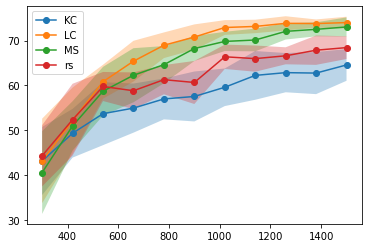

In [ ]:
plt.plot(samples, np.mean(acc_kc, axis = 0), "-o", label = "KC")
plt.fill_between(samples, np.mean(acc_kc, axis = 0)-np.std(acc_kc, axis = 0), np.mean(acc_kc, axis = 0)+np.std(acc_kc, axis = 0), alpha=0.3)

plt.plot(samples, np.mean(acc_lc, axis = 0), "-o", label = "LC")
plt.fill_between(samples, np.mean(acc_lc, axis = 0)-np.std(acc_lc, axis = 0), np.mean(acc_lc, axis = 0)+np.std(acc_lc, axis = 0), alpha=0.3)

plt.plot(samples, np.mean(acc_ms, axis = 0), "-o", label = "MS")
plt.fill_between(samples, np.mean(acc_ms, axis = 0)-np.std(acc_ms, axis = 0), np.mean(acc_ms, axis = 0)+np.std(acc_ms, axis = 0), alpha=0.3)

plt.plot(samples, np.mean(acc_rs, axis = 0), "-o", label = "RS")
plt.fill_between(samples, np.mean(acc_rs, axis = 0)-np.std(acc_rs, axis = 0), np.mean(acc_rs, axis = 0)+np.std(acc_rs, axis = 0), alpha=0.3)

plt.legend()